# Plot defect backlogs

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from dfply import *
%matplotlib inline


## Load a backlog

In [2]:
eclipse_data_tools = ["eclipse", "data_tools"]
eclipse_platform = ["eclipse", "platform"]
eclipse_birt = ["eclipse", "birt"]
eclipse_jdt = ["eclipse", "jdt"]
eclipse_pde = ["eclipse", "pde"]

mozilla_calendar = ["mozilla", "calendar"]
mozilla_firefox = ["mozilla", "firefox"]
mozilla_core = ["mozilla", "core"]
mozilla_thunderbird = ["mozilla", "thunderbird"]

kernel_io_storage = ["kernel", "IO_Storage"]
kernel_networking = ["kernel", "networking"]
kernel_file_system = ["kernel", "file_system"]

open_office_writer = ["open_office", "writer"]
open_office_calc = ["open_office", "calc"]
open_office_draw = ["open_office", "draw"]

apache_ant = ["apache", "ant"]
apache_apache2 = ["apache", "apache2"]

libre_office_writer = ["libre_office", "writer"]
libre_office_calc = ["libre_office", "calc"]
libre_office_draw = ["libre_office", "draw"]
                     

## Plot backlog

In [338]:
def plot_project_sequence(project_sequence, title=None, figsize=(16, 7), title_font_size=20,
                     axis_font_size=18, axis_x_dates=False,
                     xlabel="week", ylabel="number of defects",
                     xtick_interval=50, ytick_interval=10):

    fig = plt.figure()
    project_sequence.plot(title=title, figsize=figsize, grid=True, linewidth=2, color="black")

    fig.axes[0].axes.title.set_fontsize(title_font_size)
    if title is not None:
        plt.title(title, fontsize = 46, y=1.02)
    if xlabel is not None:
        plt.xlabel(xlabel,  fontsize = 46, labelpad=15)
    if ylabel is not None:
        plt.ylabel(ylabel, fontsize = 46, labelpad=15)
    plt.tick_params(labelsize=36, pad = 16)

    if axis_x_dates:
        plt.xticks(rotation=90)
        plt.xticks([x for x in range(0, len(project_sequence), xtick_interval)],
                   project_sequence.index.tolist())    
    else:
        plt.xticks([x for x in range(0, len(project_sequence), xtick_interval)],
                   [x for x in range(0, len(project_sequence), xtick_interval)])

    max_value = int(np.max(project_sequence))

    fig.axes[0].set_ylim(bottom=0, top=max_value)
    plt.yticks([x for x in np.arange(0, max_value, ytick_interval)],
               [int(x) for x in np.arange(0, max_value, ytick_interval)])

    return fig

def plot_defect_backlog(product, y_intervals=50):
    backlog_path = 'data/{}/{}/{}_{}_backlog.{}' 
    backlog = pd.read_csv(backlog_path.format(product[0], product[1], product[0], product[1], "csv"),
                      parse_dates=['from_date', 'to_date'], index_col=0)
    fig = plot_project_sequence(backlog.backlog_all, title=' '.join(product), figsize=(40, 10), 
                               ytick_interval=y_intervals)
    plt.tight_layout()
    #plt.savefig(backlog_path.format(product[0], product[1], product[0], product[1], 'png'))
    plt.show()
    plt.close()

# Plot arima errors

In [381]:
def create_fig(project_sequence, mean_errors, title=None, figsize=(16, 7), title_font_size=20,
                     axis_font_size=18, axis_x_dates=False,
                     xlabel="week", ylabel="number of defects",
                     xtick_interval=50, ytick_interval=1):

    fig = plt.figure(figsize=figsize)
#     project_sequence.plot(title=title, figsize=figsize, grid=True, linewidth=2, color="black")
#     fig.axes[0].axes.title.set_fontsize(title_font_size)
    if title is not None:
        plt.title(title, fontsize = 46, y=1.02)
    if xlabel is not None:
        plt.xlabel(xlabel,  fontsize = 46, labelpad=15)
    if ylabel is not None:
        plt.ylabel(ylabel, fontsize = 46, labelpad=15)

    if axis_x_dates:
        plt.xticks(rotation=90)
        plt.xticks([x for x in range(0, len(project_sequence), xtick_interval)],
                   project_sequence.index.tolist())    
    else:
        plt.xticks([x for x in range(0, len(project_sequence), xtick_interval)],
                   [x for x in range(0, len(project_sequence), xtick_interval)])
        
    plt.tick_params(labelsize=36, pad = 16)

    max_value = int(math.ceil(np.max(mean_errors)))

    n_groups = len(mean_errors)
    index = [x for x in range(0, len(project_sequence), xtick_interval)]
    bar_width = 40
    opacity = 0.1
    rects1 = plt.bar(index, mean_errors, bar_width,
    alpha=opacity,
    color='b',
    label='Frank')
    
    fig.axes[0].set_ylim(bottom=0, top=max_value)
    plt.yticks([x for x in np.arange(0, max_value, ytick_interval)],
               [int(x) for x in np.arange(0, max_value, ytick_interval)])

    return fig

def plot_method_errors(product, method, errors_intervals=50, y_intervals = 1):
    predictions_path = 'data/{}/{}/Predictions/{}_th:all.csv' 
    backlog_path = 'data/{}/{}/{}_{}_backlog.{}'
    backlog = pd.read_csv(backlog_path.format(product[0], product[1], product[0], product[1], "csv"),
                      parse_dates=['from_date', 'to_date'], index_col=0)
    predictions = pd.read_csv(predictions_path.format(product[0], product[1], method),
                     index_col=0)
    
    mean_errors = []
    for i in range(errors_intervals, len(backlog.index) + errors_intervals, errors_intervals):
        if i == errors_intervals:
            errors = predictions >> mask(X.Week < i) >> select (X.Error_1)
        else:
            errors = predictions >> mask(X.Week < i, X.Week> i-errors_intervals) >> select (X.Error_1)
        mean_errors.append(errors.loc[:,"Error_1"].mean())
        
    title = '{} prediction mean errors'
    fig = create_fig(backlog.backlog_all, mean_errors, title=title.format(method), figsize=(40, 10), 
                               ytick_interval=y_intervals)
    plt.tight_layout()
    #plt.savefig(backlog_path.format(product[0], product[1], product[0], product[1], 'png'))
    plt.show()
    plt.close()

def plot_prediction_errors(product, errors_intervals=50, y_intervals = 1):
    plot_method_errors(product, "arima", errors_intervals = errors_intervals, y_intervals = y_intervals )
    plot_method_errors(product, "ets", errors_intervals = errors_intervals, y_intervals = y_intervals)



  
 # Backlogs poorly predicted by ARIMA and ETS:

In [383]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

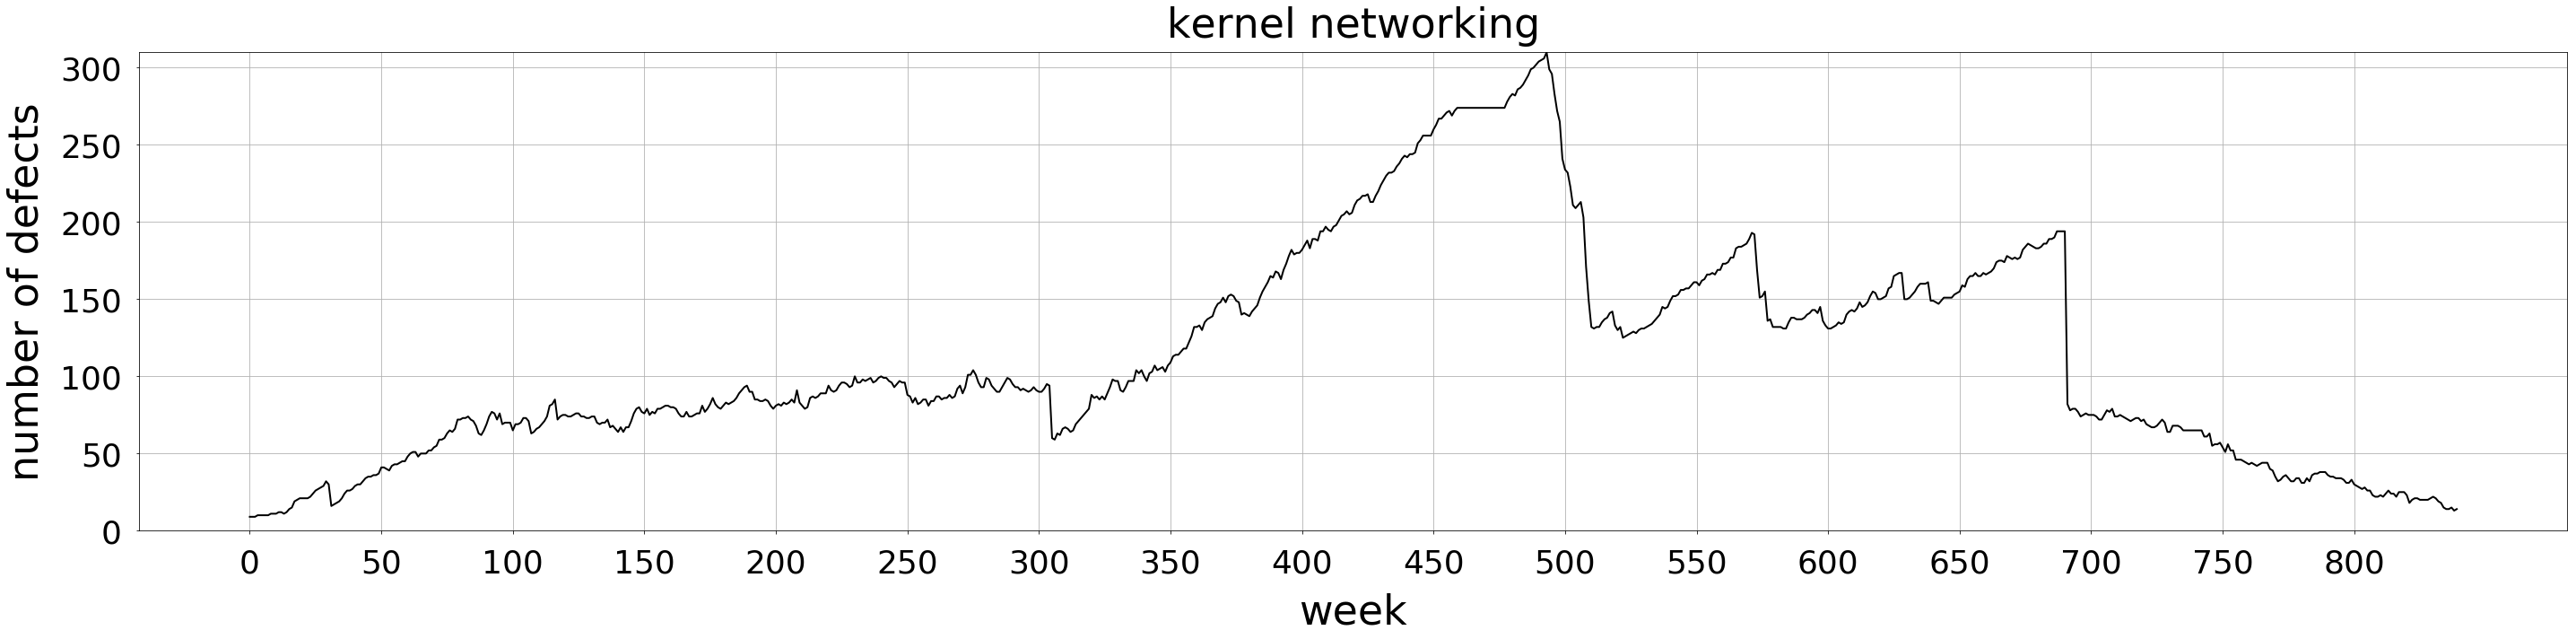

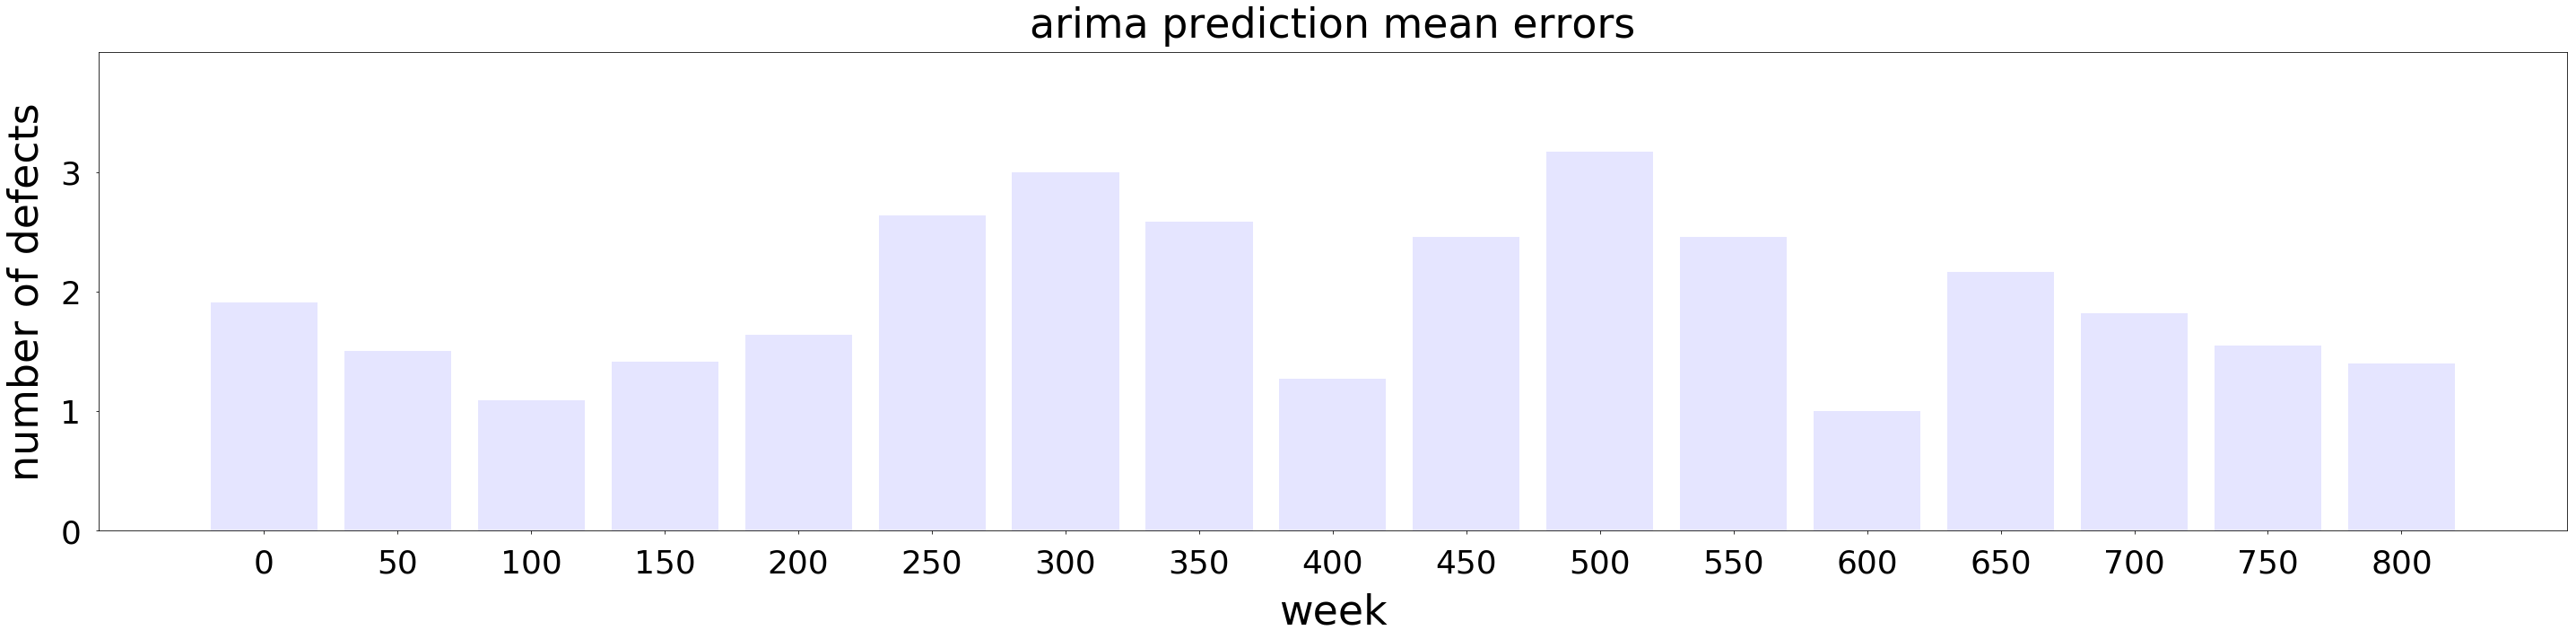

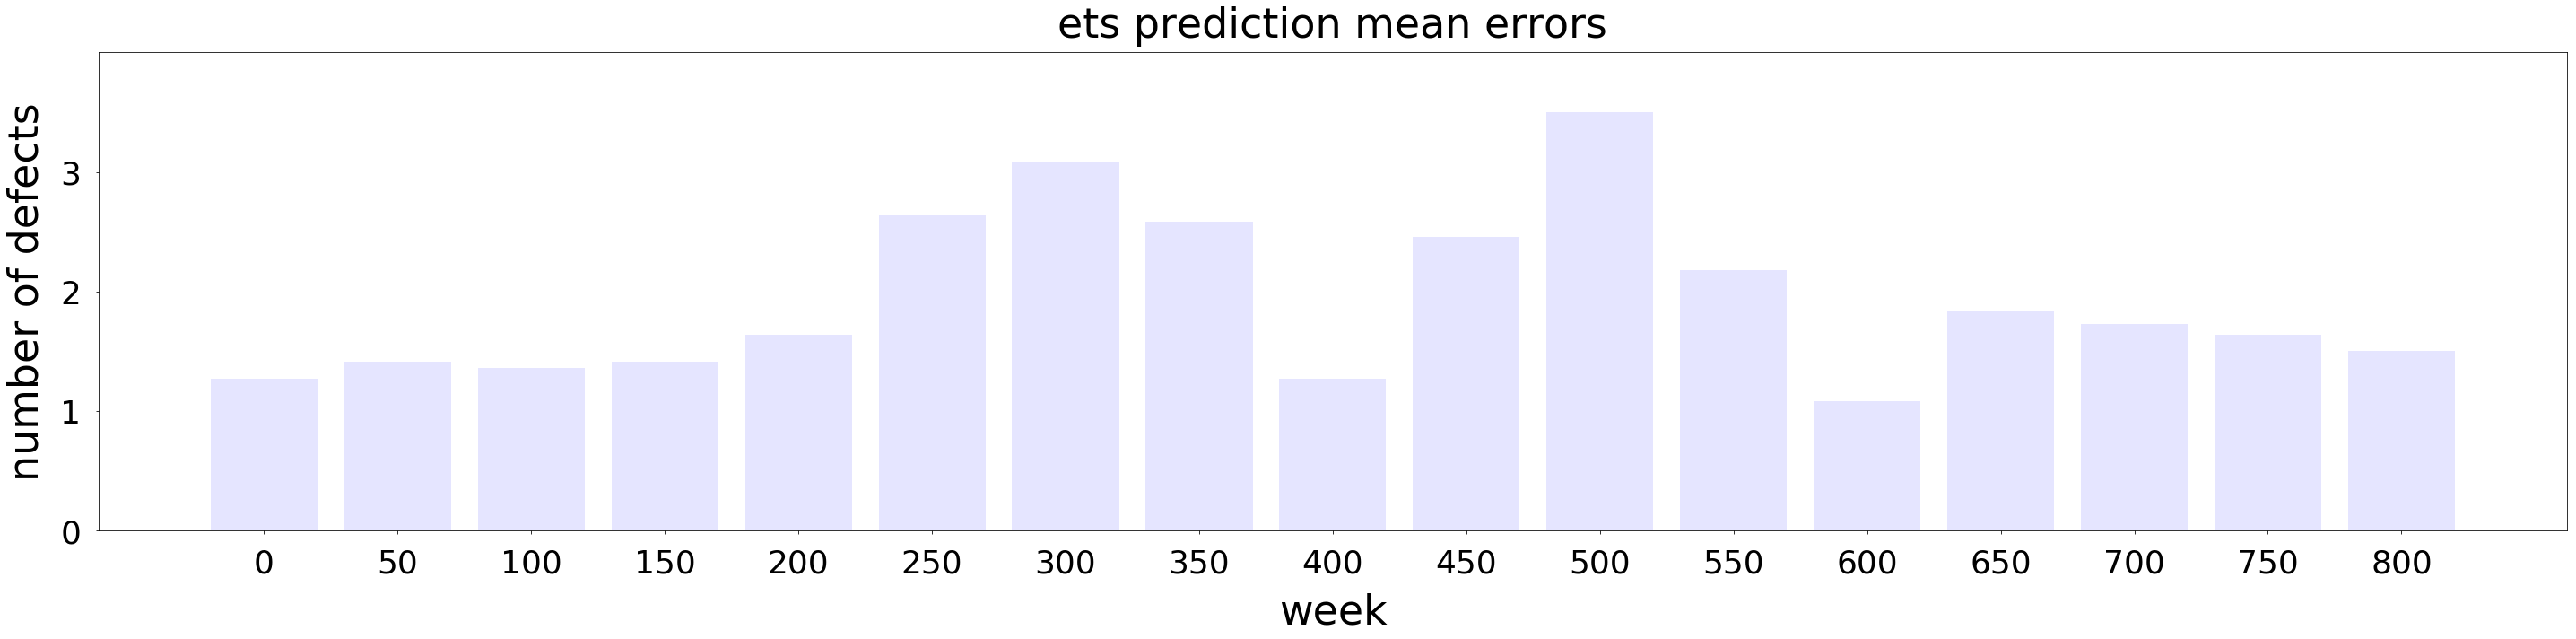

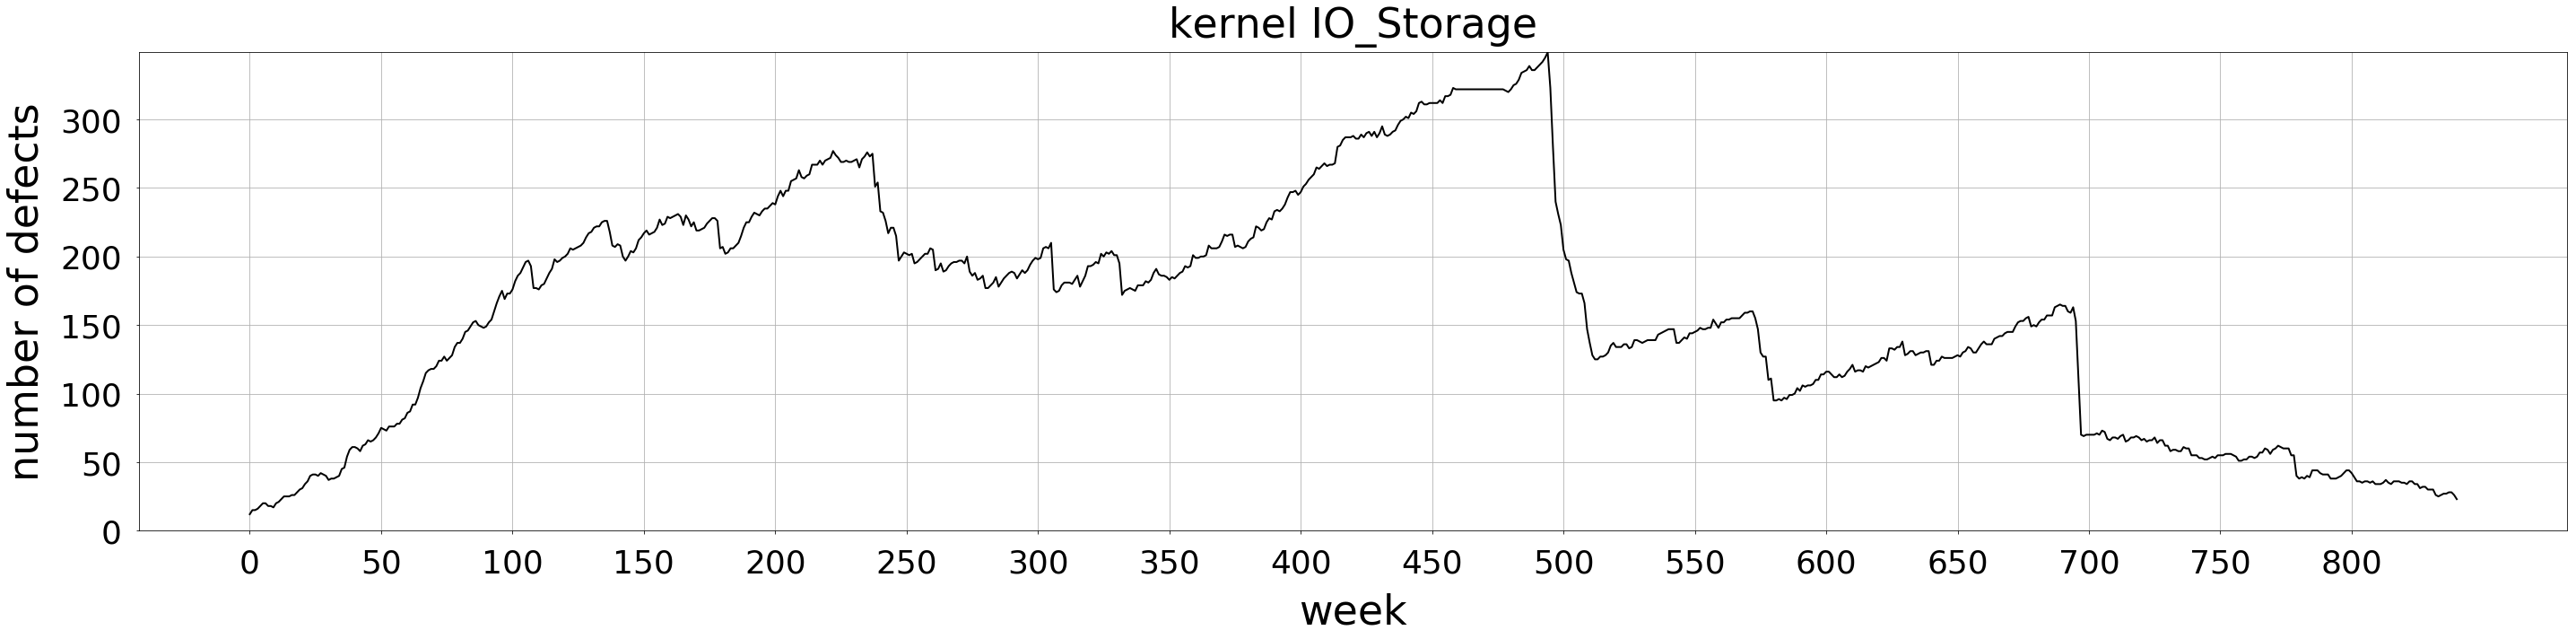

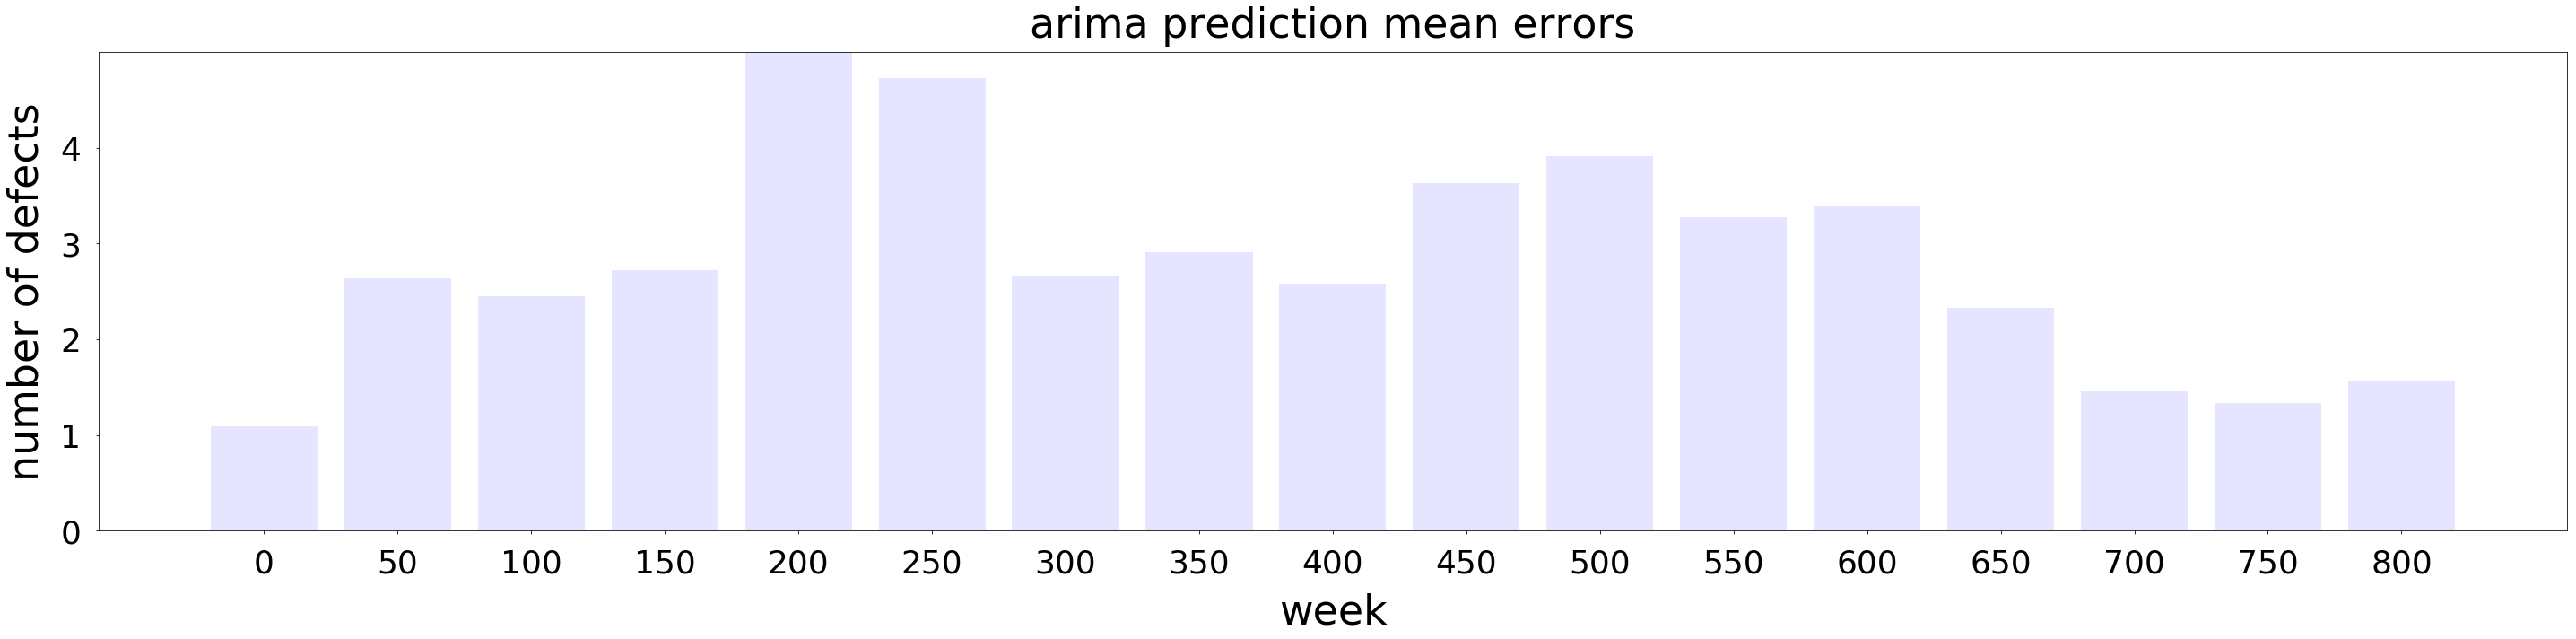

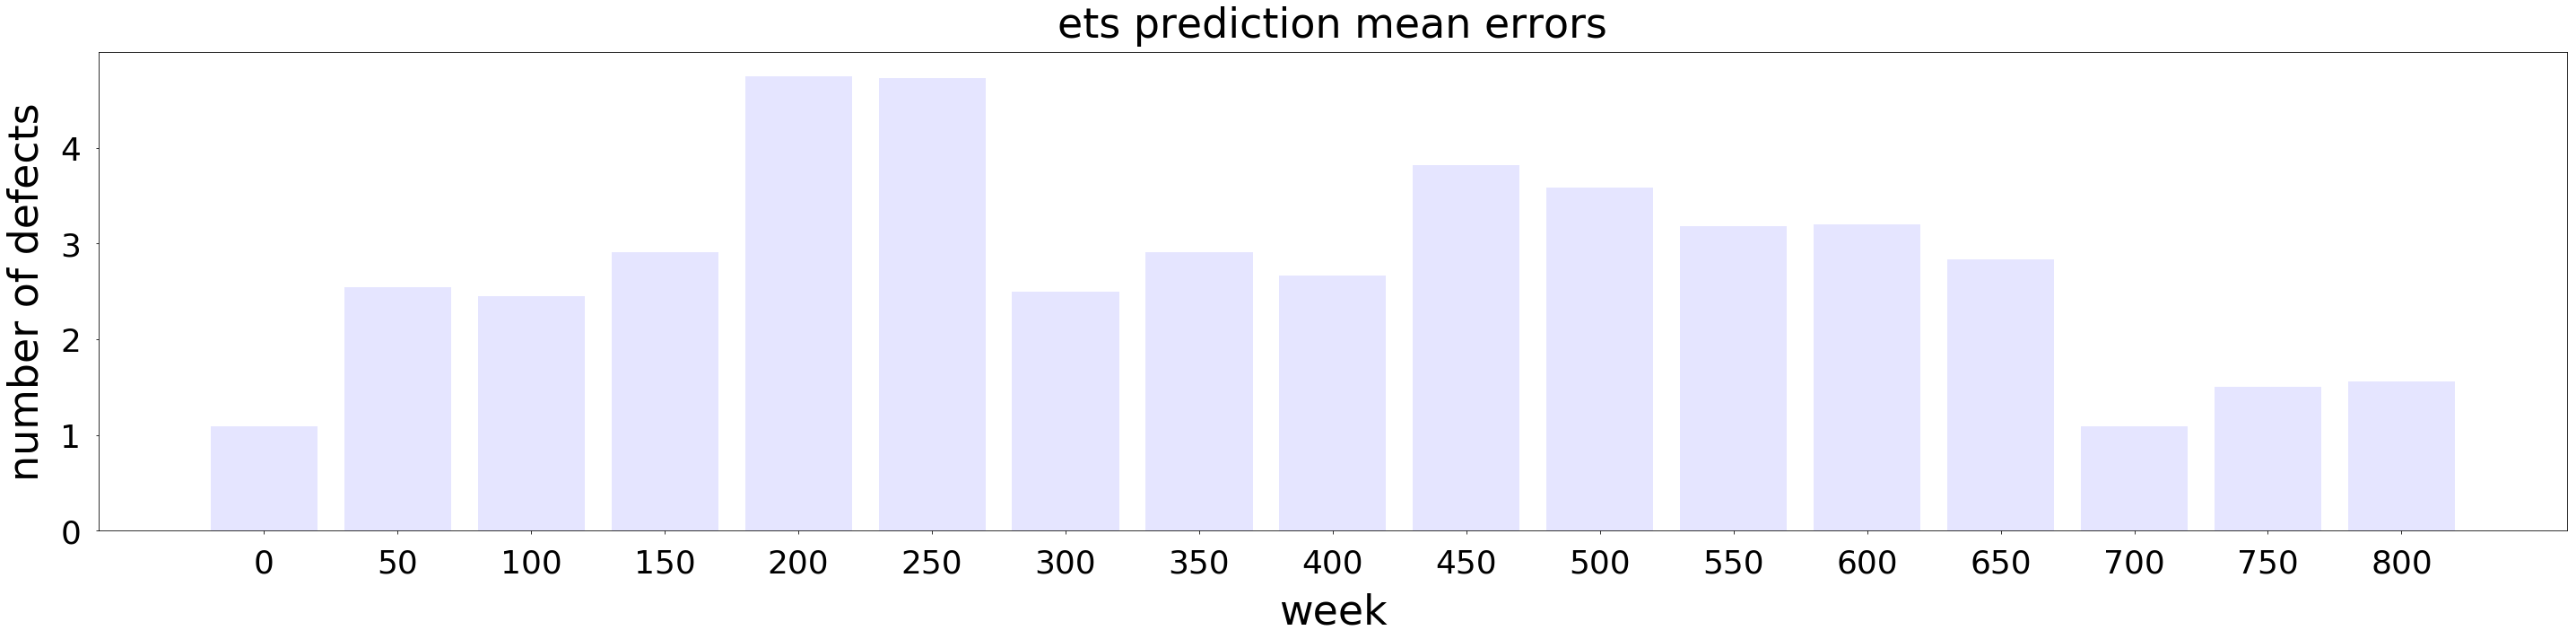

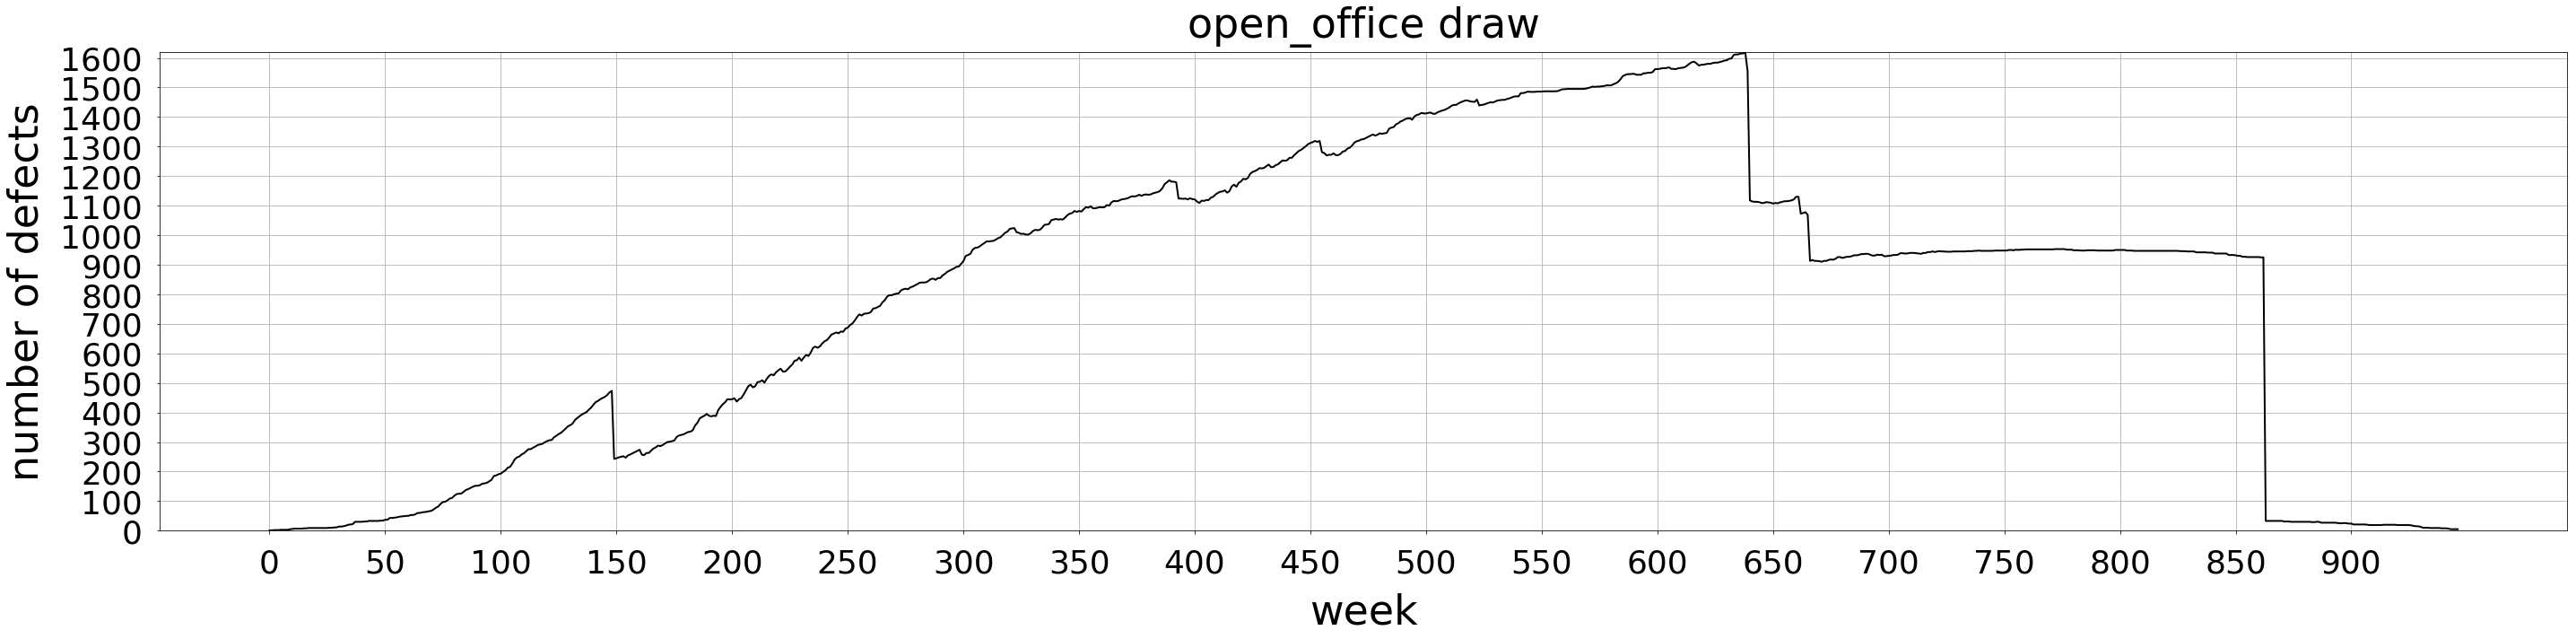

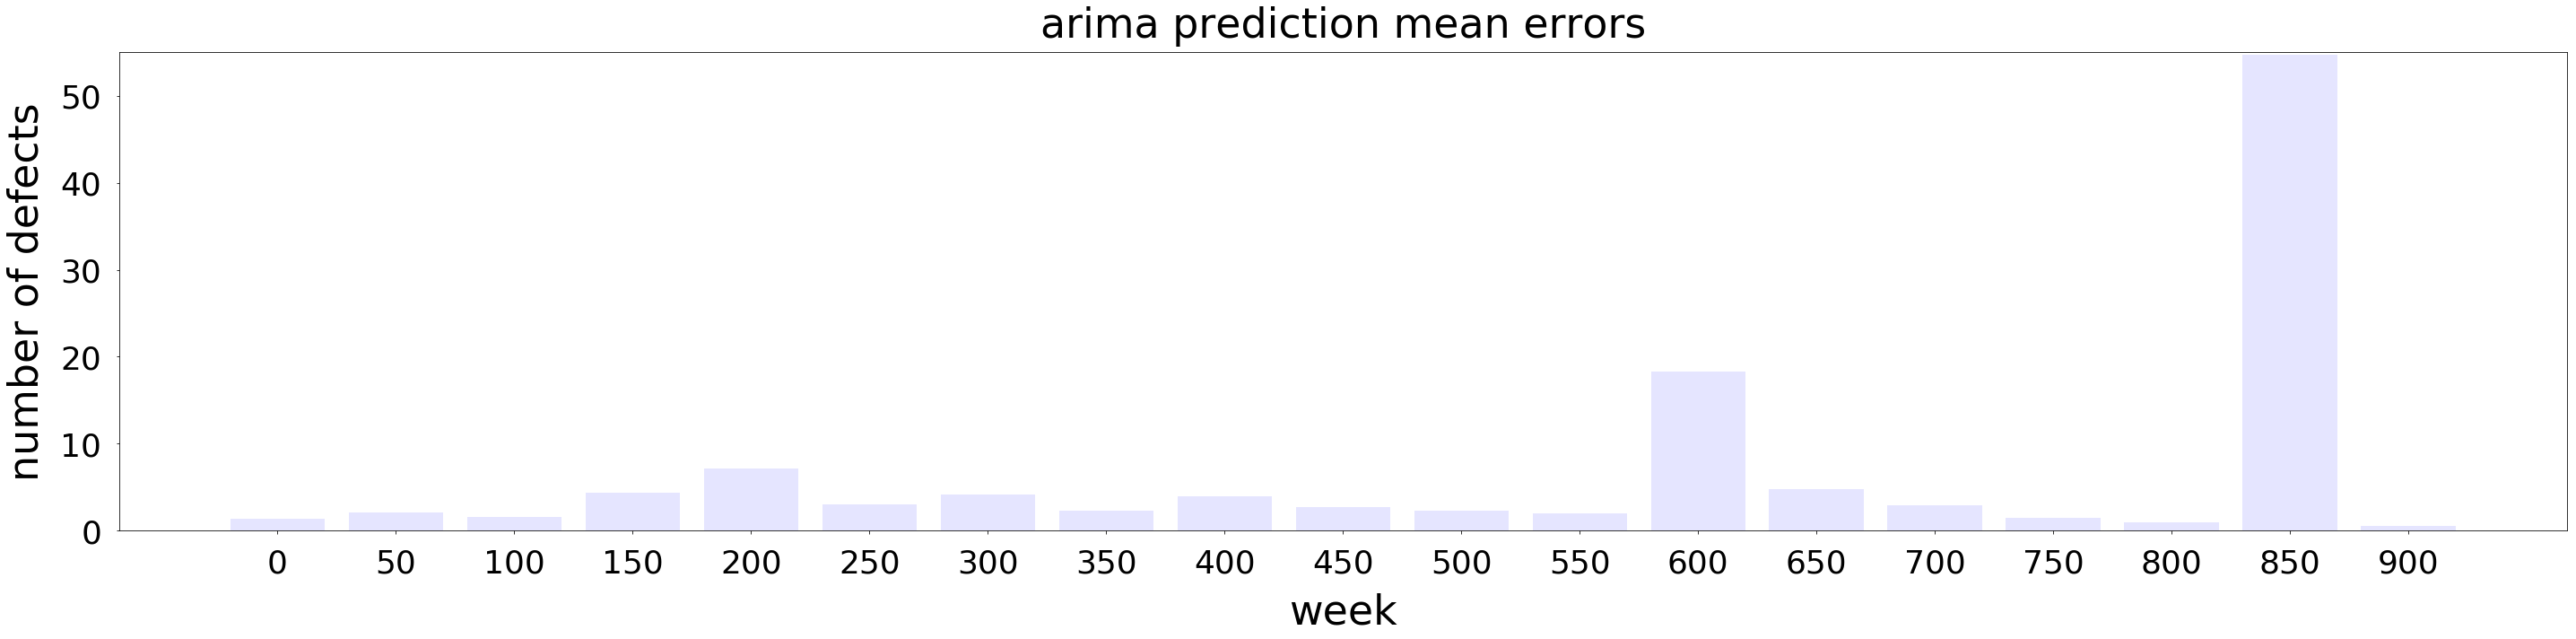

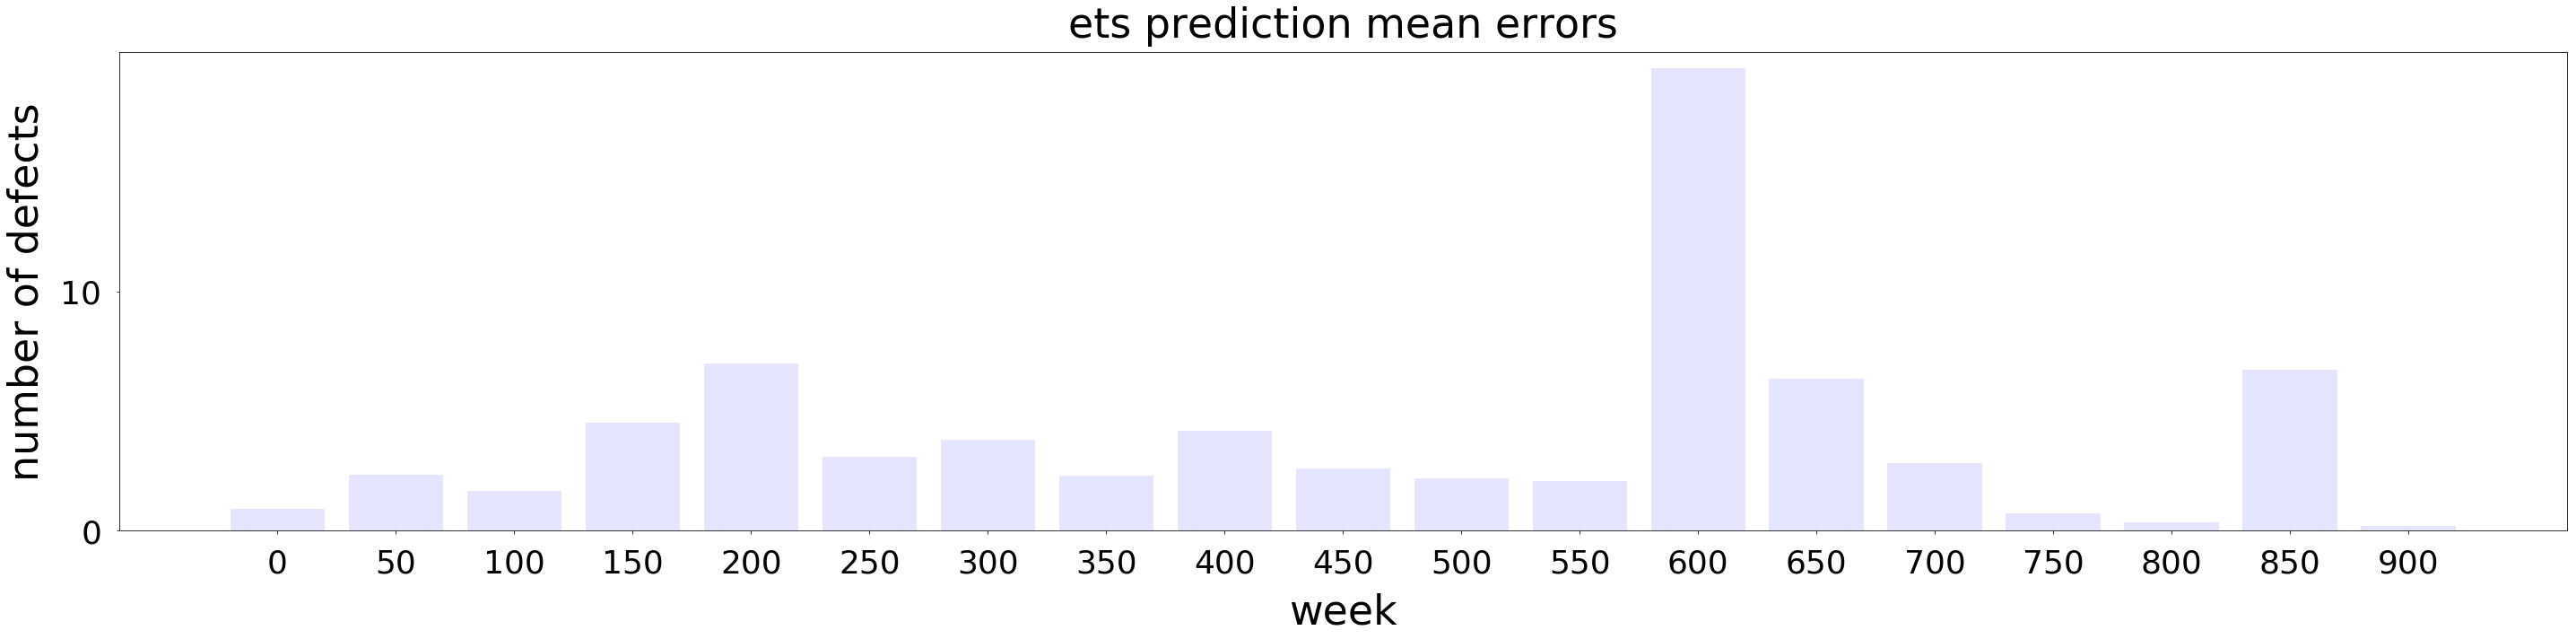

In [384]:
plot_defect_backlog(kernel_networking)
plot_prediction_errors(kernel_networking)

plot_defect_backlog(kernel_io_storage)
plot_prediction_errors(kernel_io_storage)

plot_defect_backlog(open_office_draw, y_intervals=100)
plot_prediction_errors(open_office_draw, y_intervals = 10)


# Backlogs poorly predicted by ARIMA:

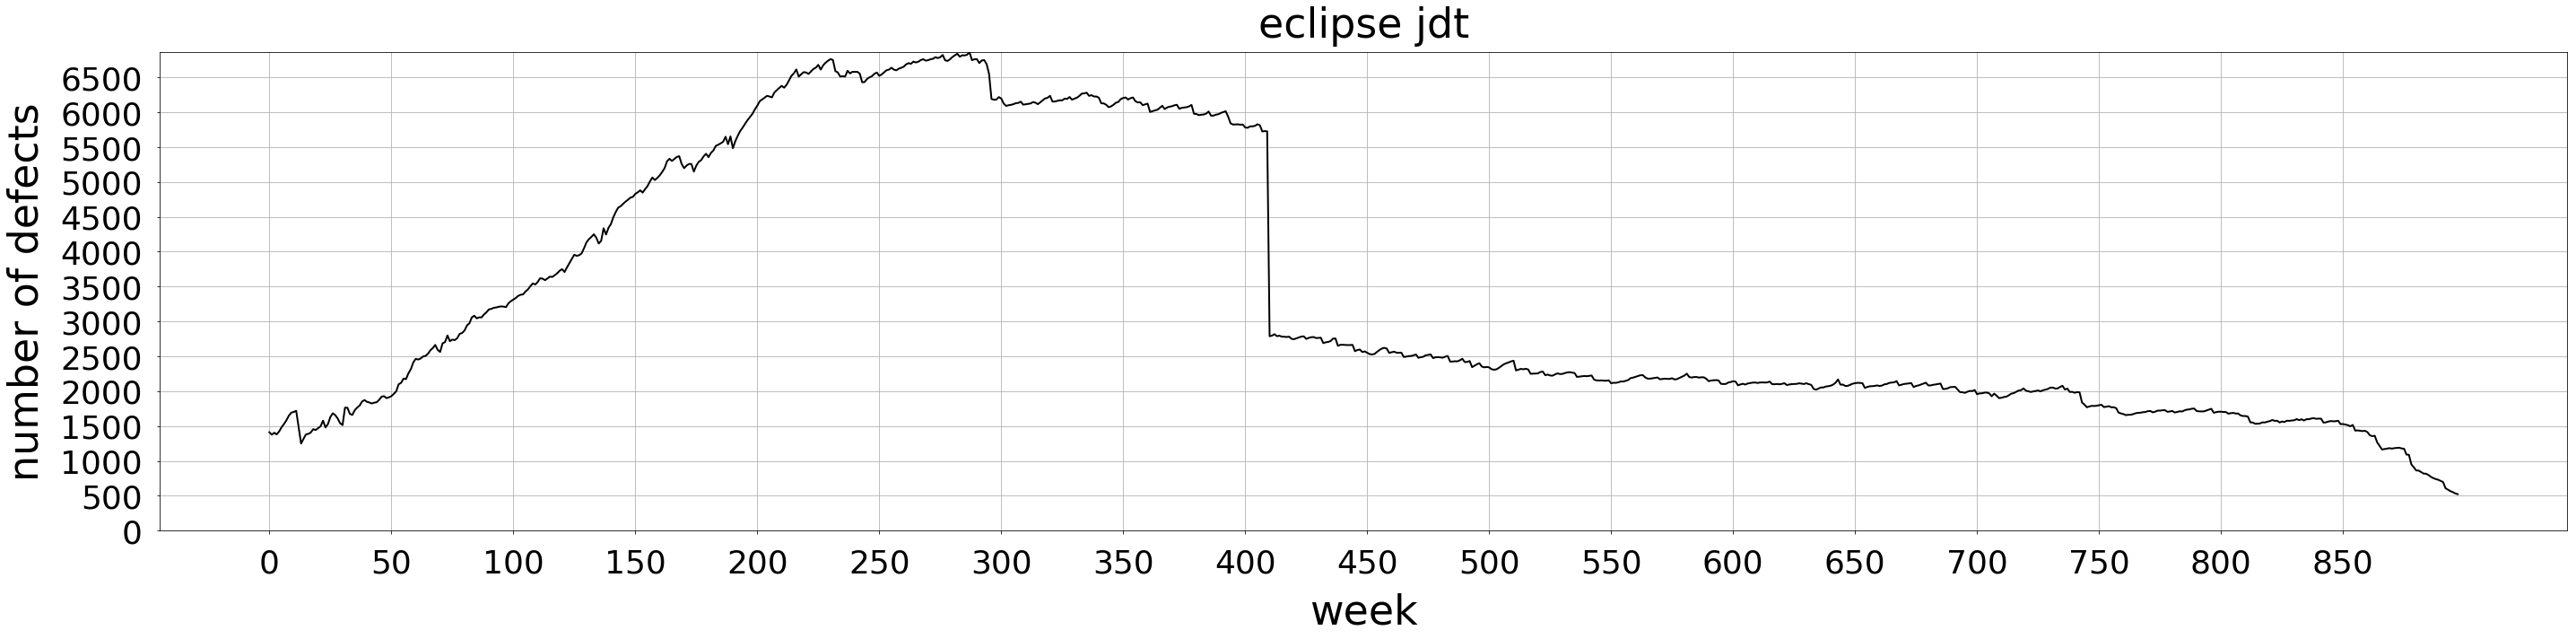

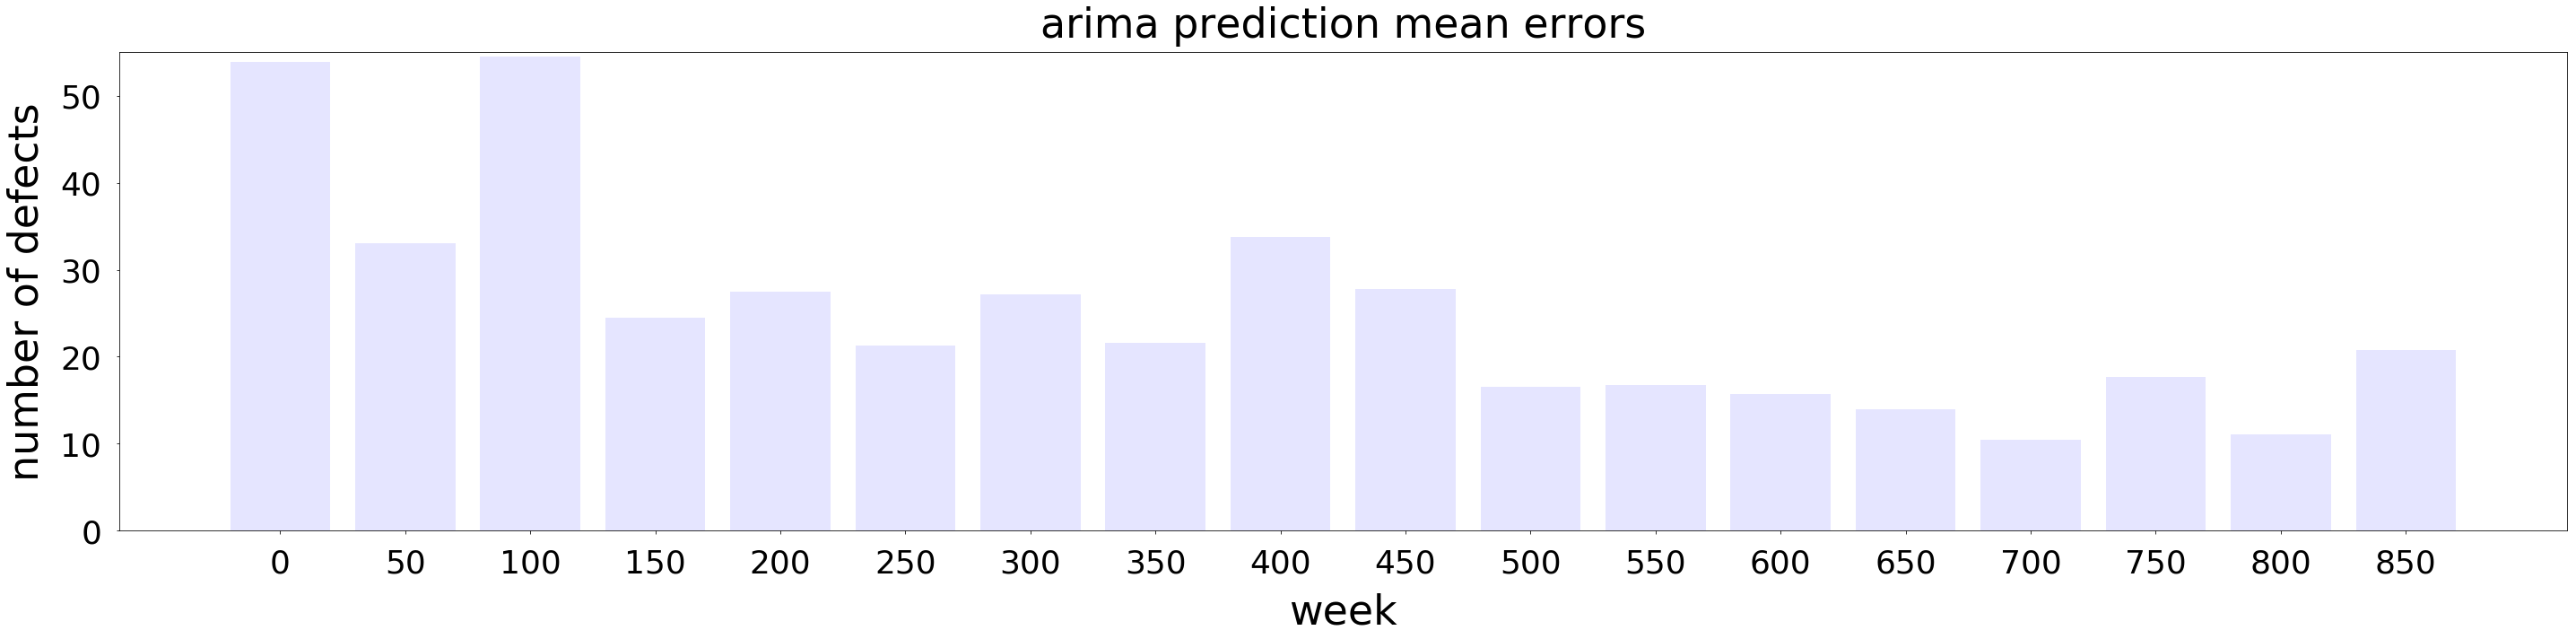

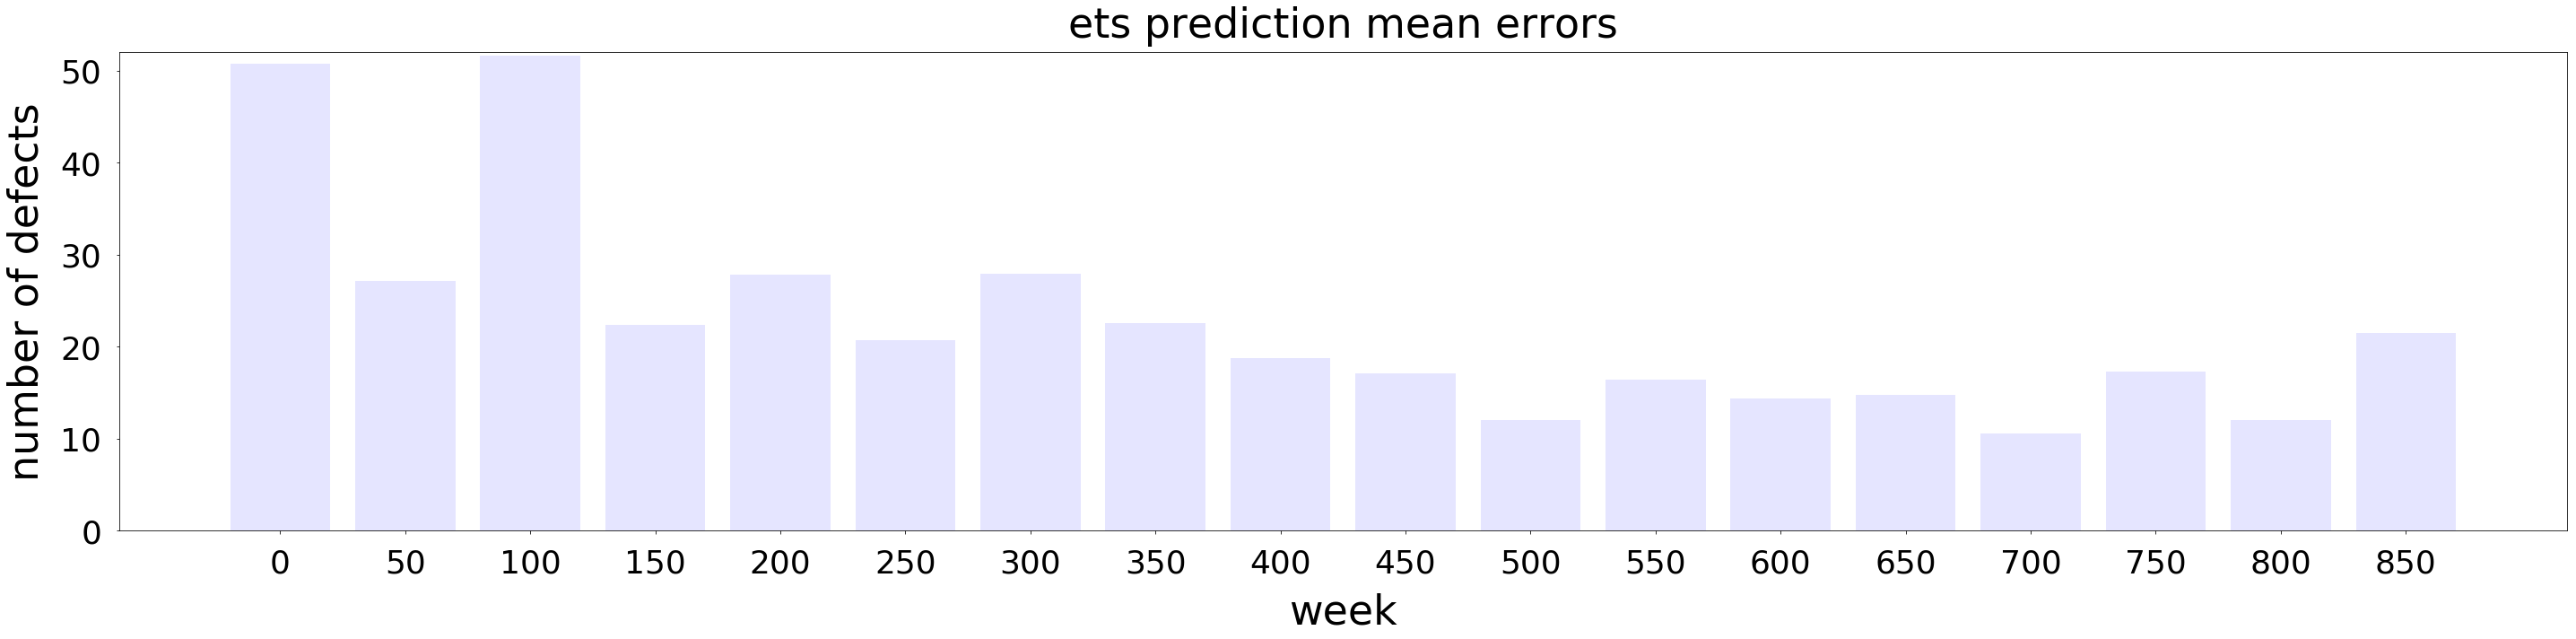

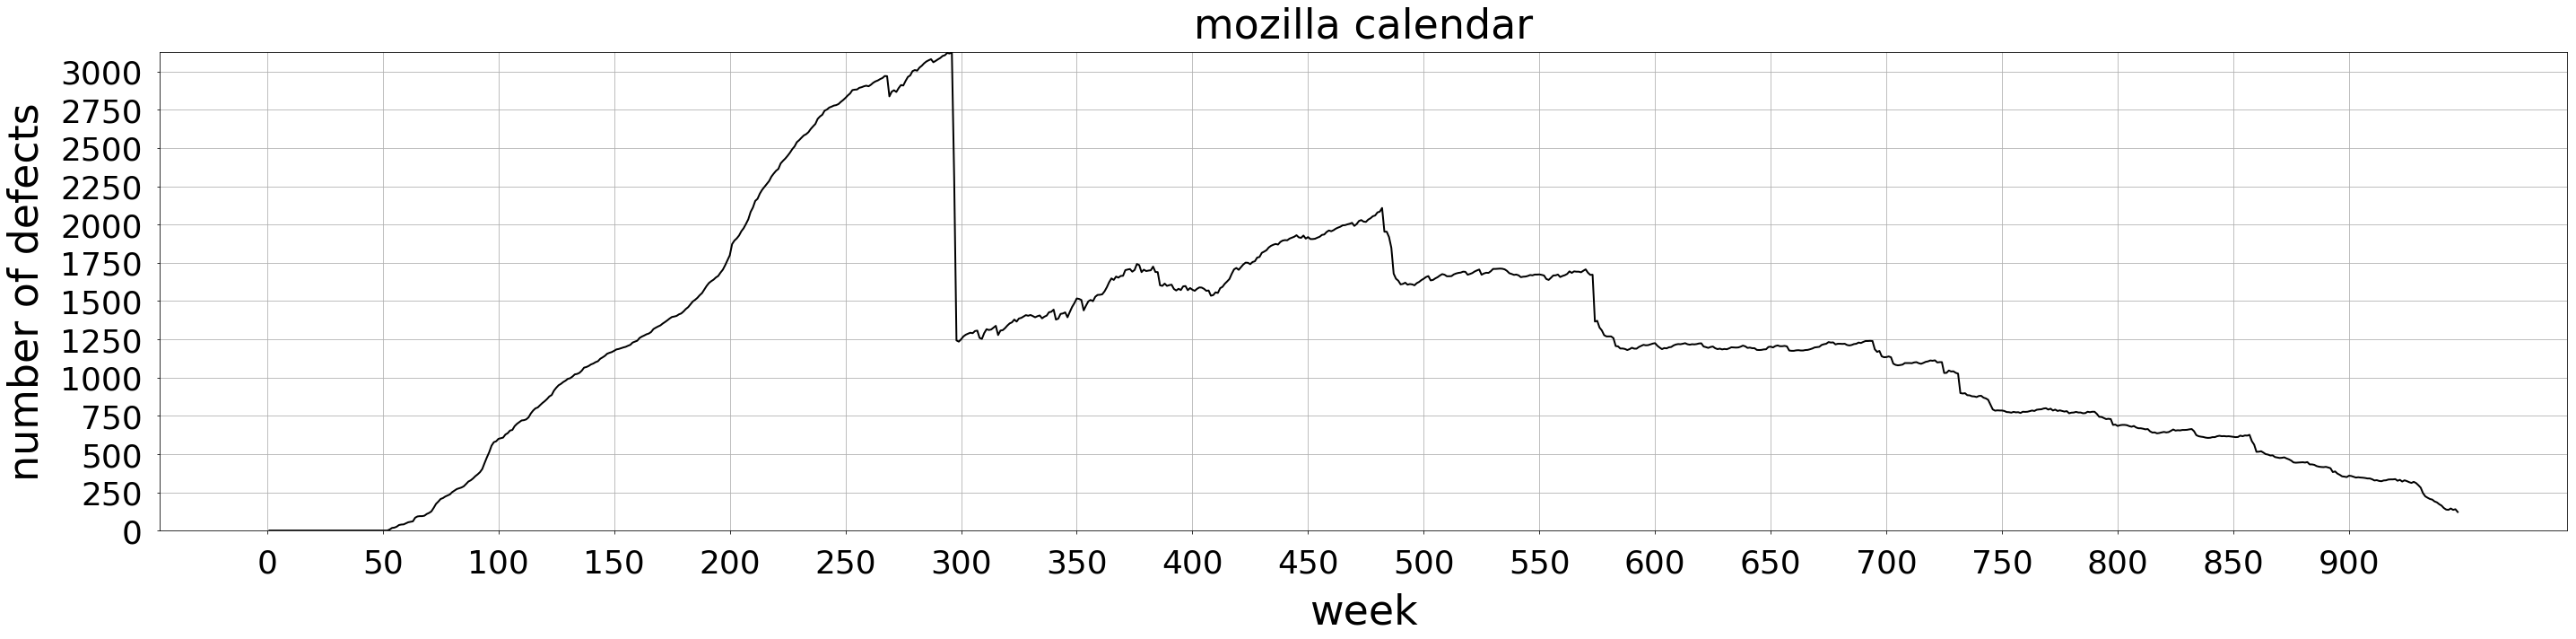

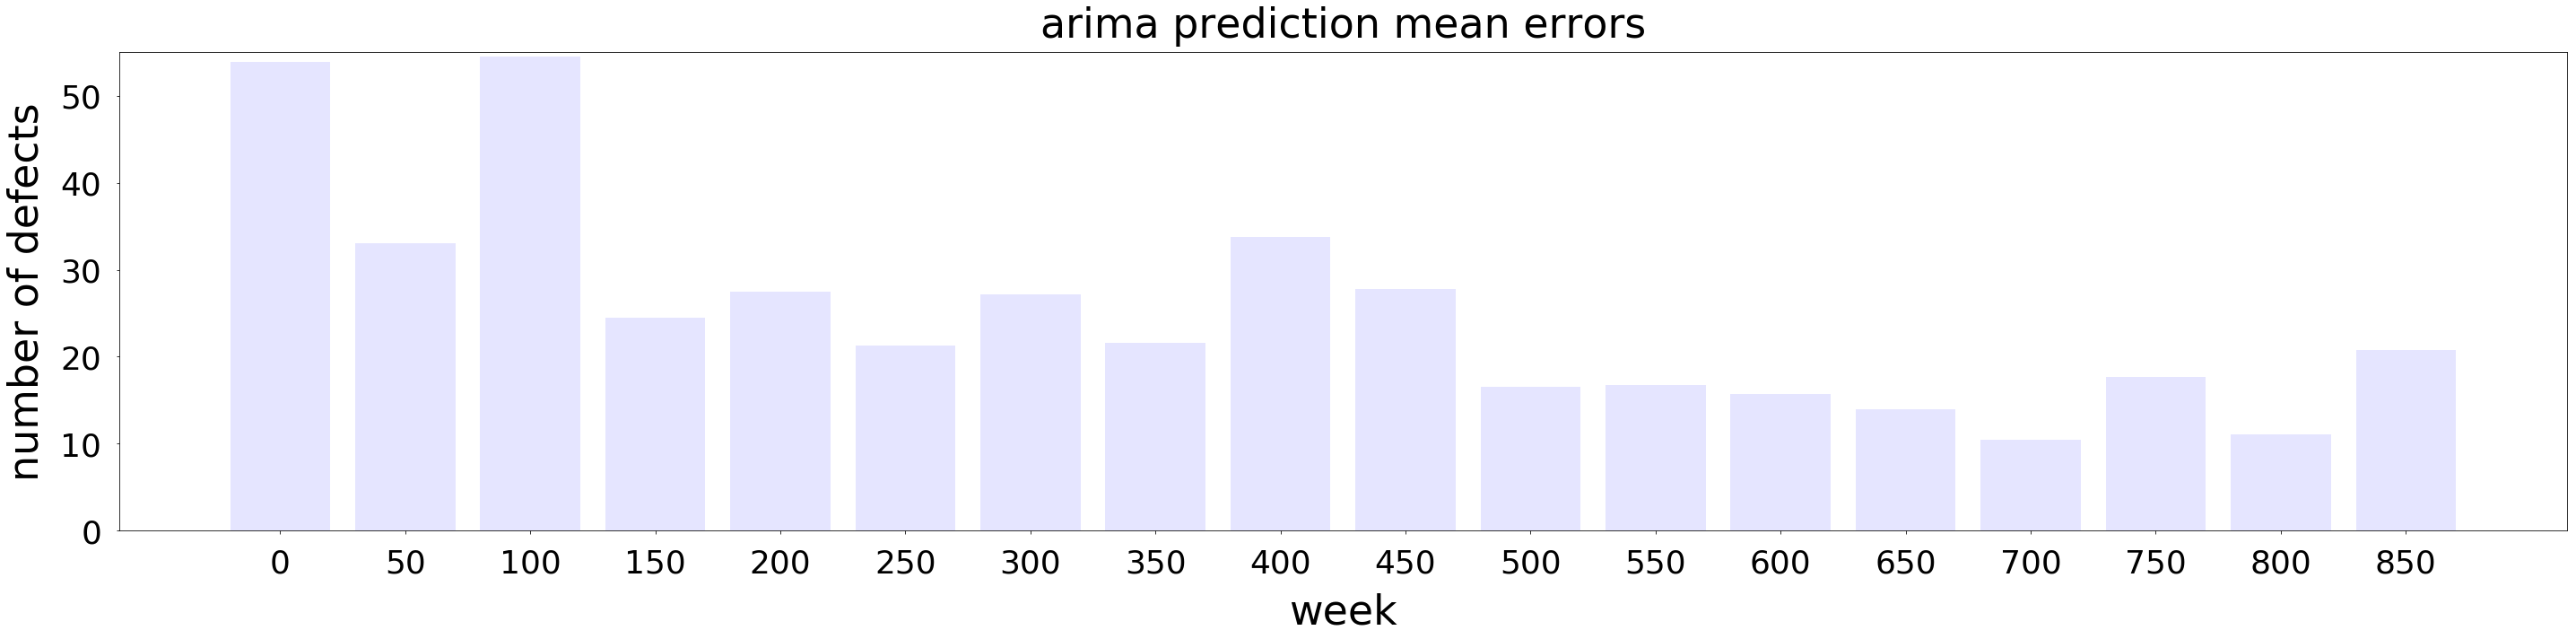

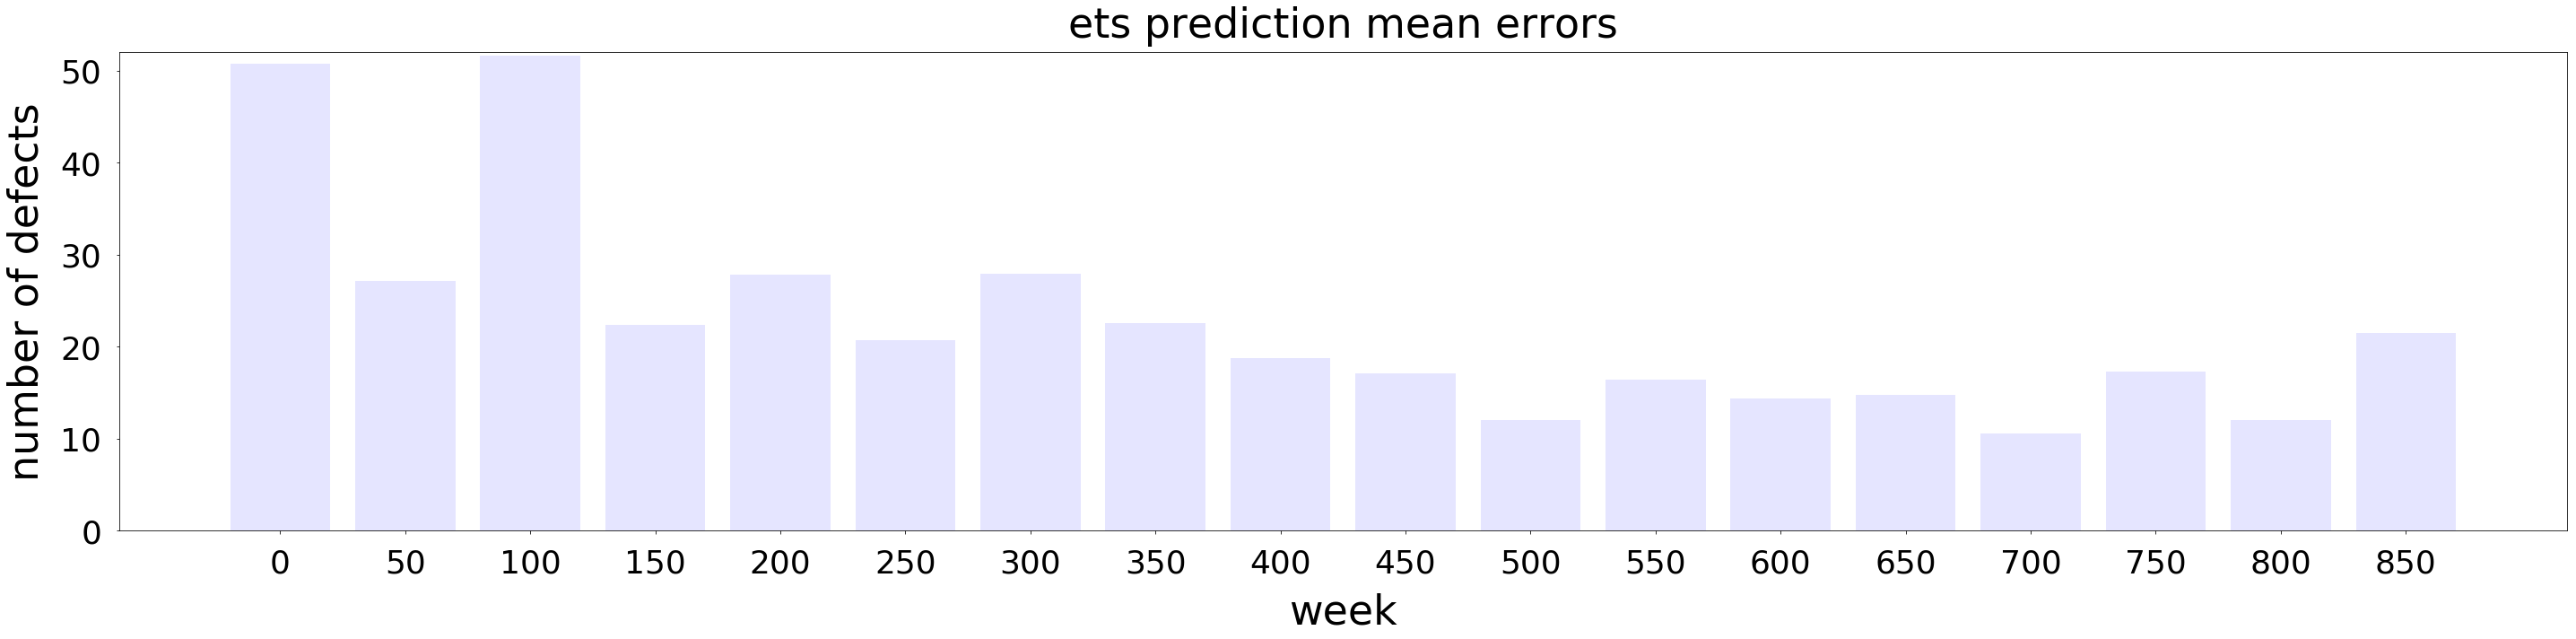

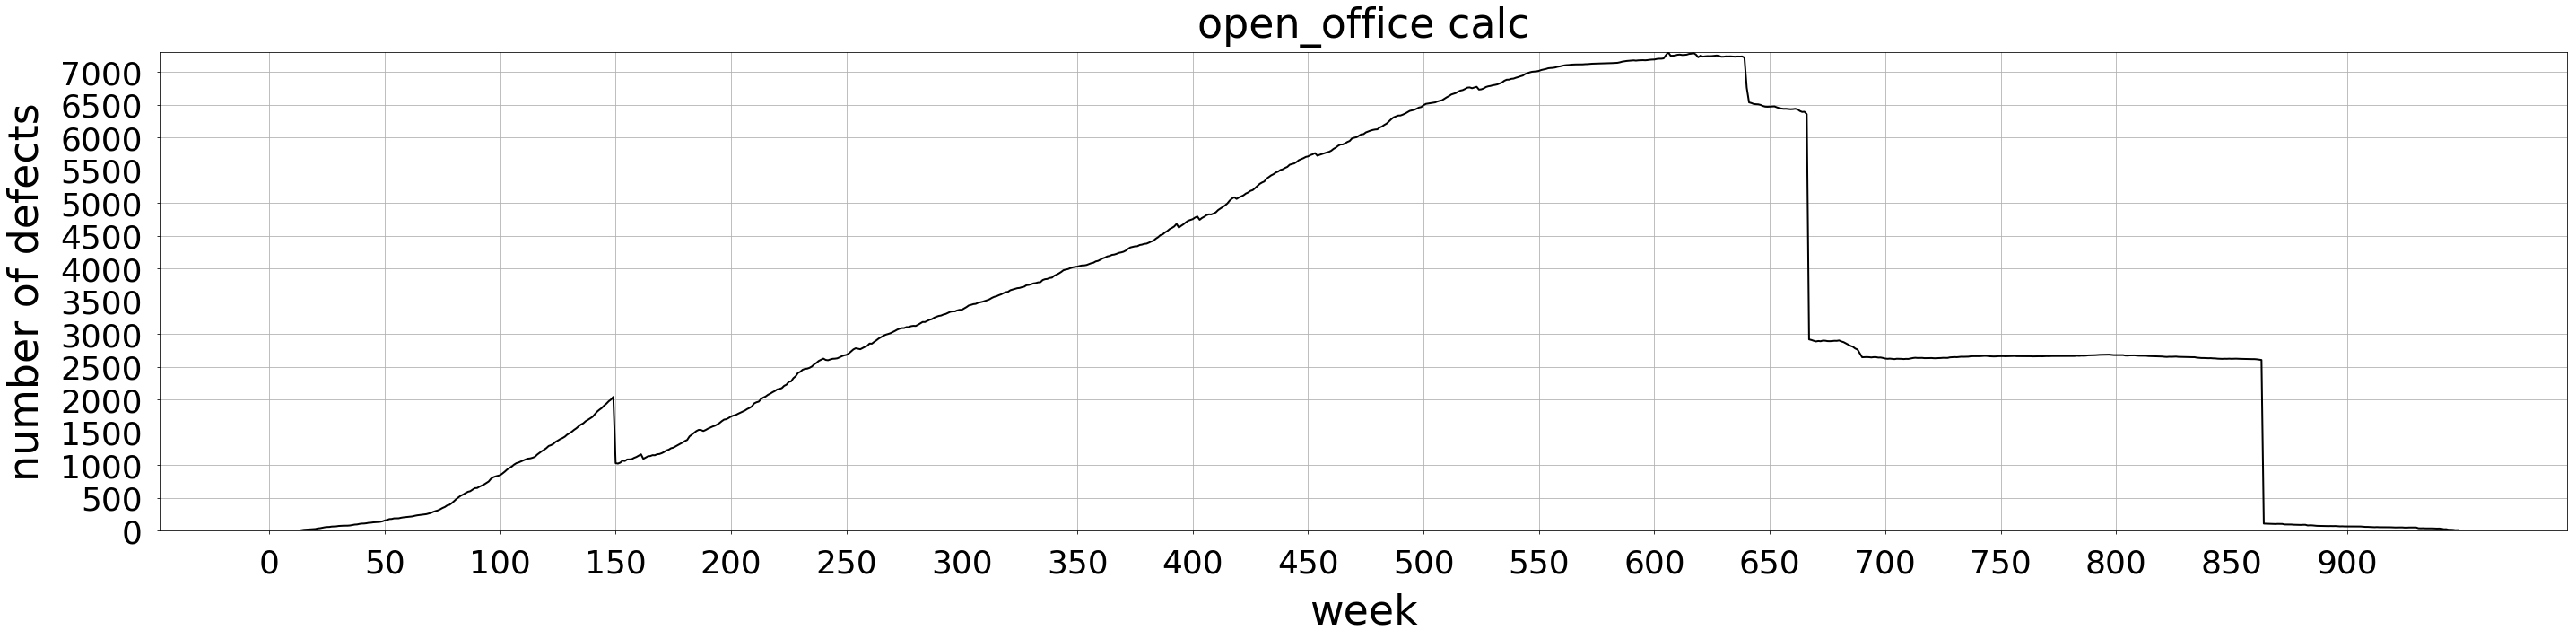

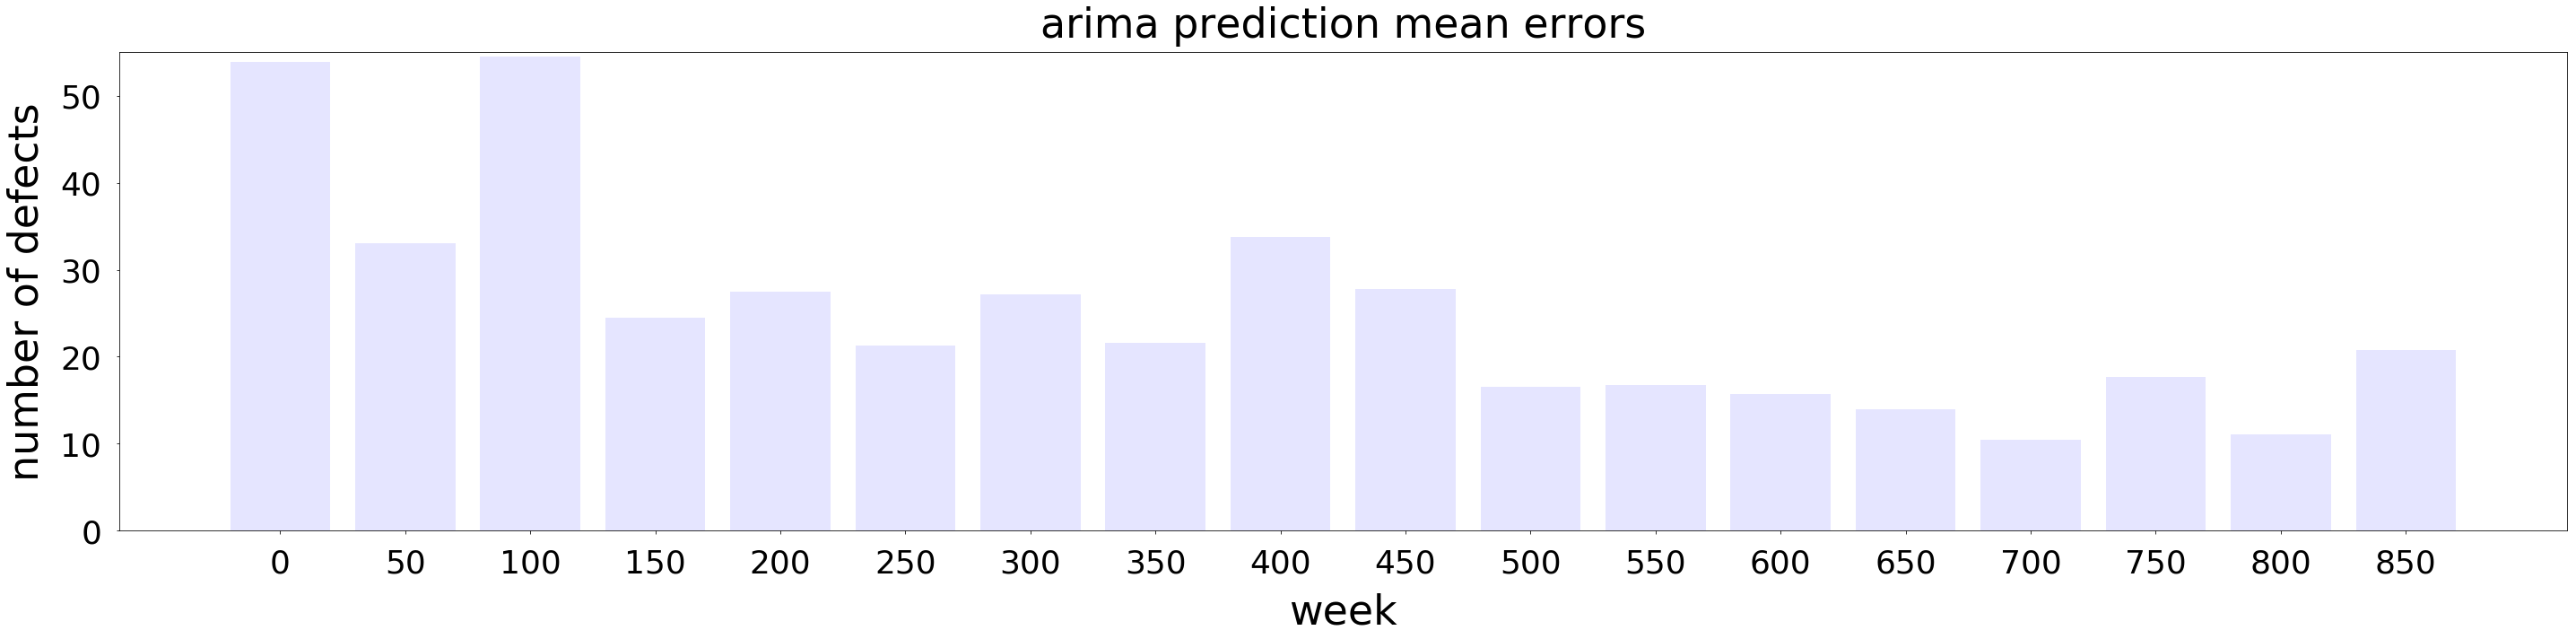

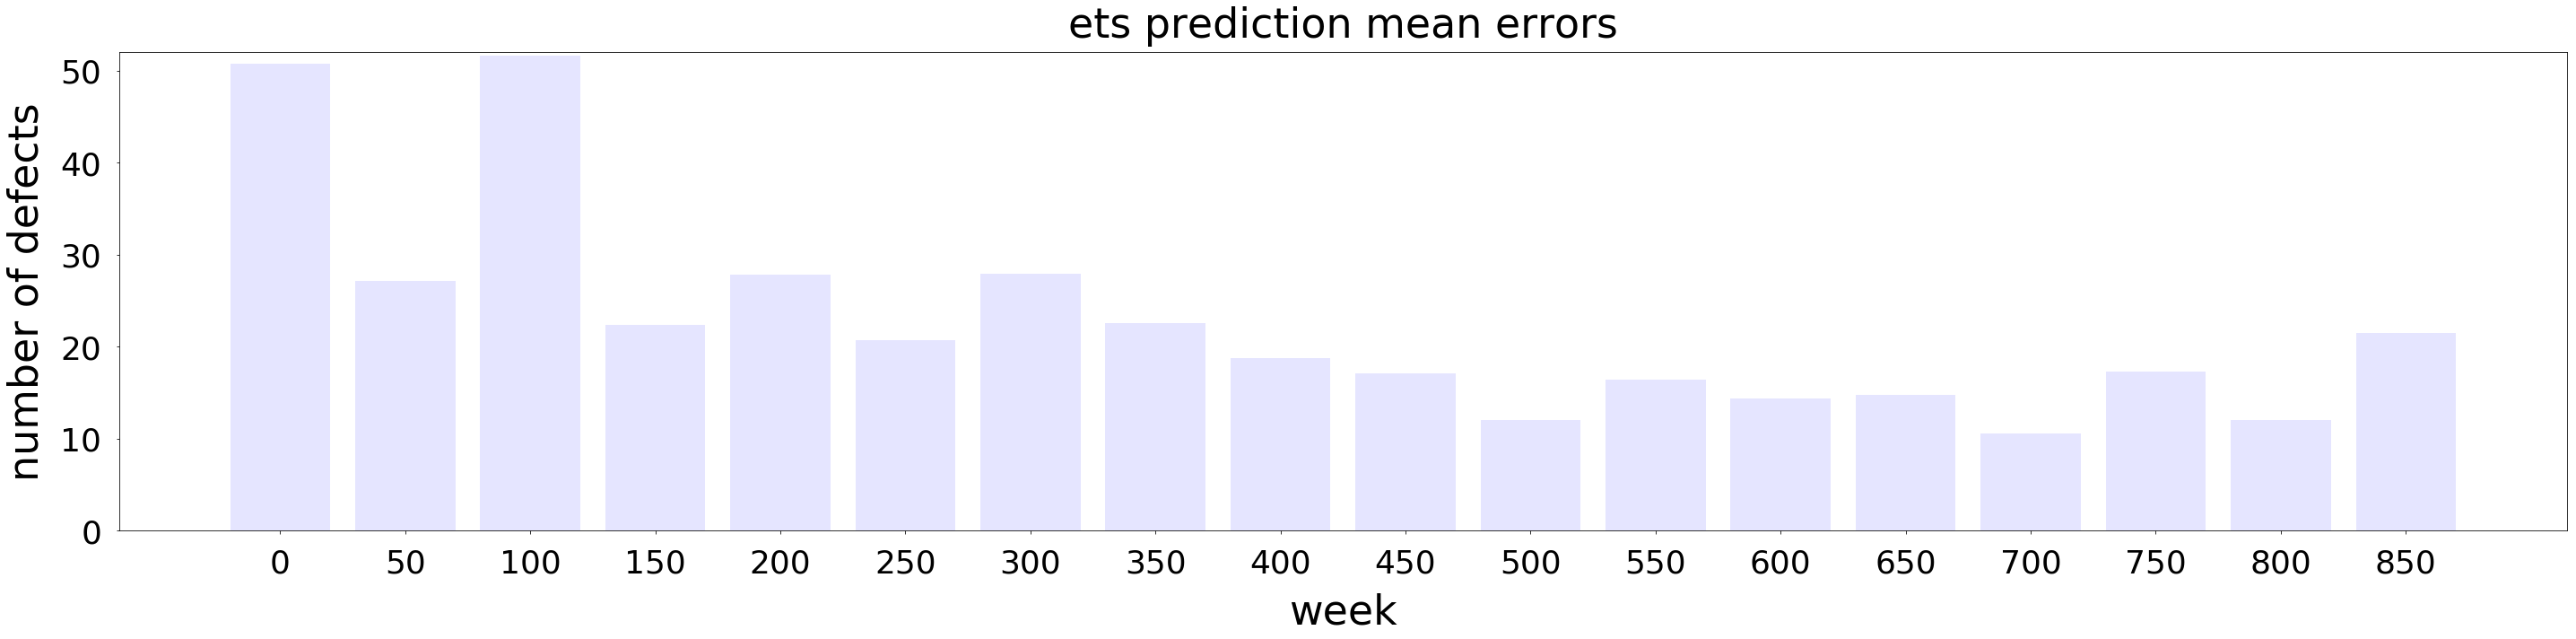

In [390]:
plot_defect_backlog(eclipse_jdt, y_intervals=500)
plot_prediction_errors(eclipse_jdt, y_intervals = 10)

plot_defect_backlog(mozilla_calendar, y_intervals=250)
plot_prediction_errors(eclipse_jdt, y_intervals = 10)

plot_defect_backlog(open_office_calc, y_intervals=500)
plot_prediction_errors(eclipse_jdt, y_intervals = 10)

# Well predicted backlogs:

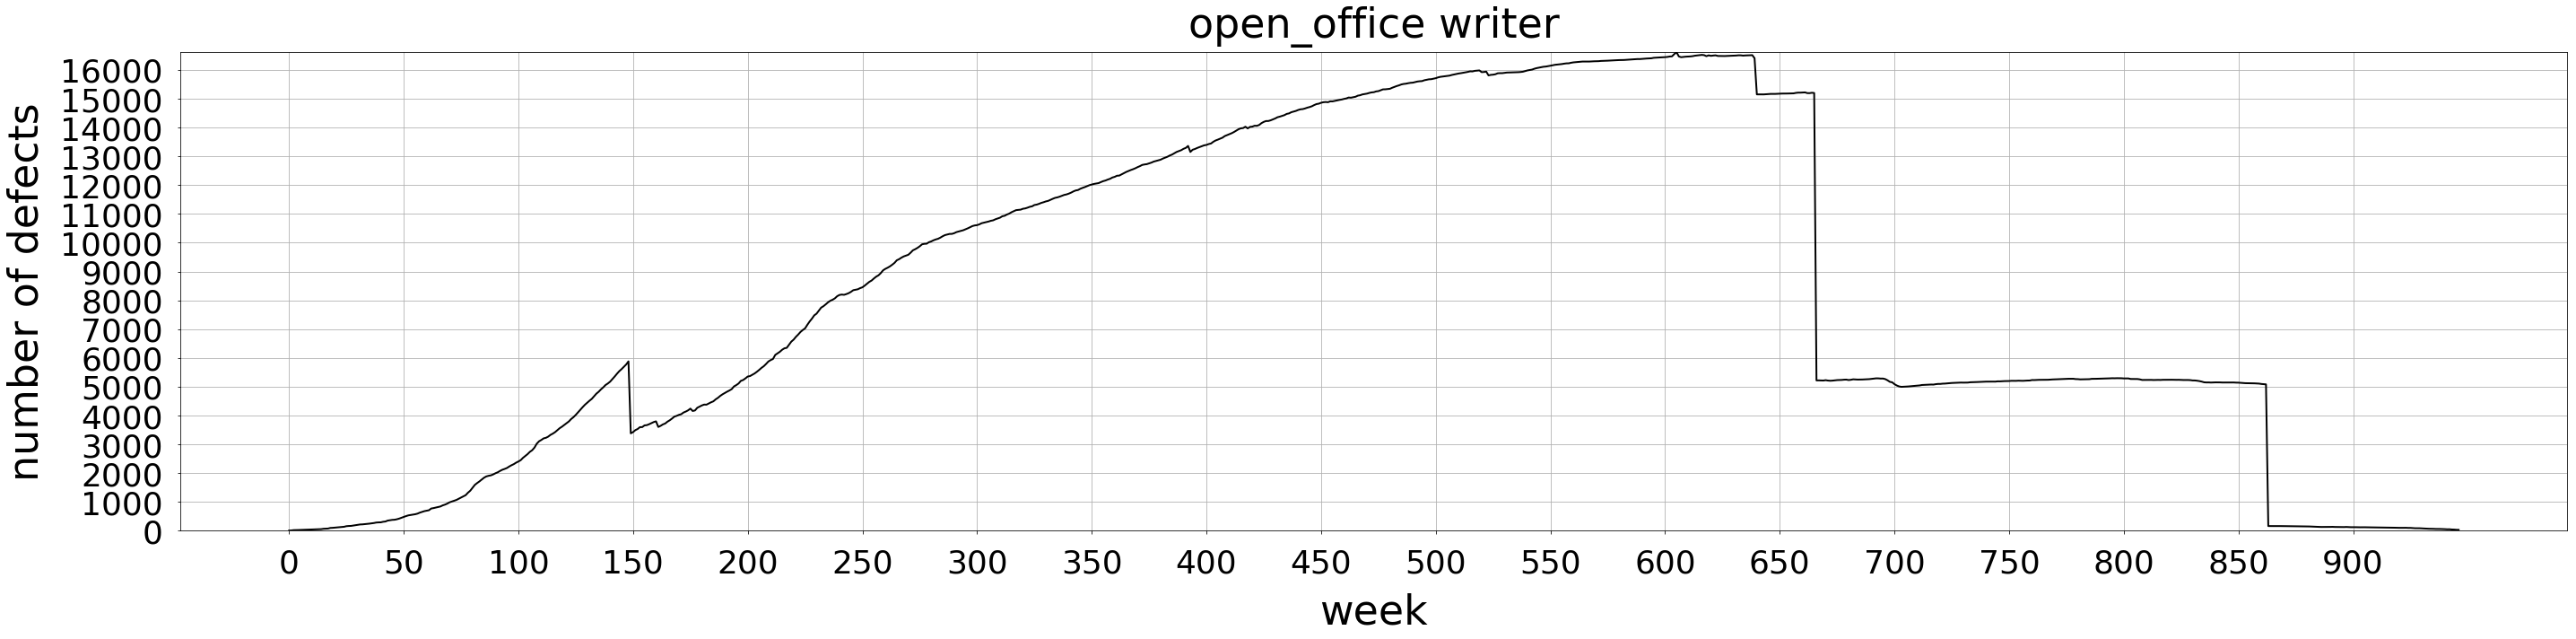

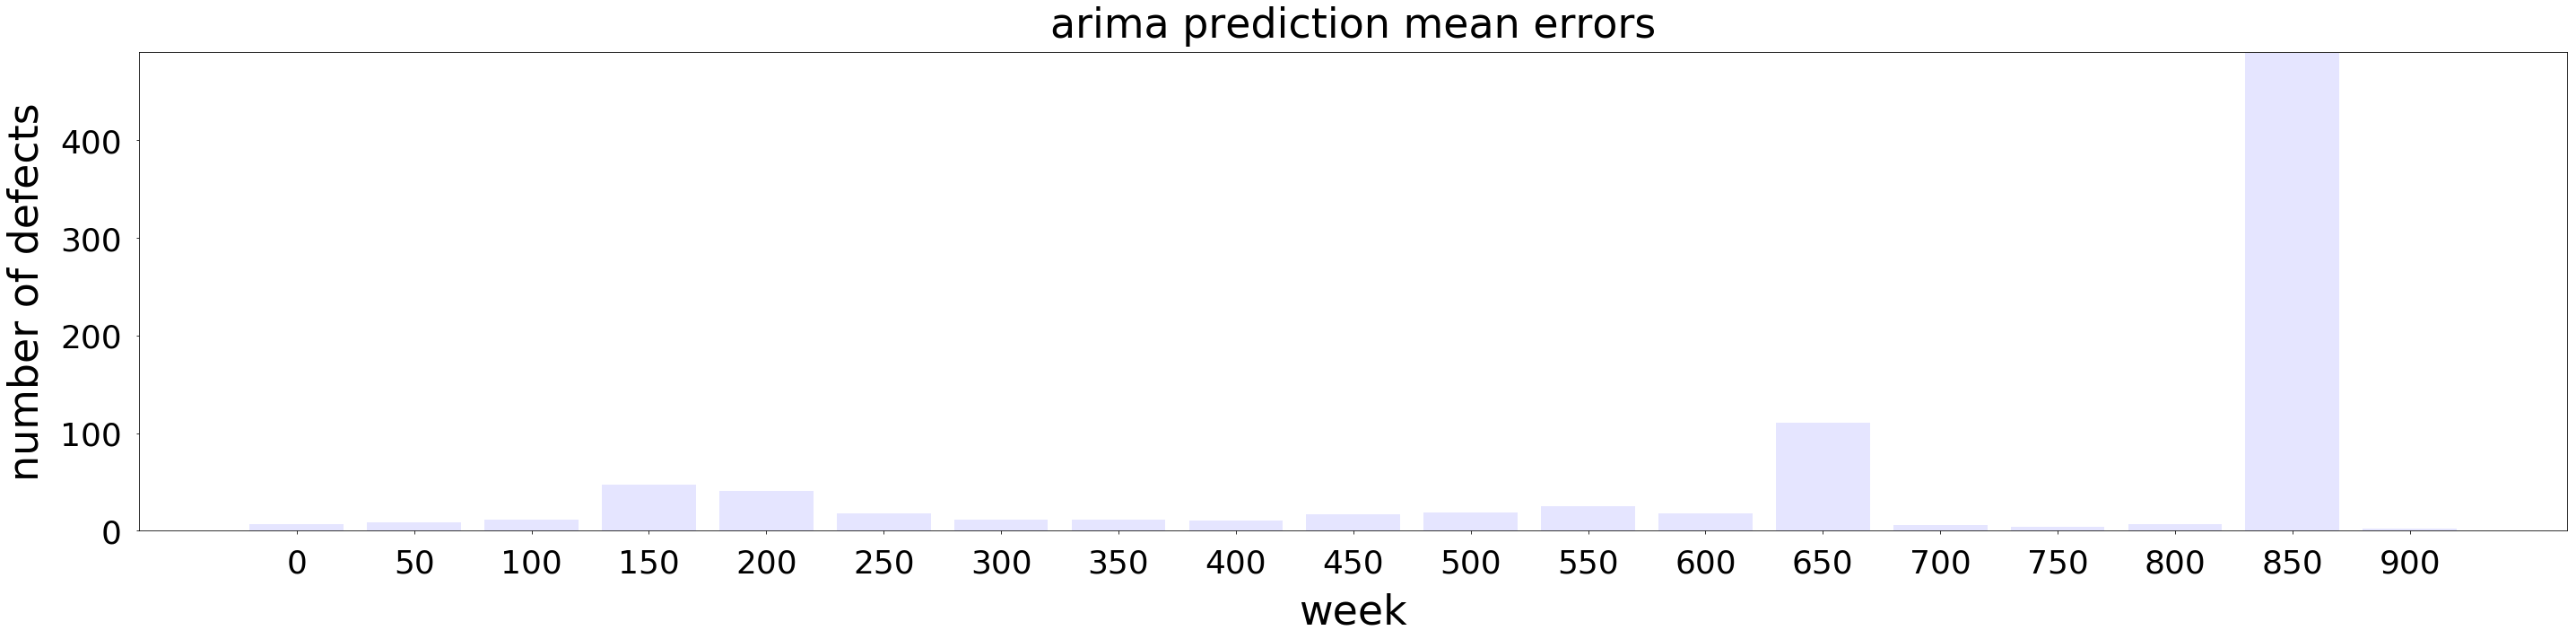

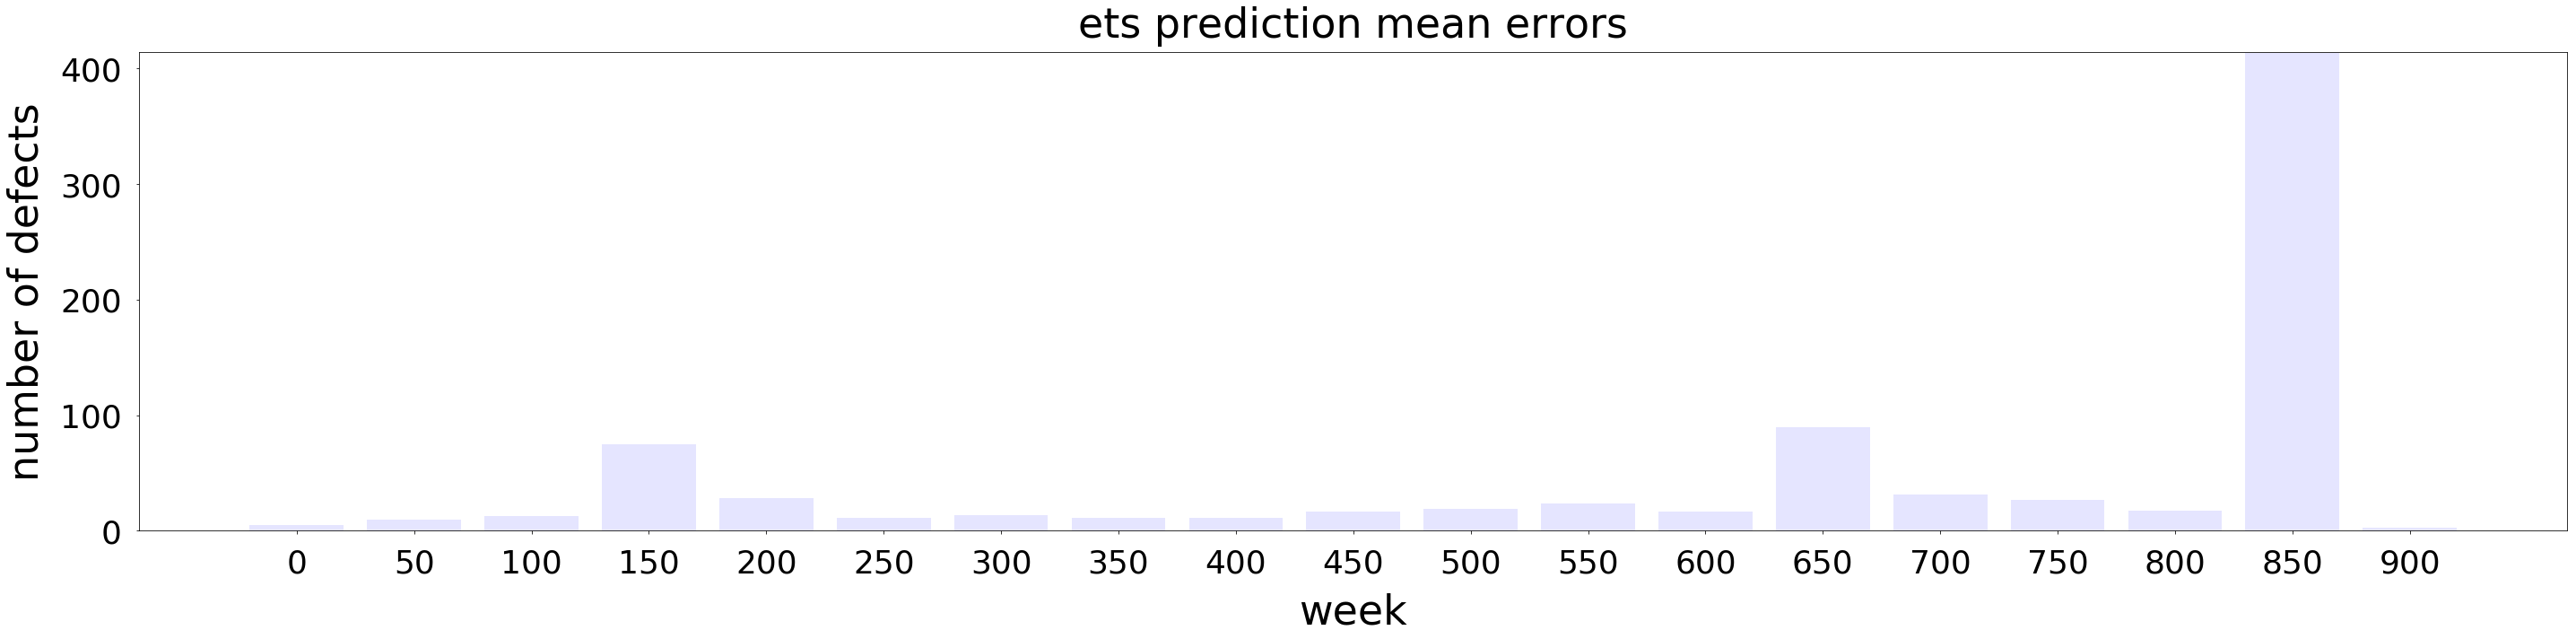

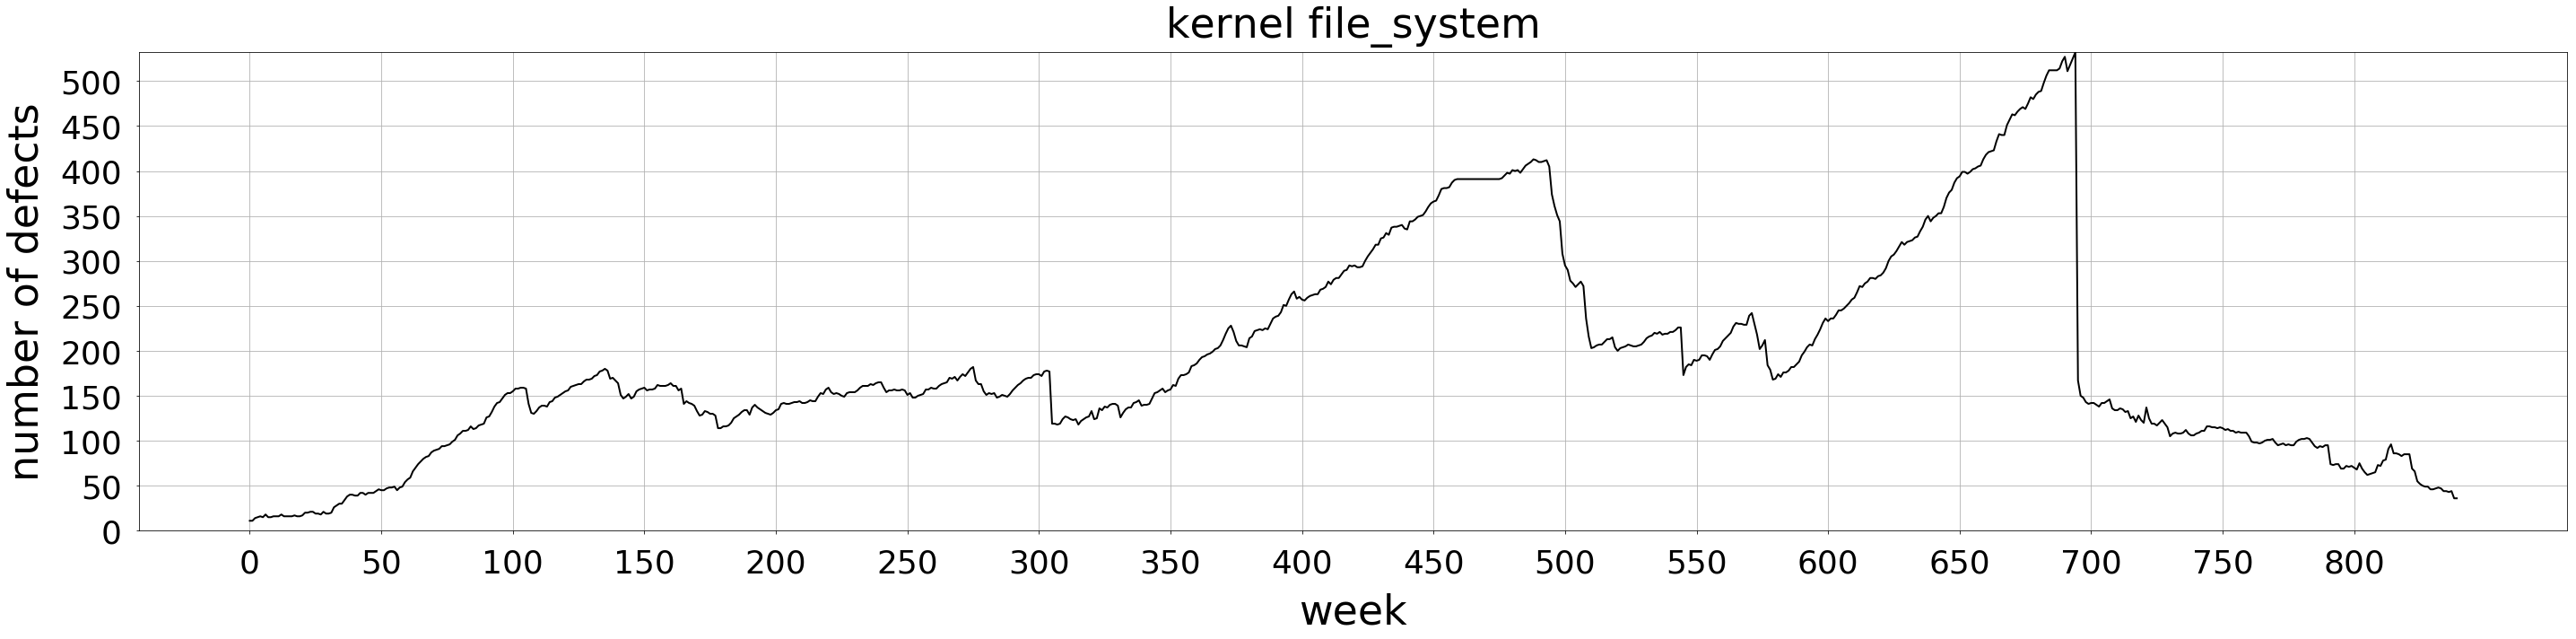

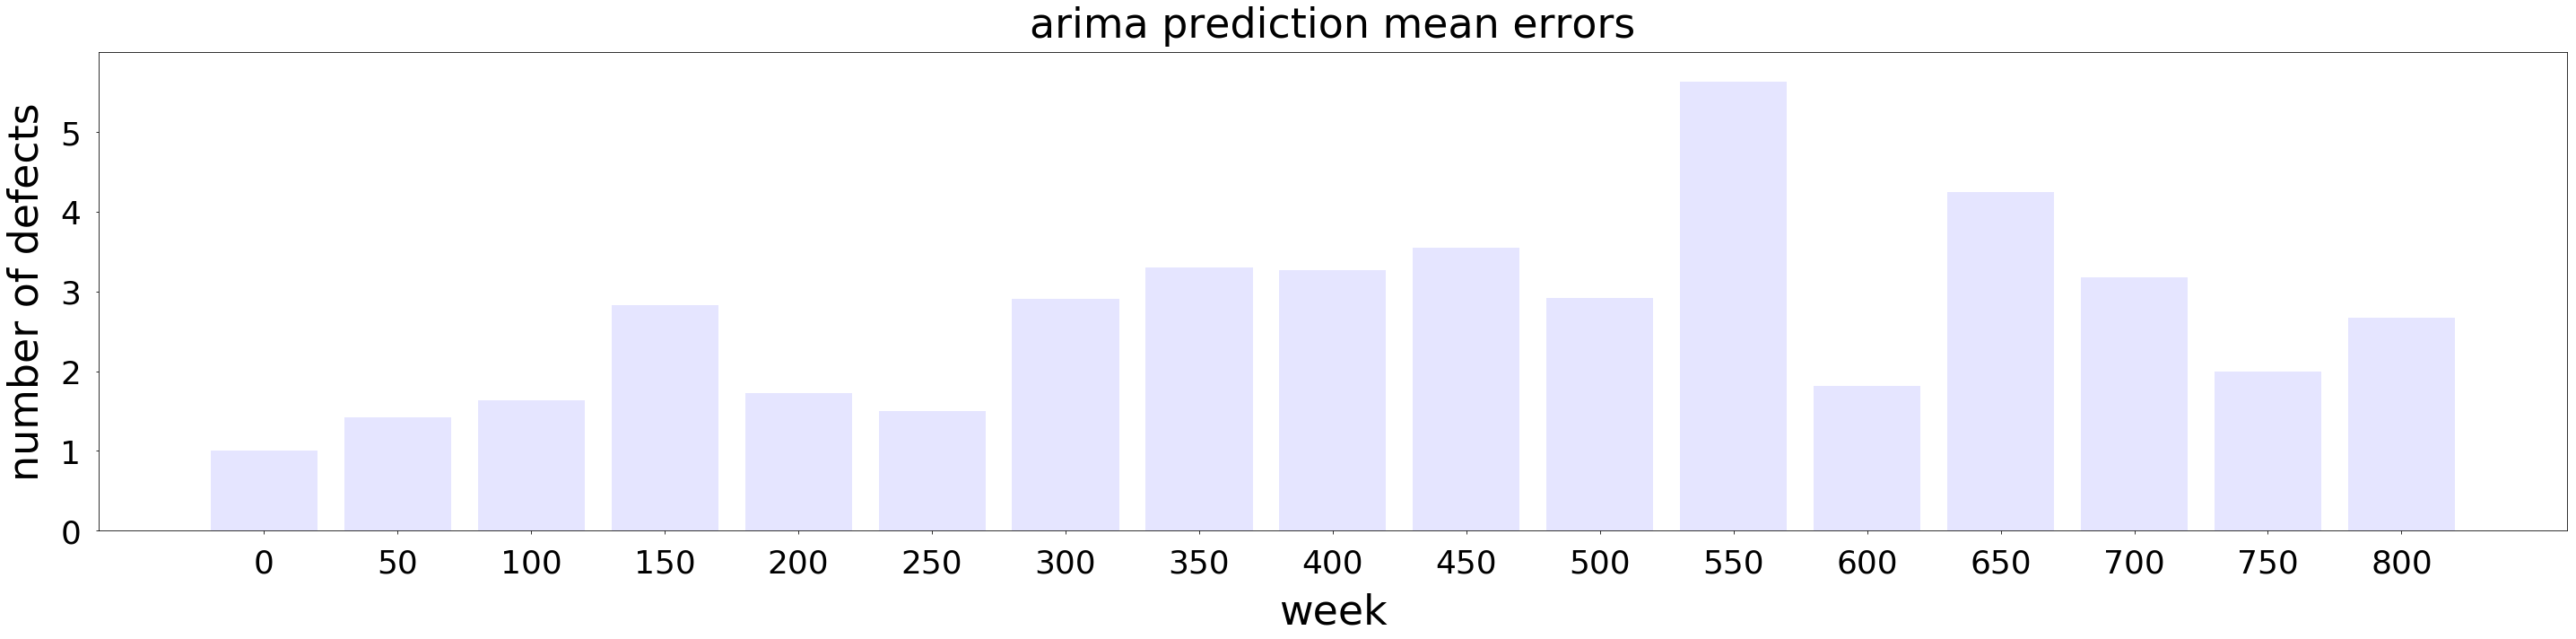

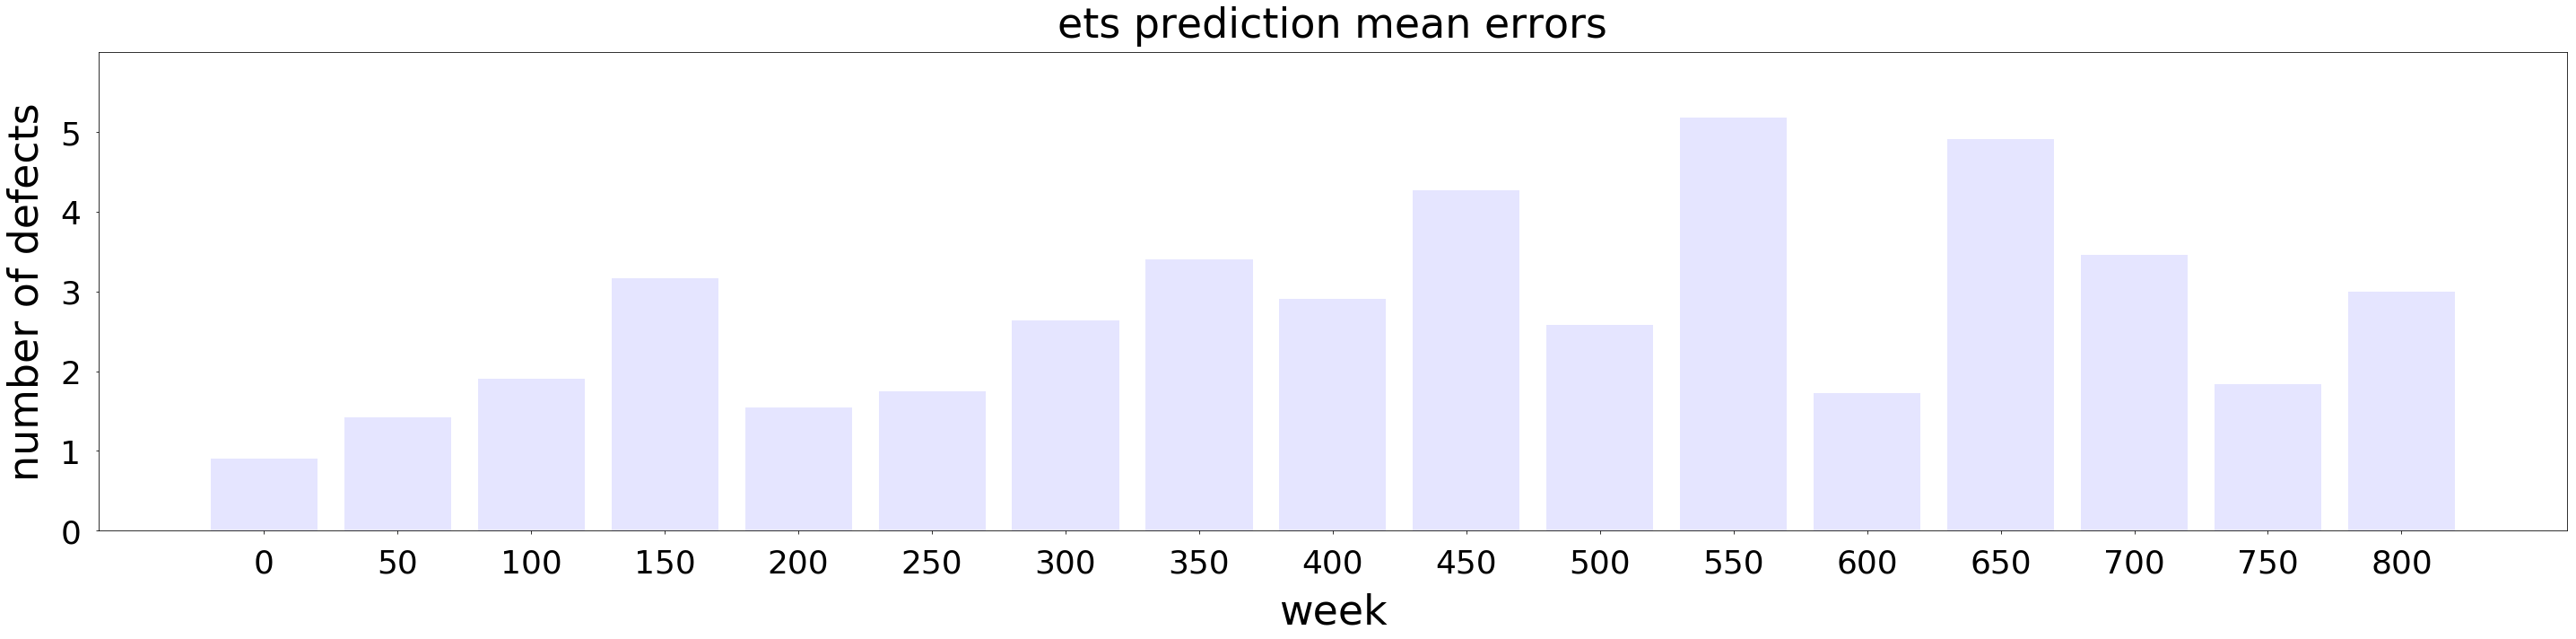

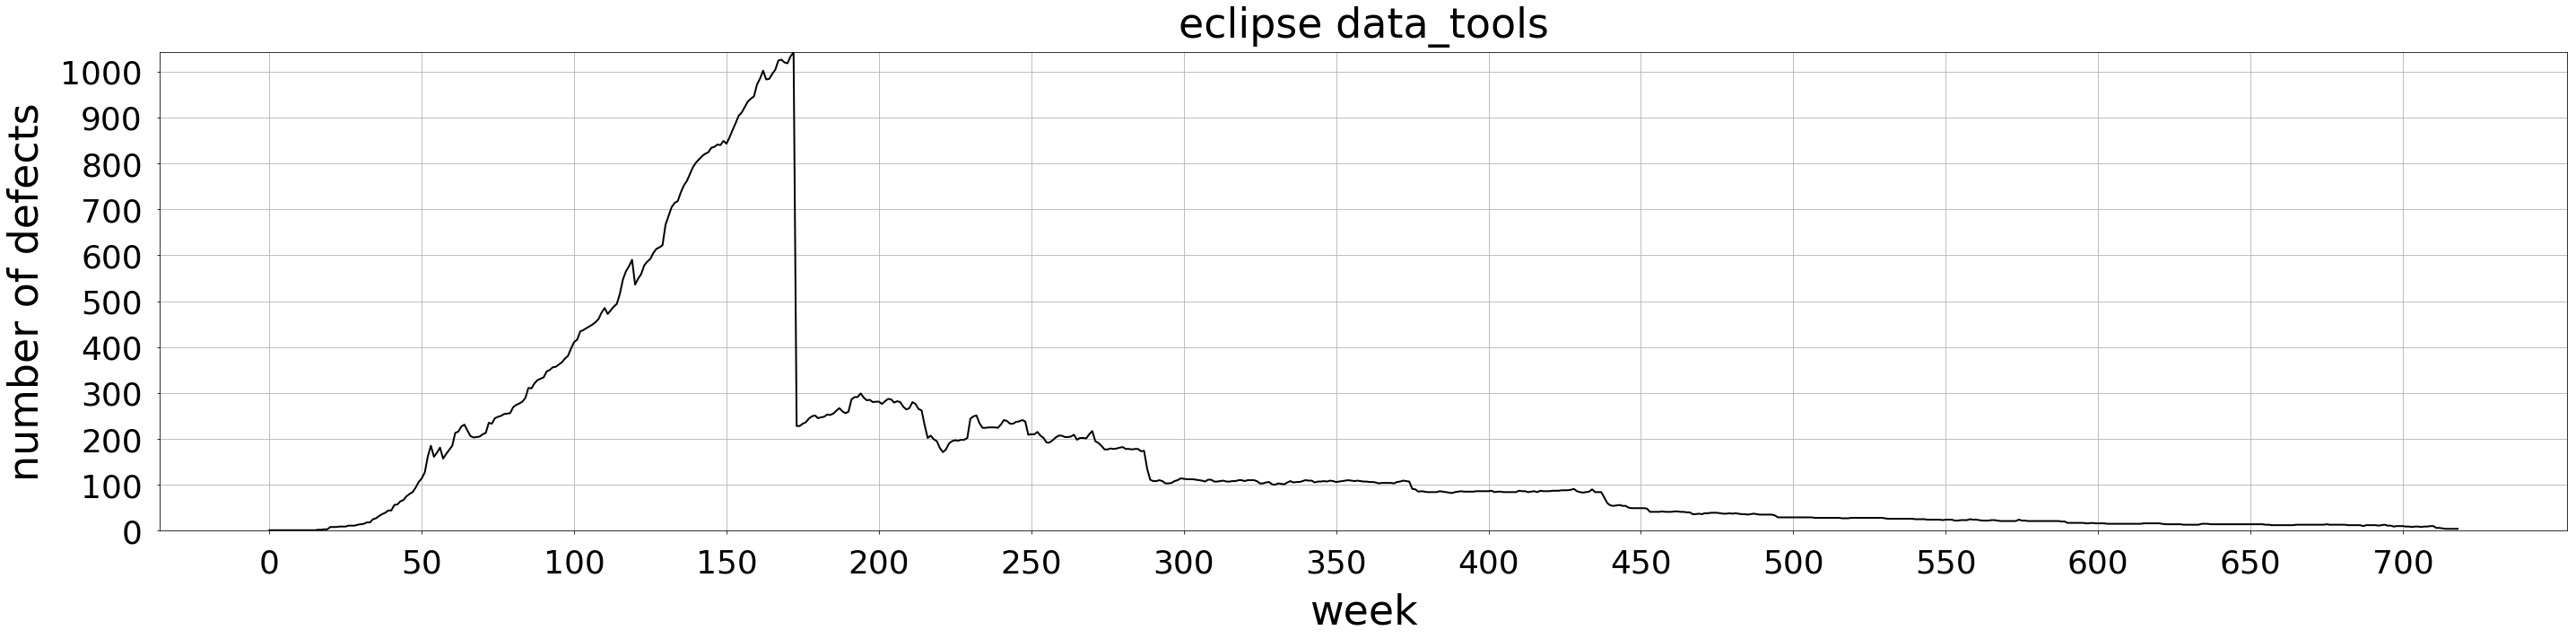

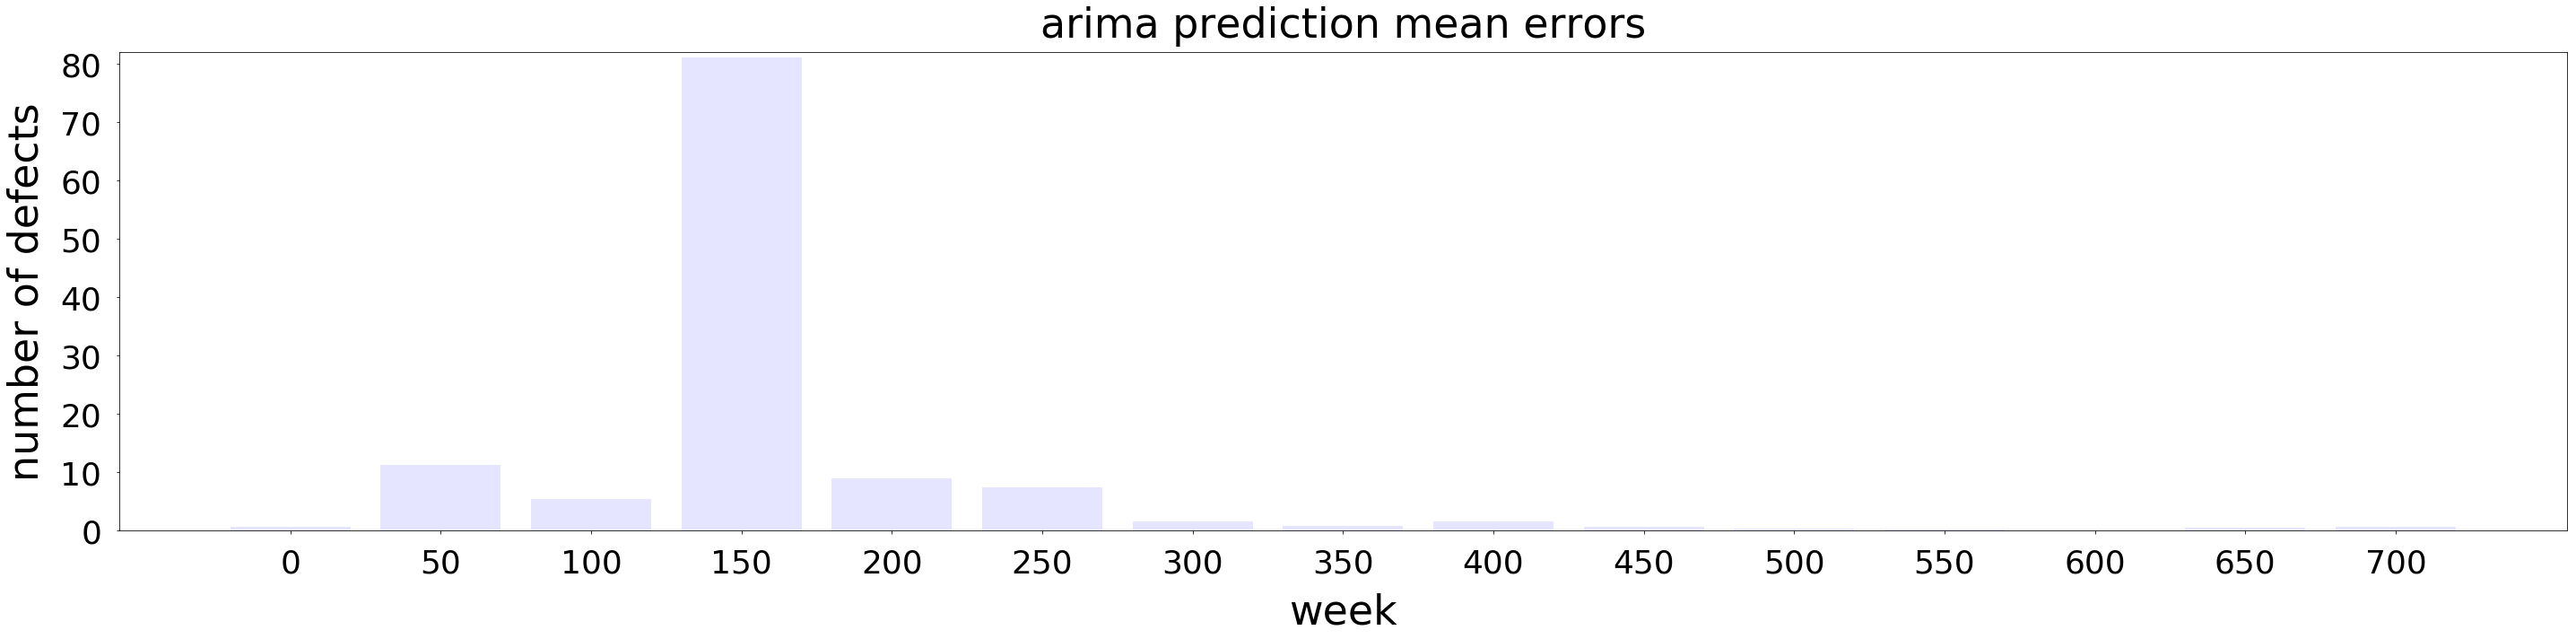

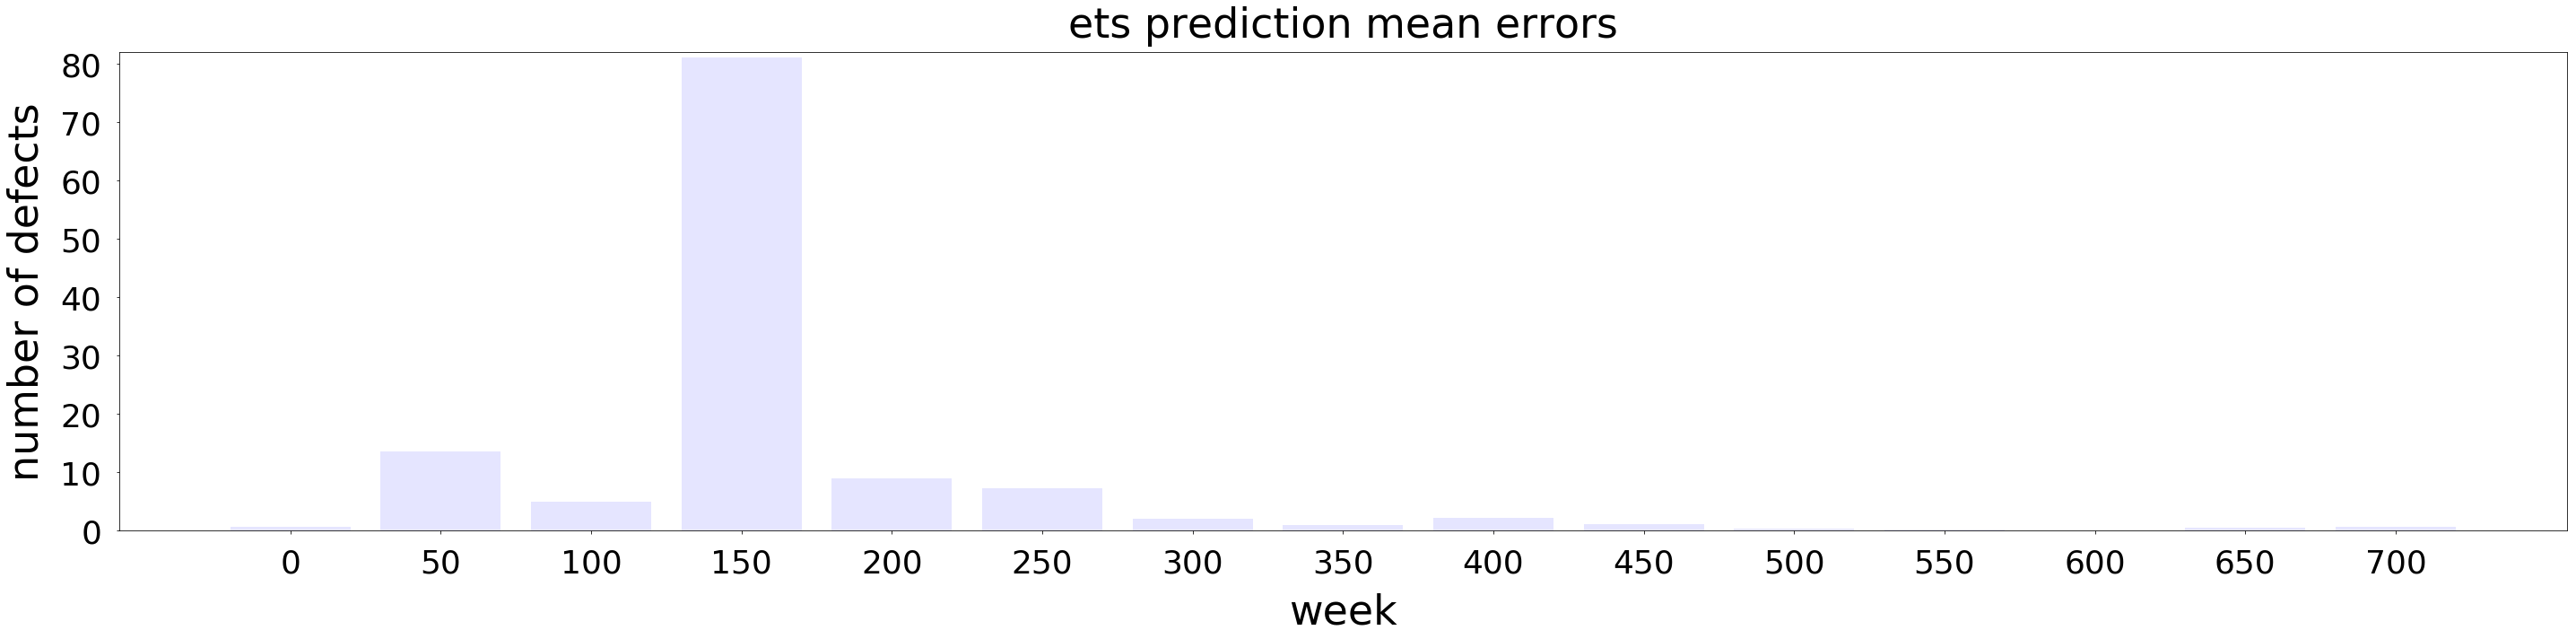

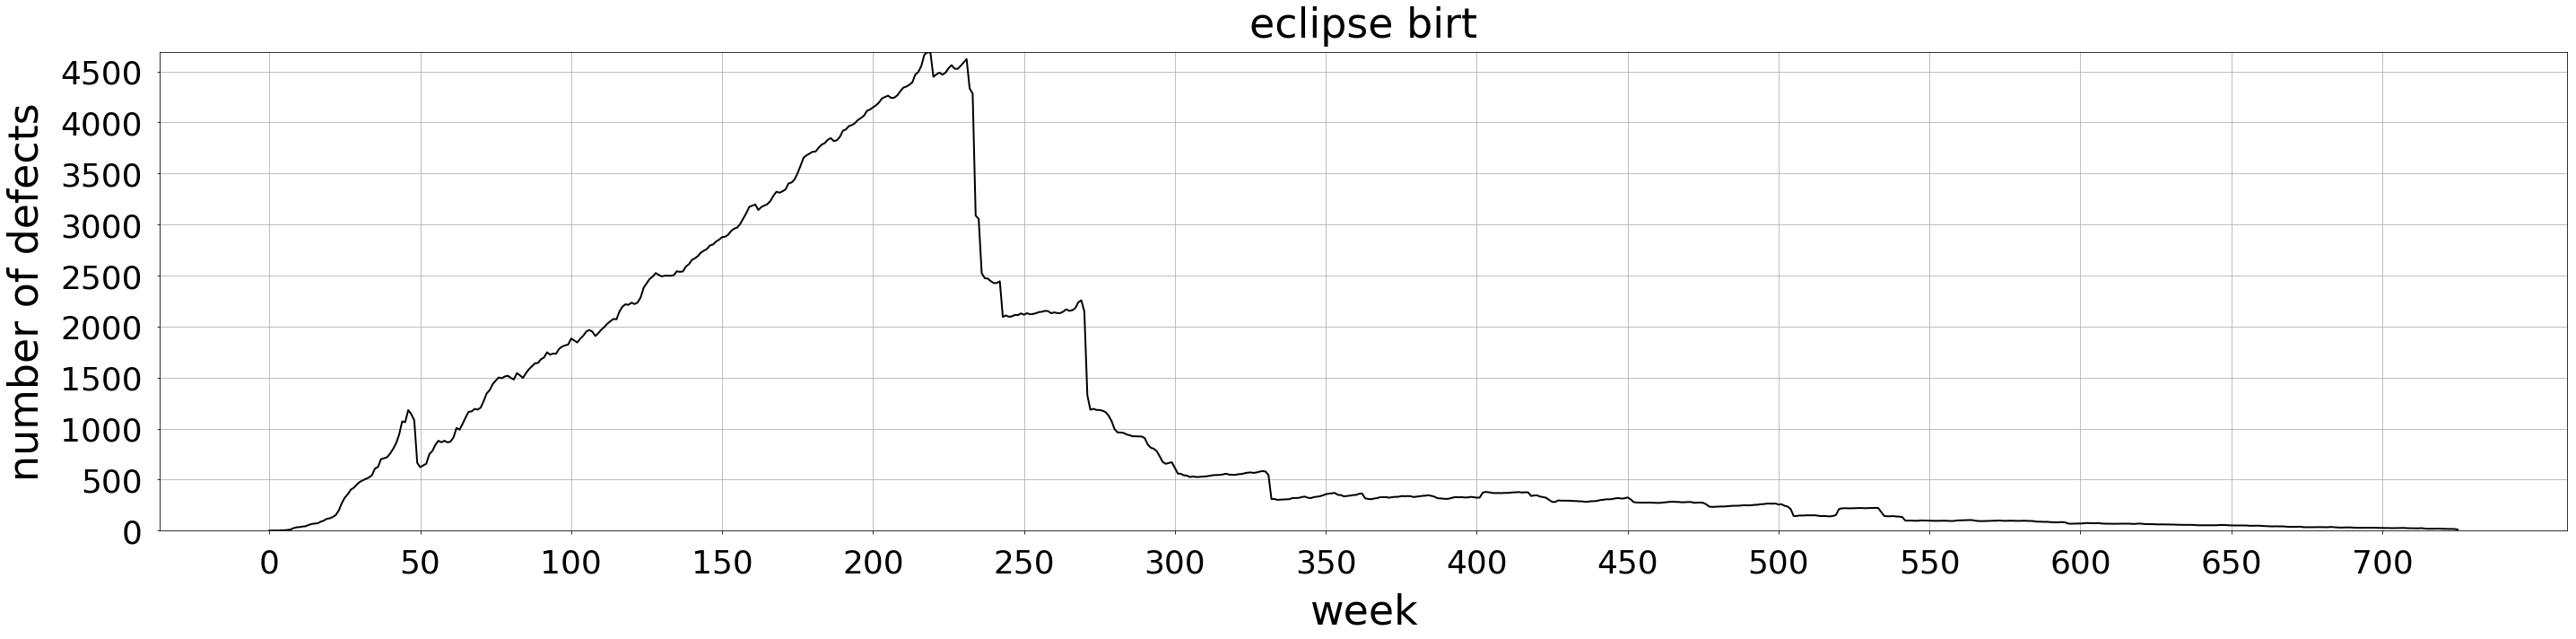

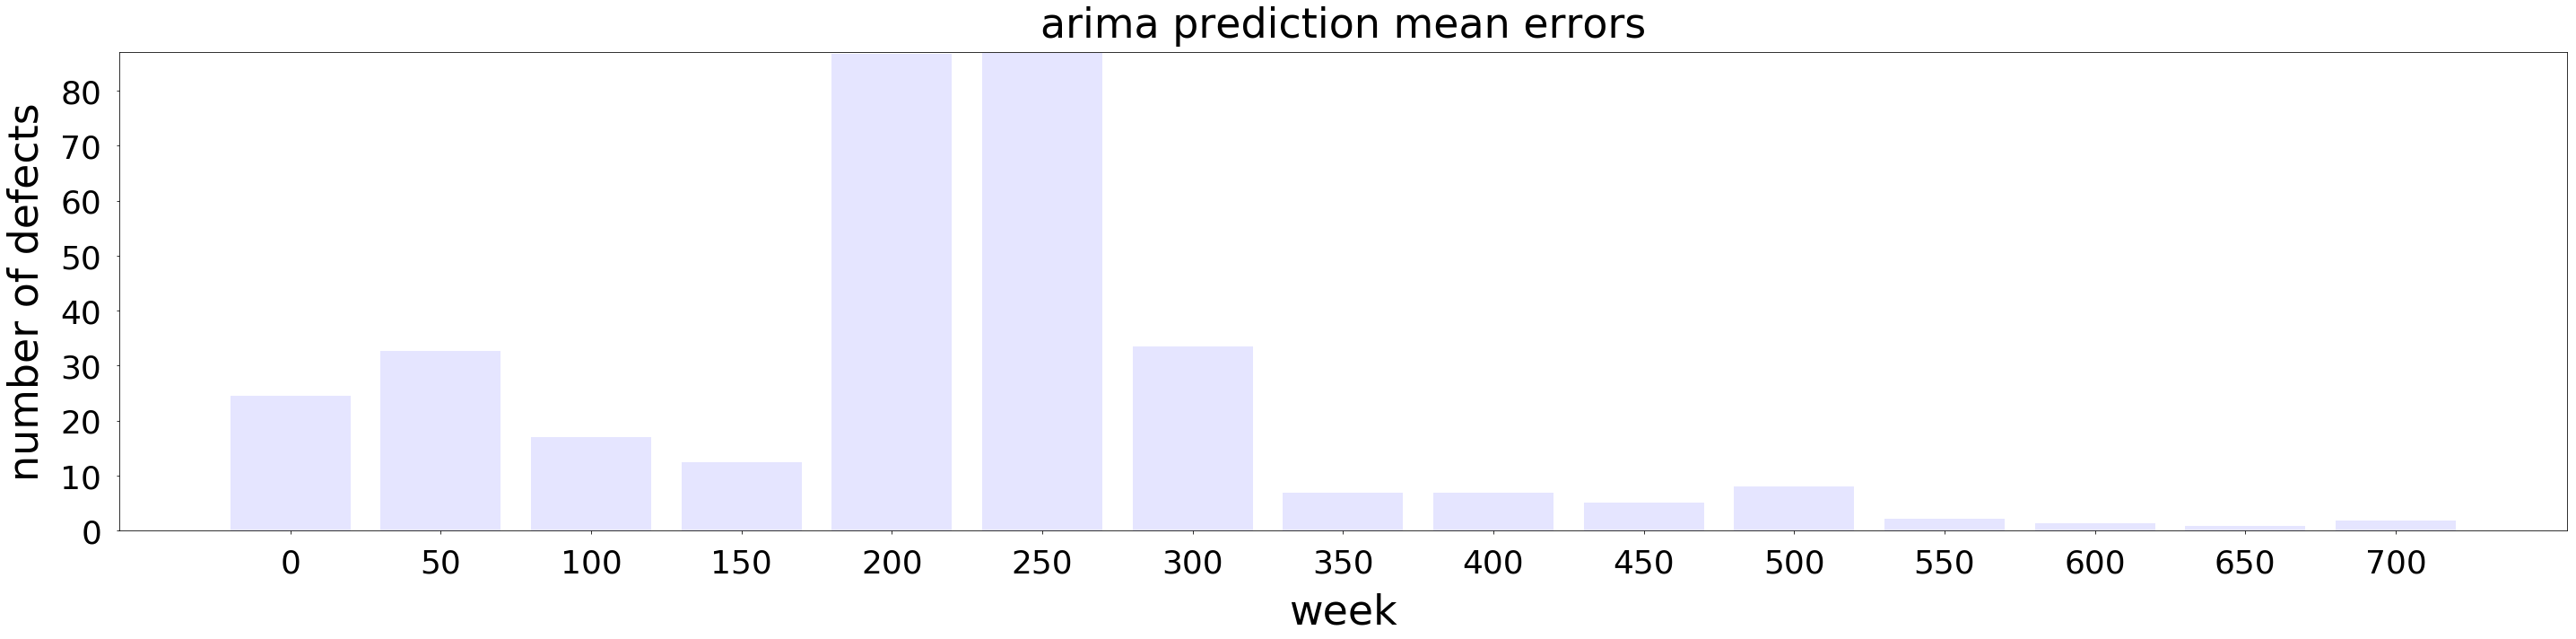

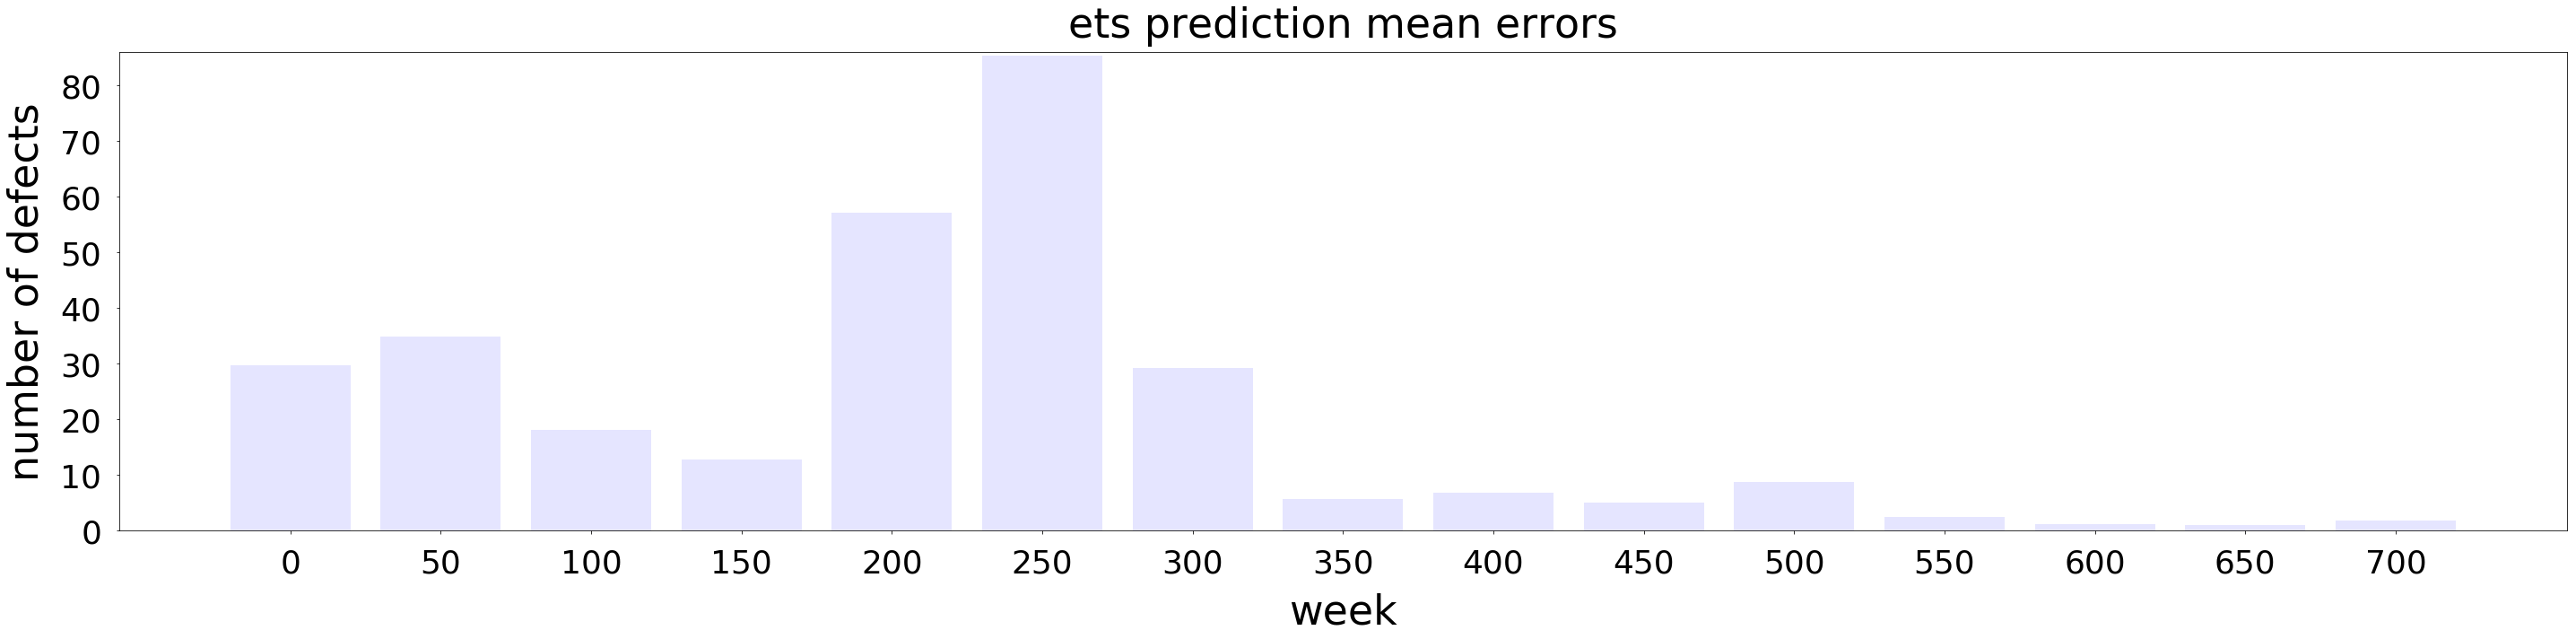

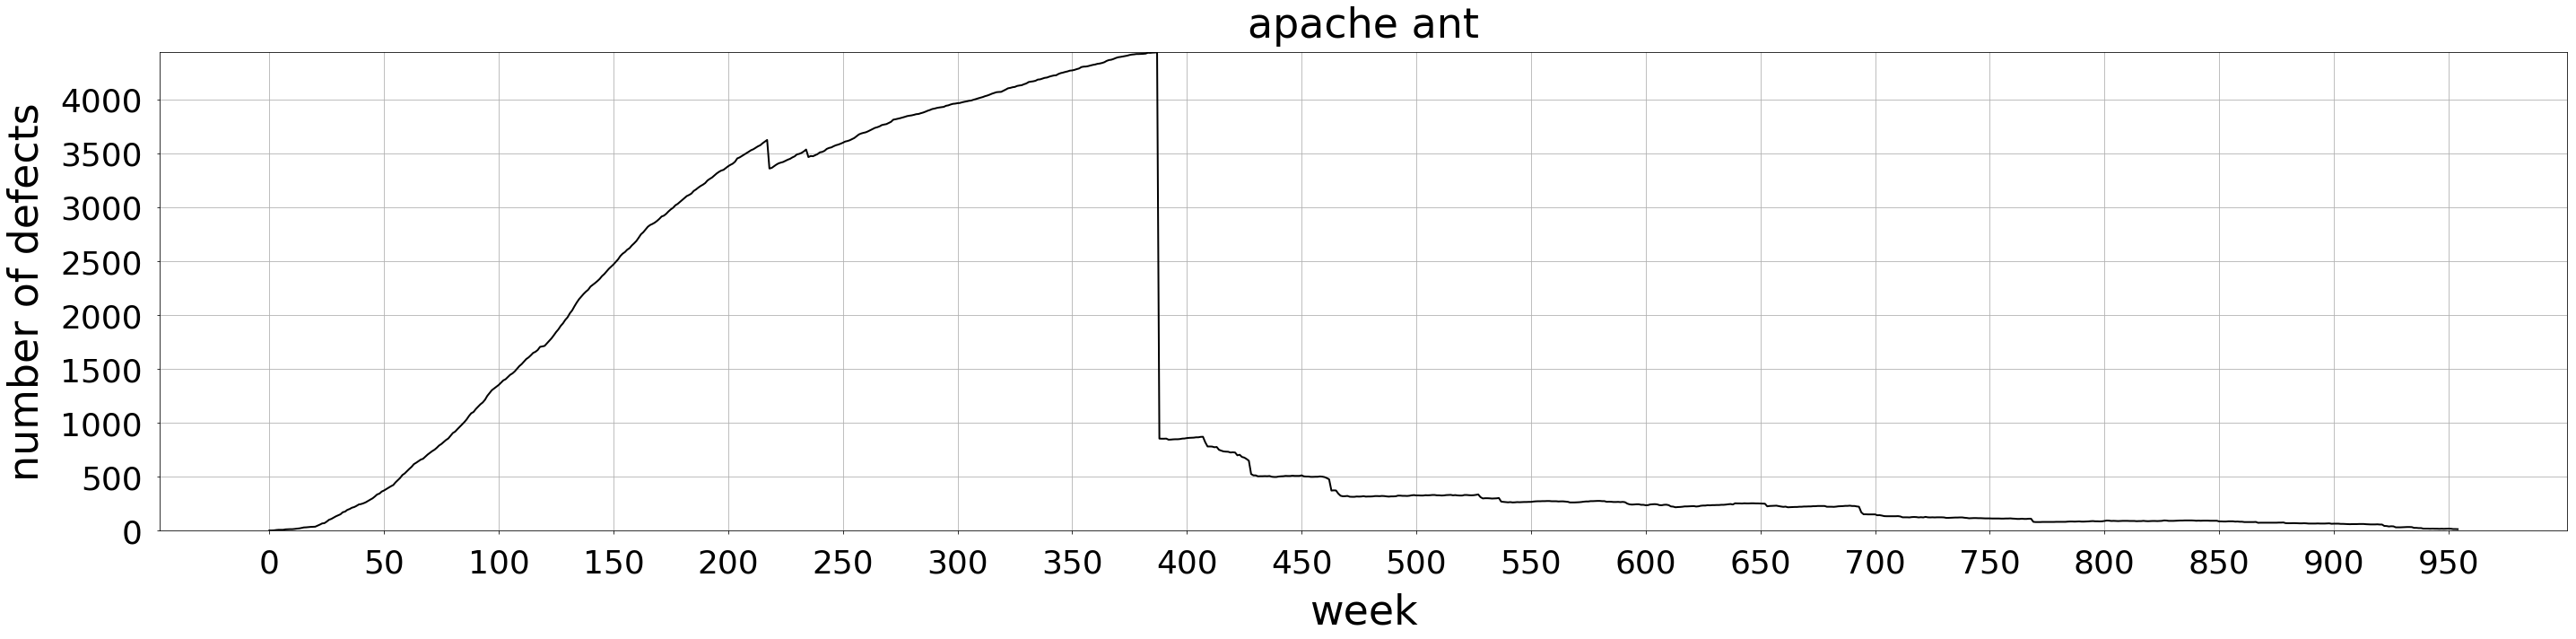

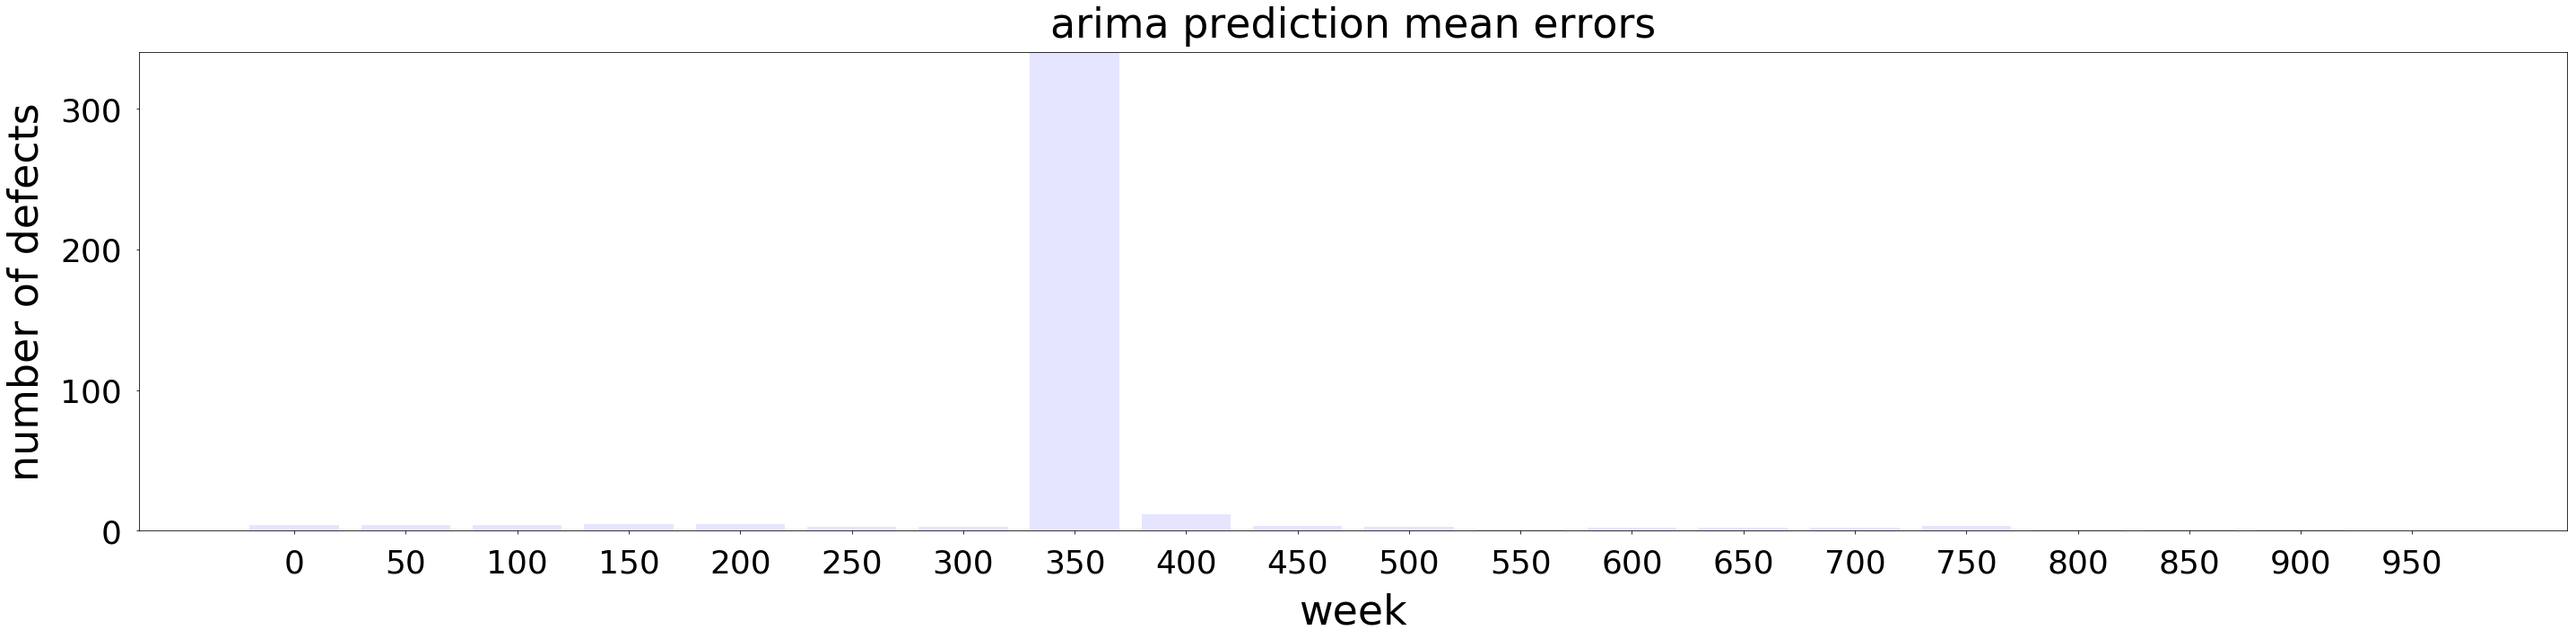

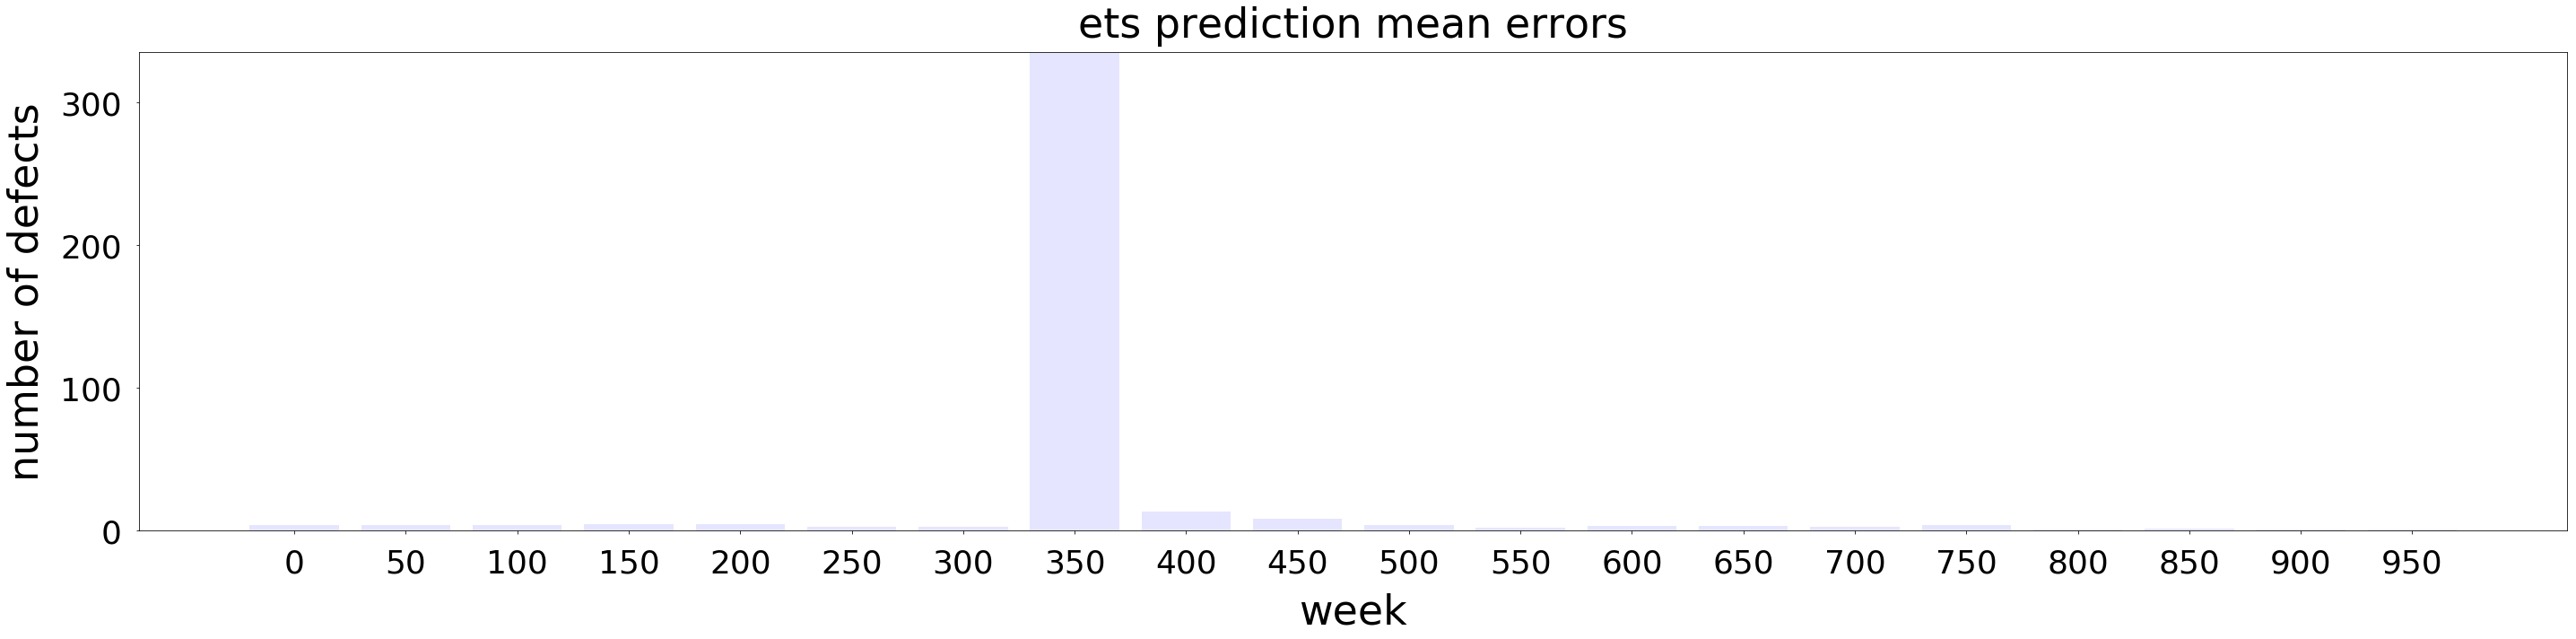

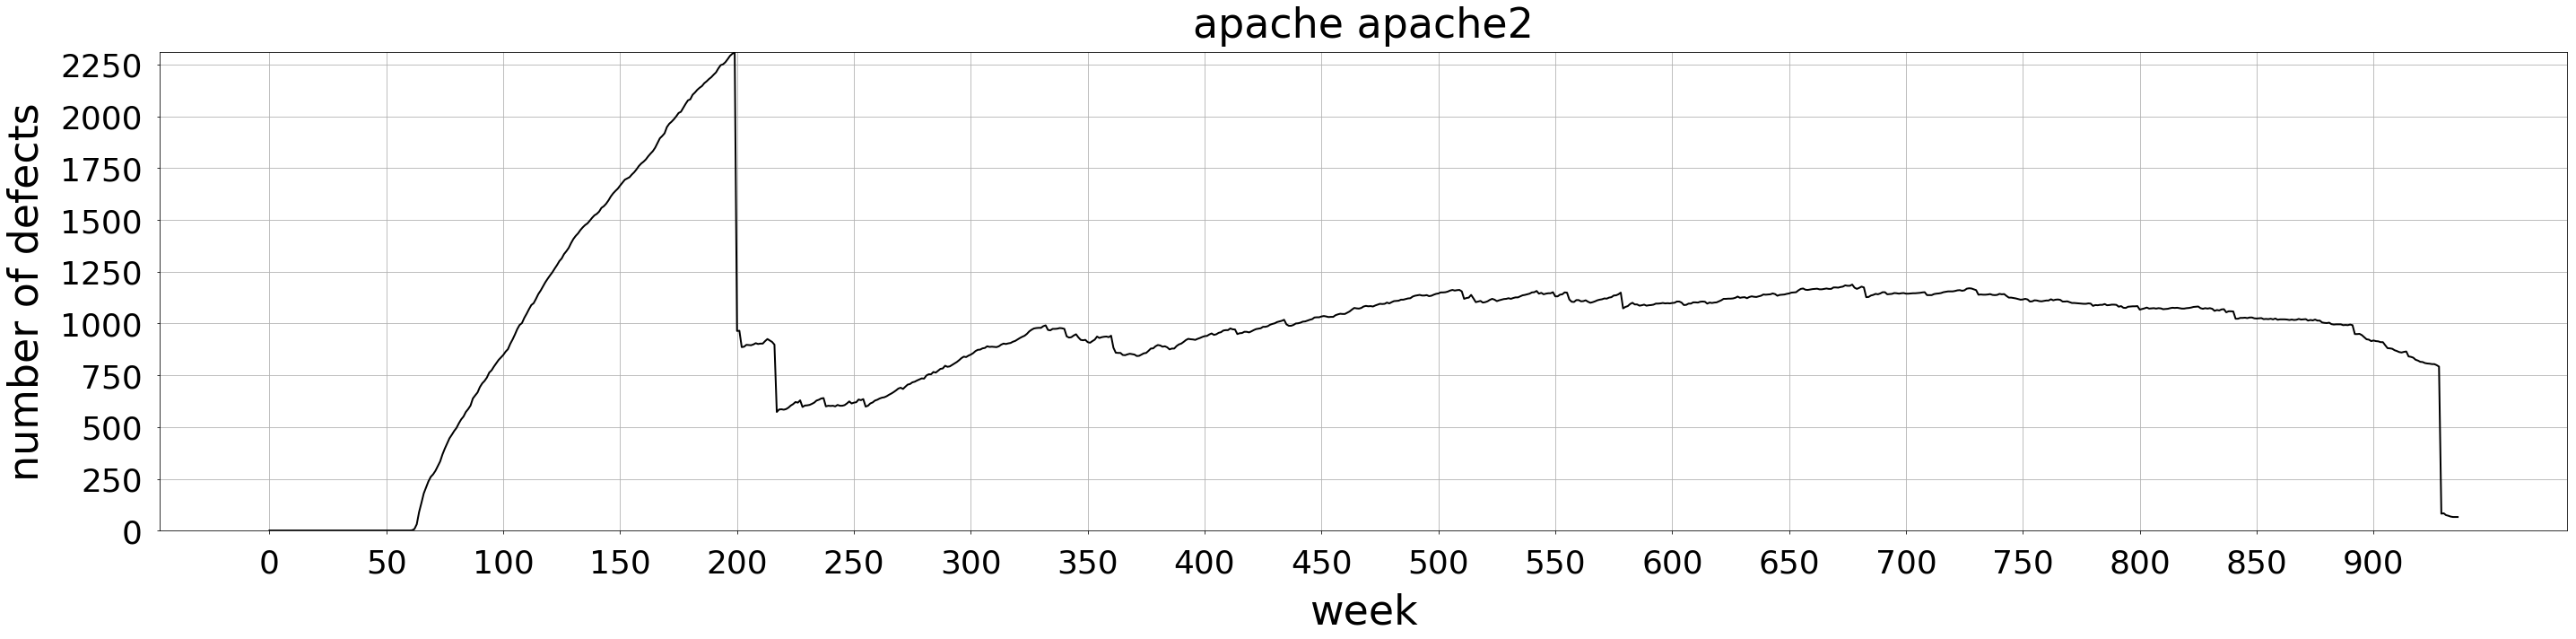

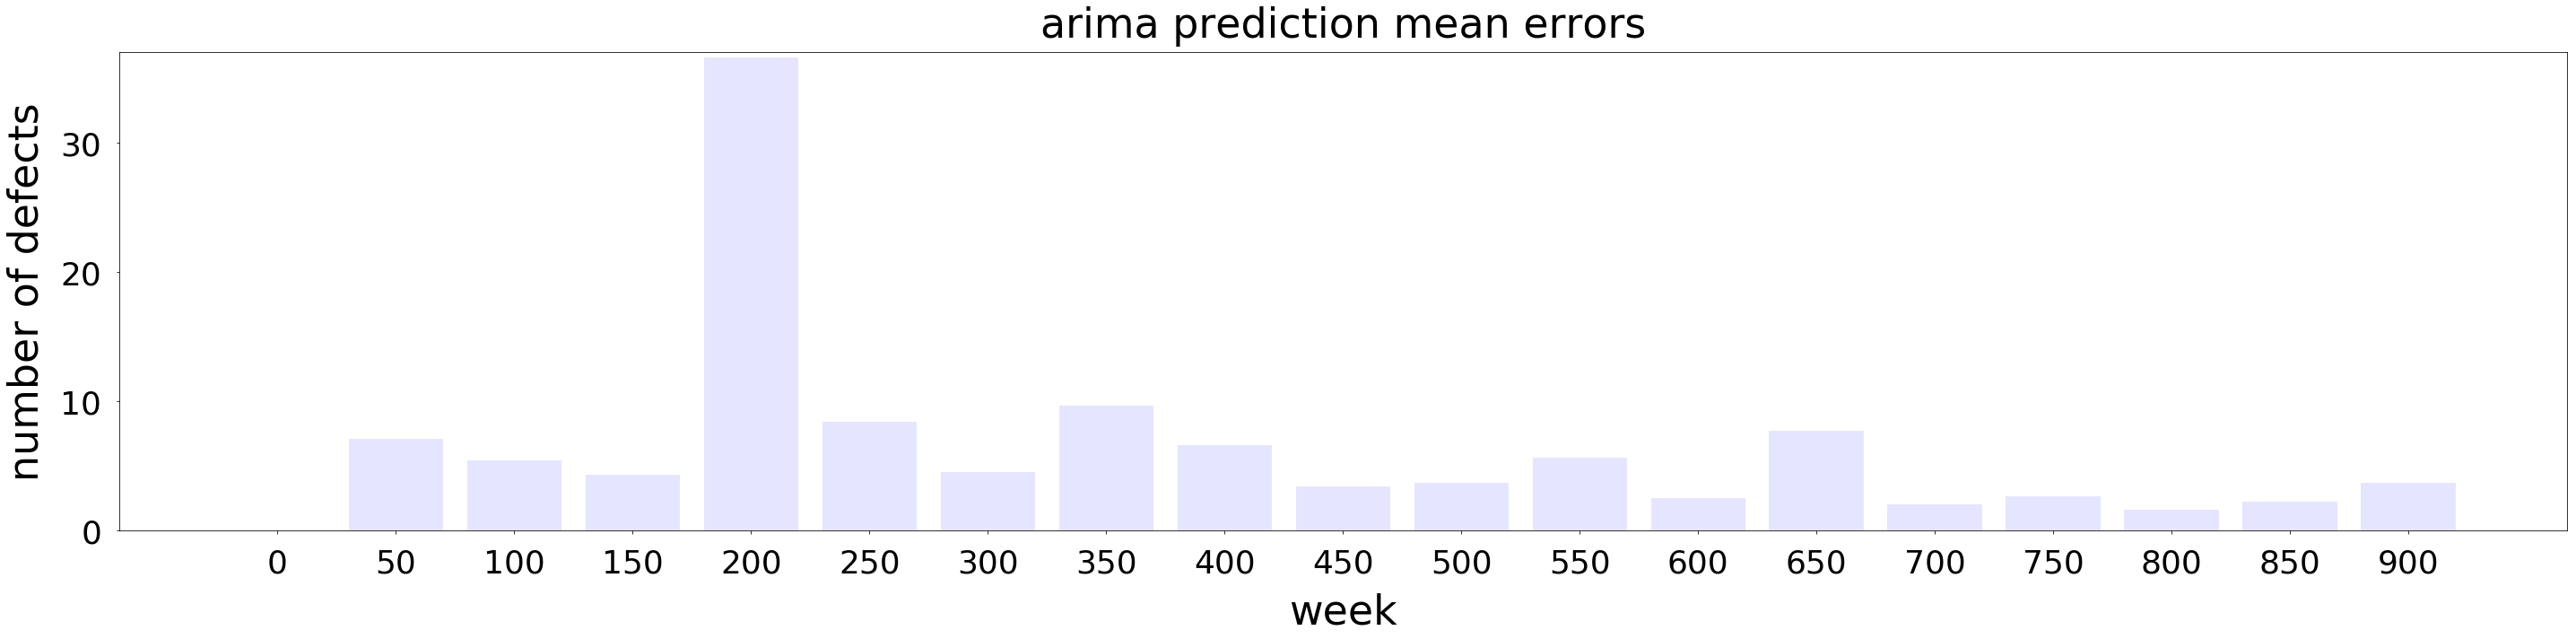

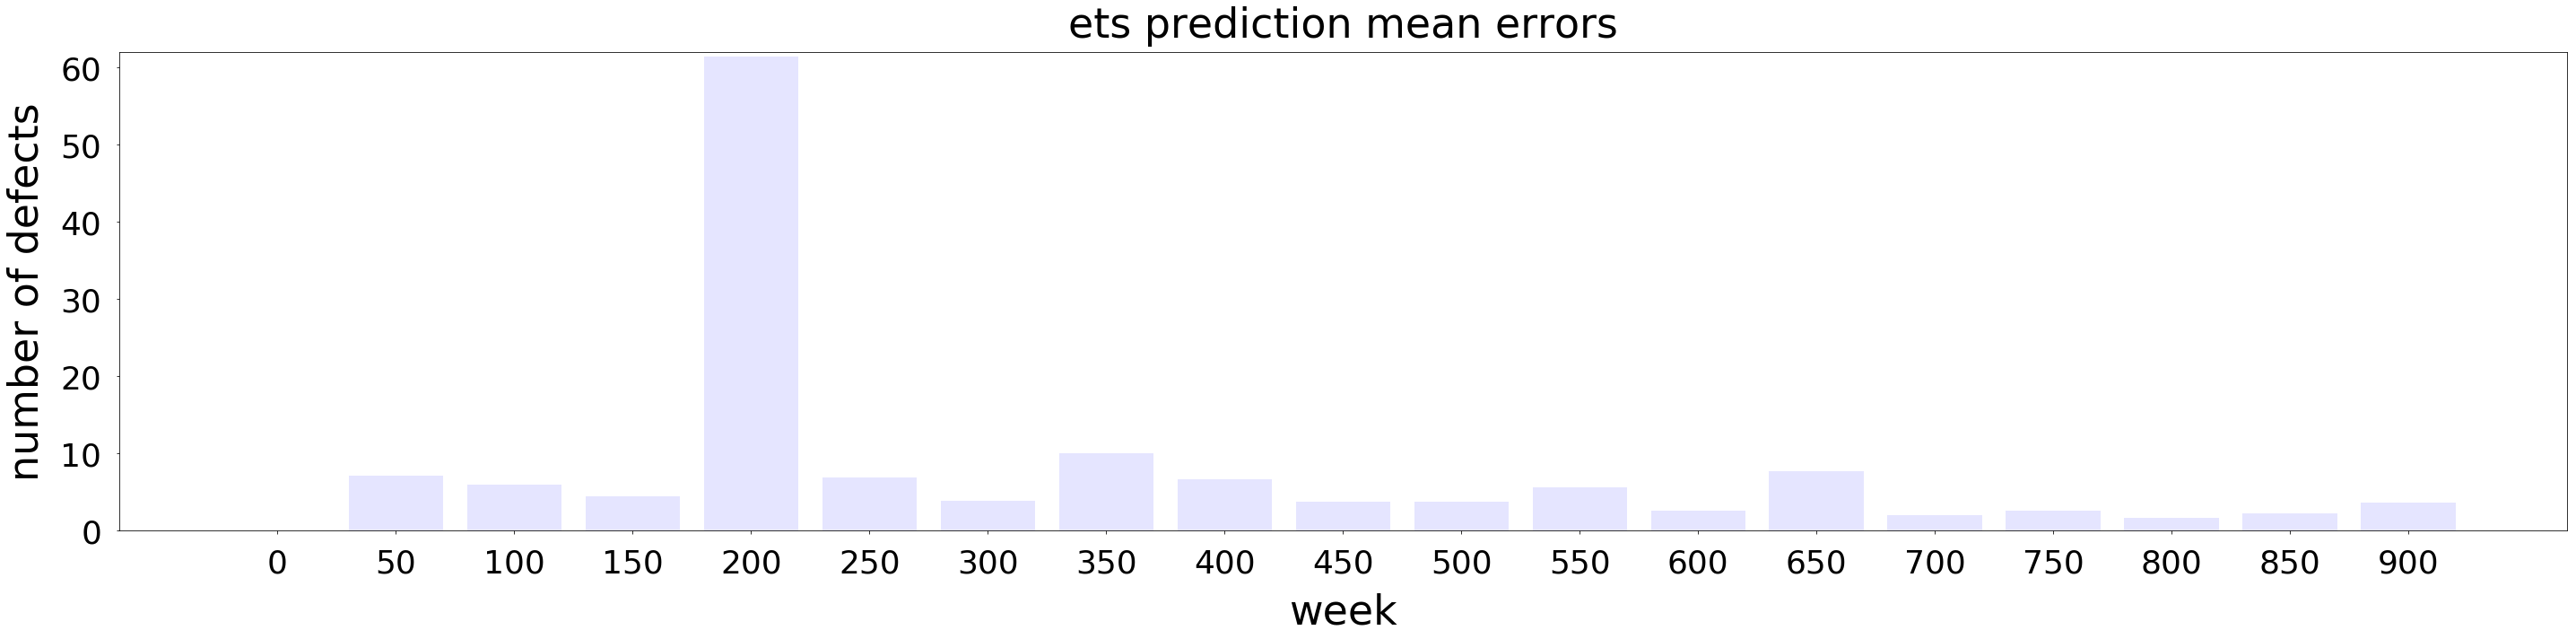

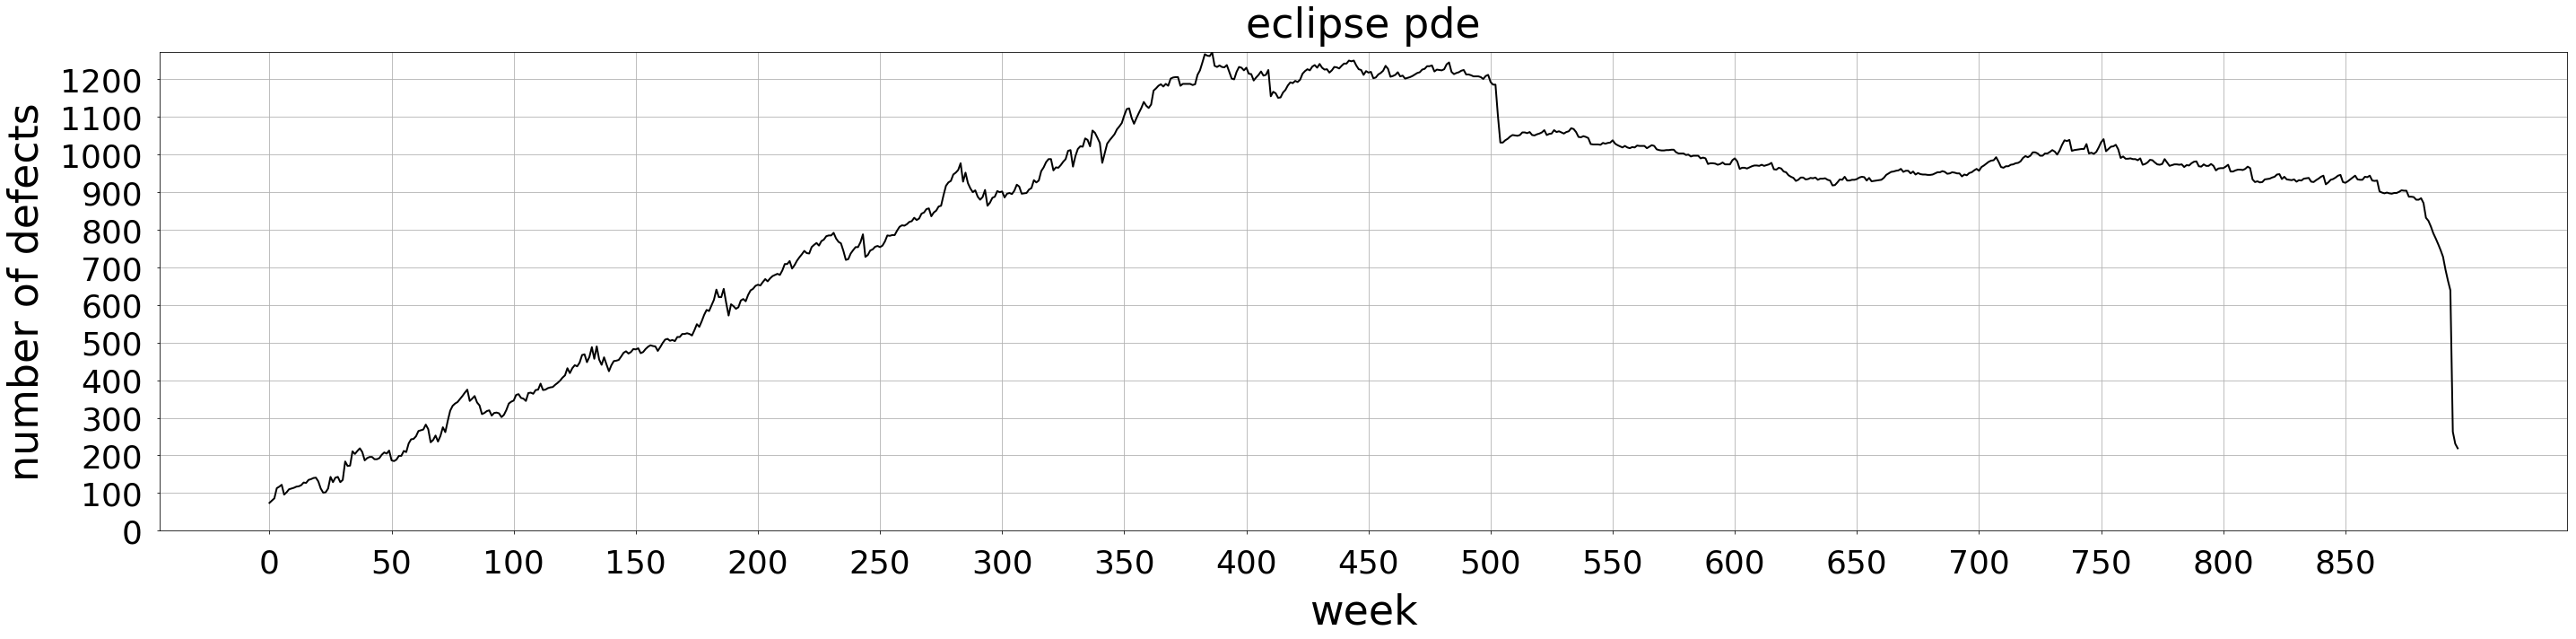

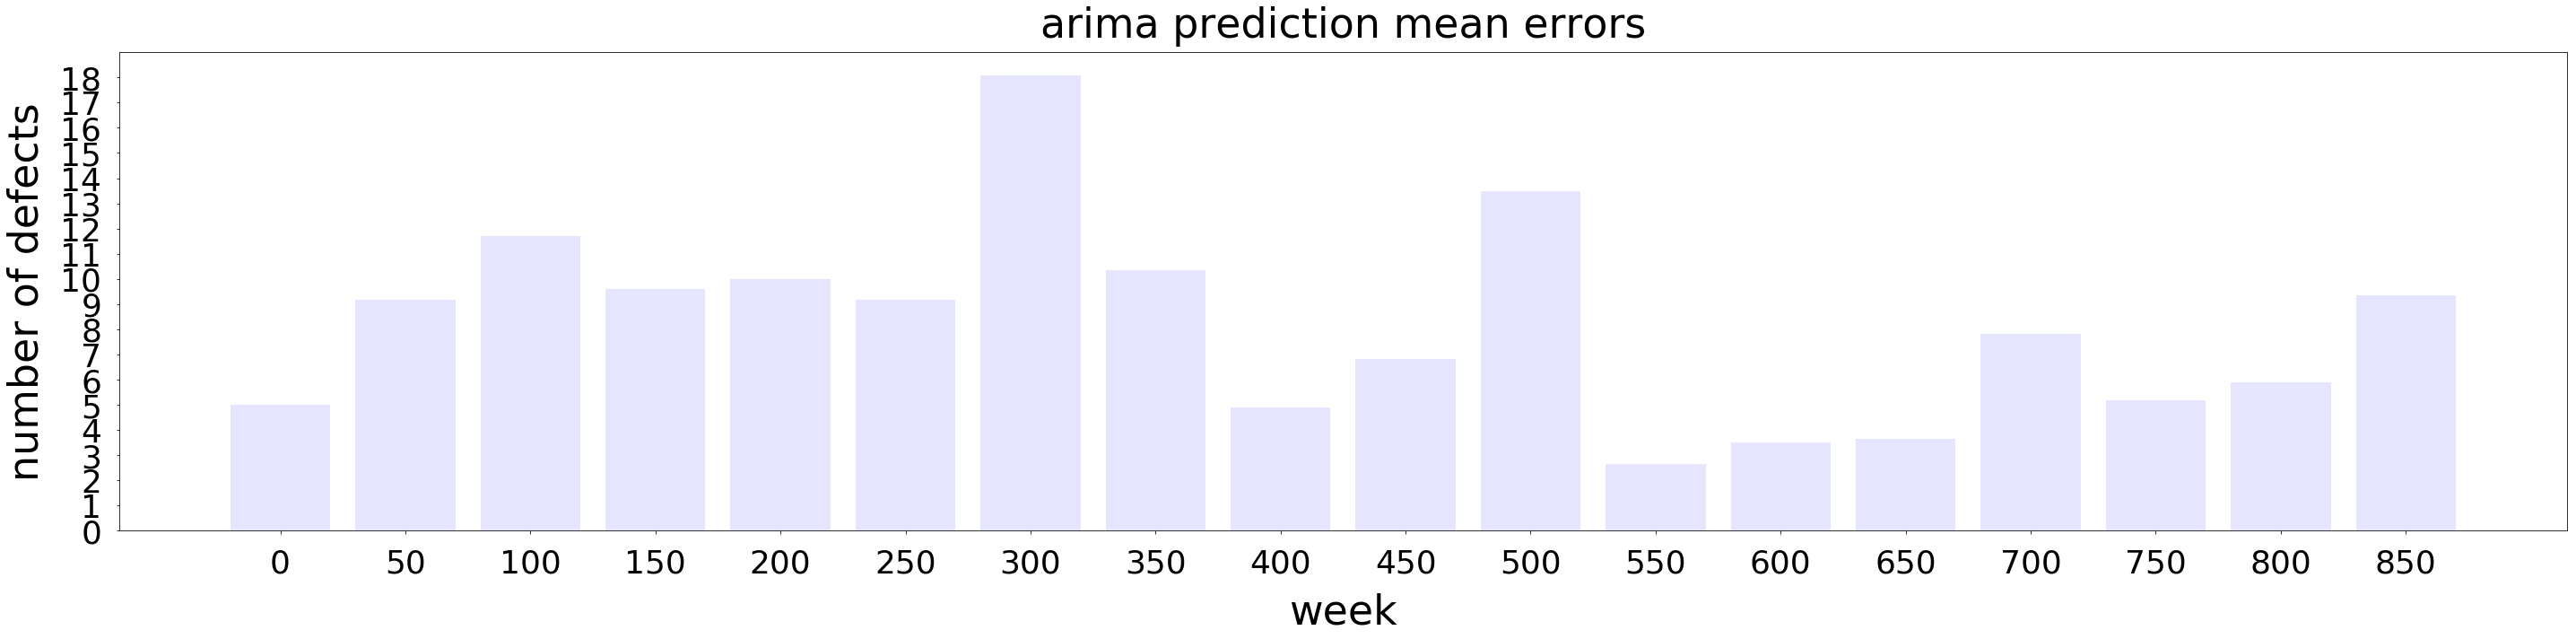

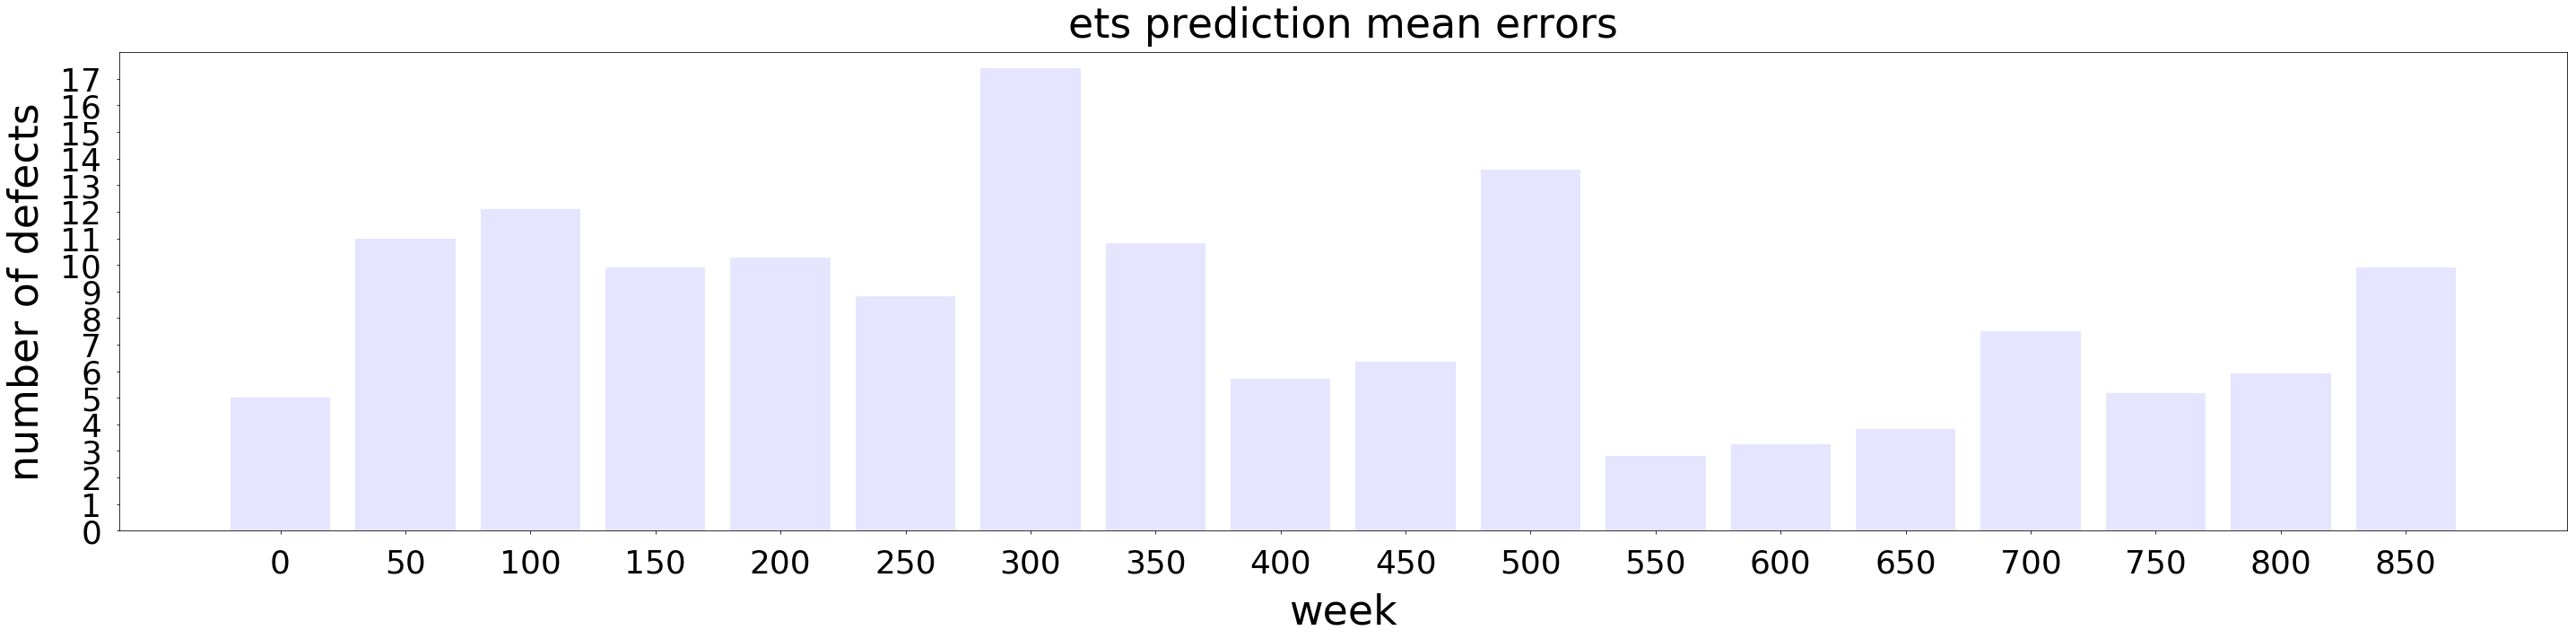

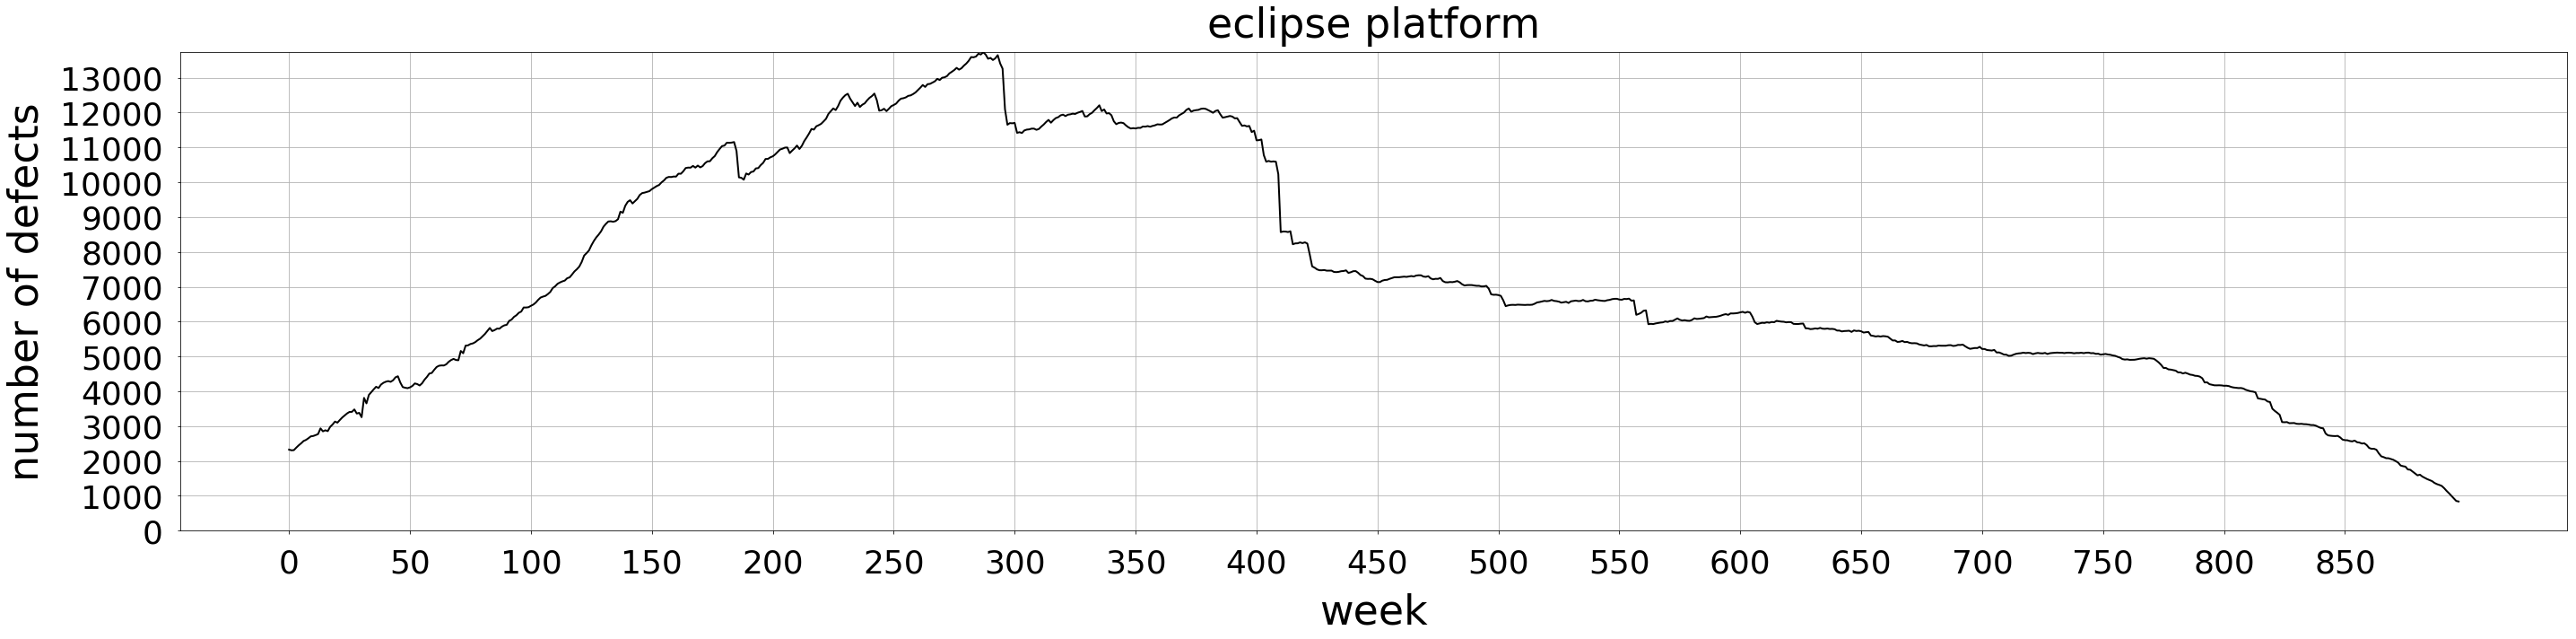

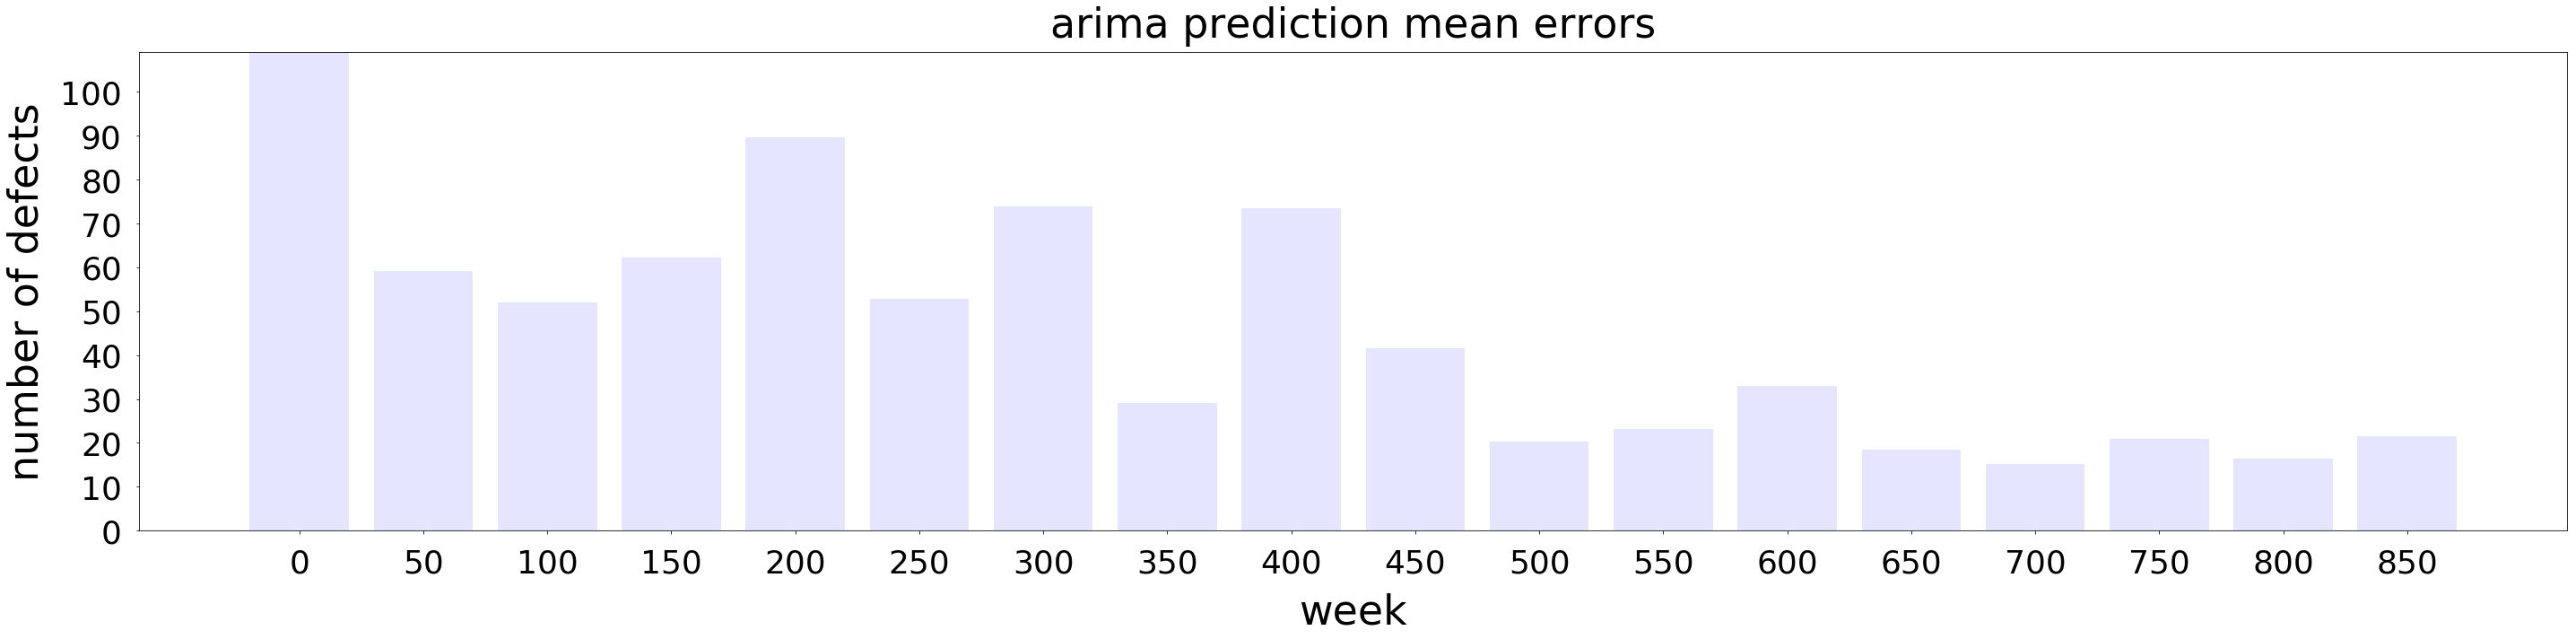

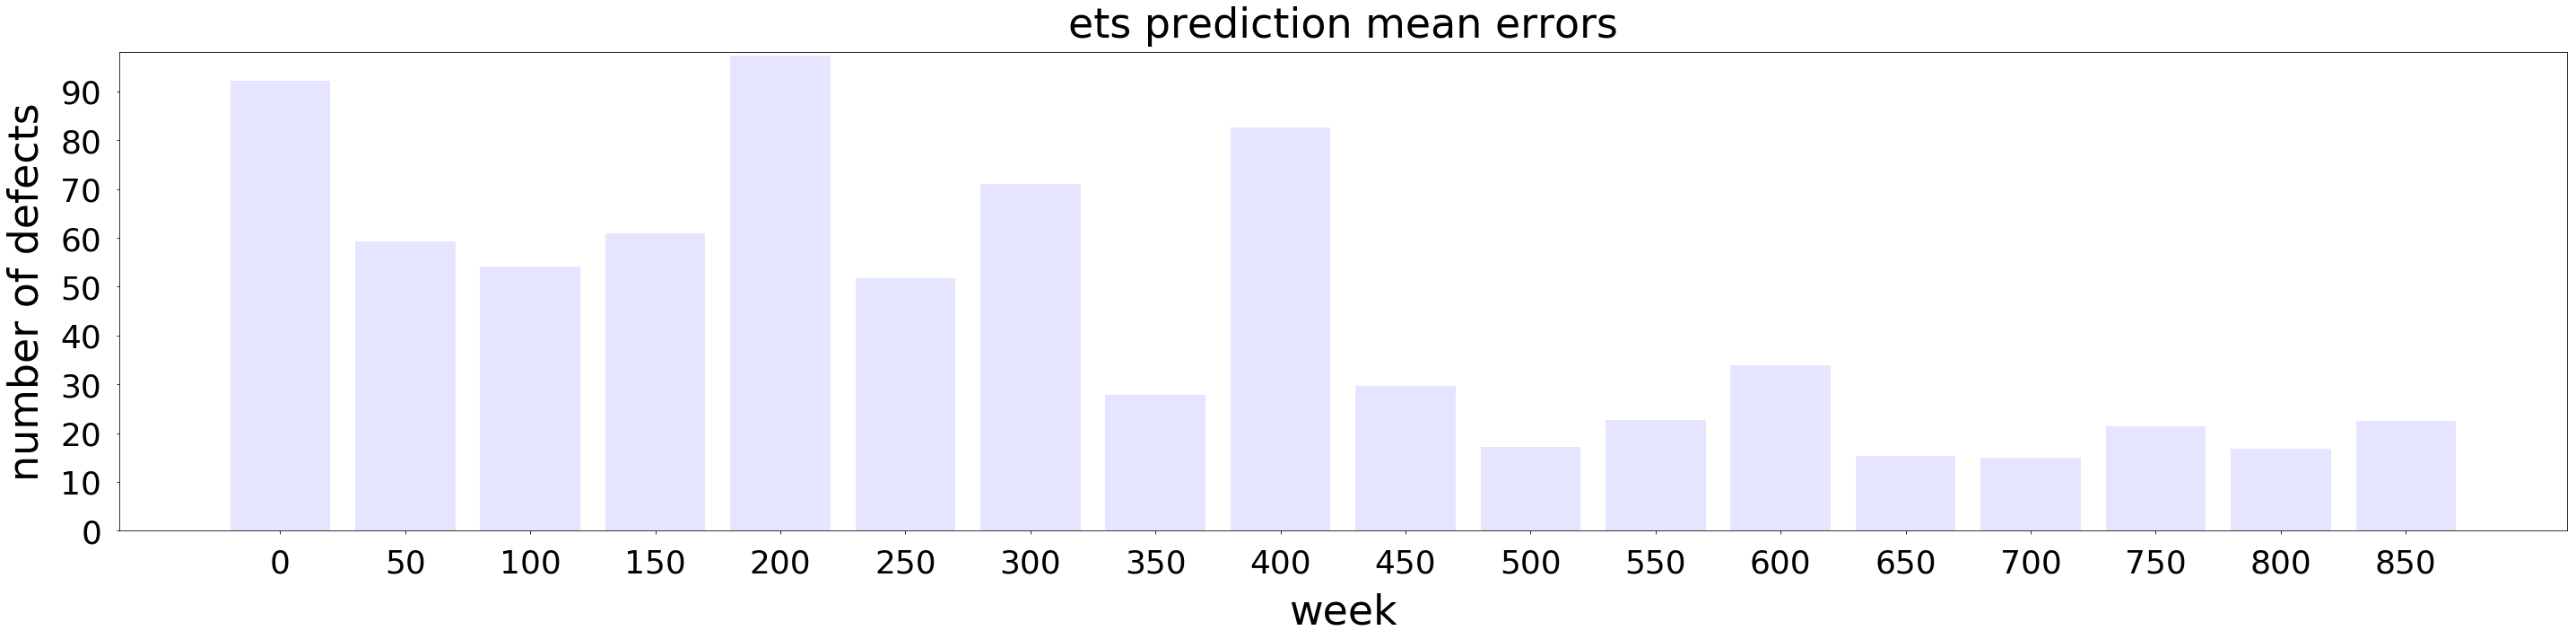

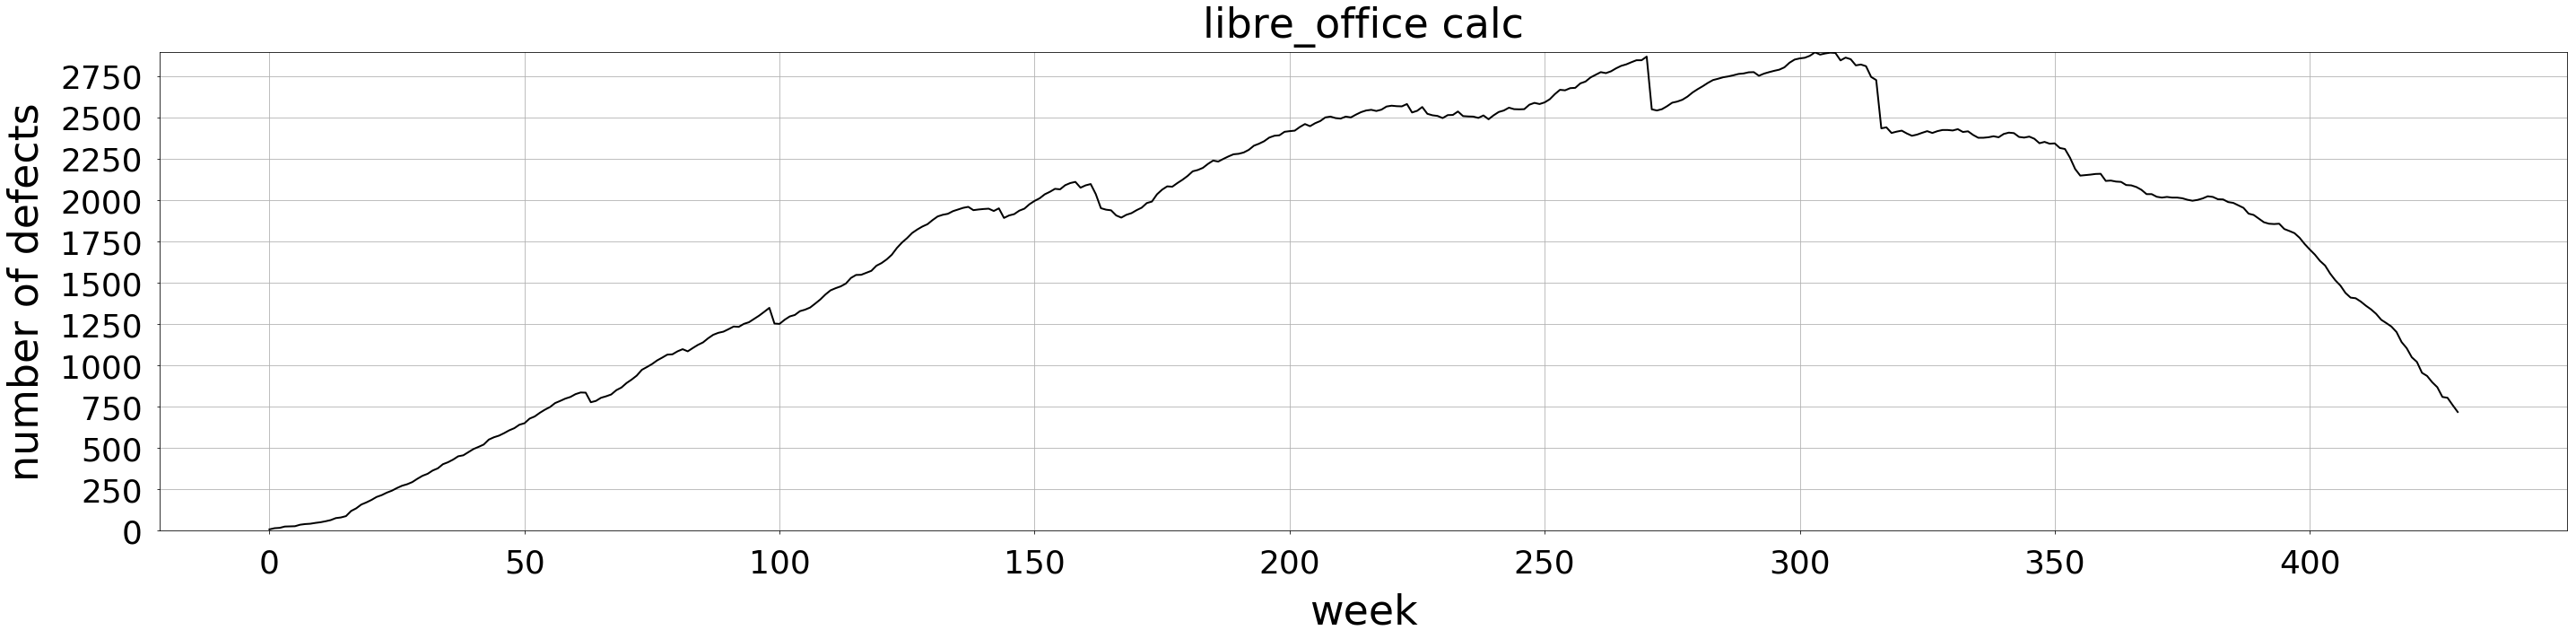

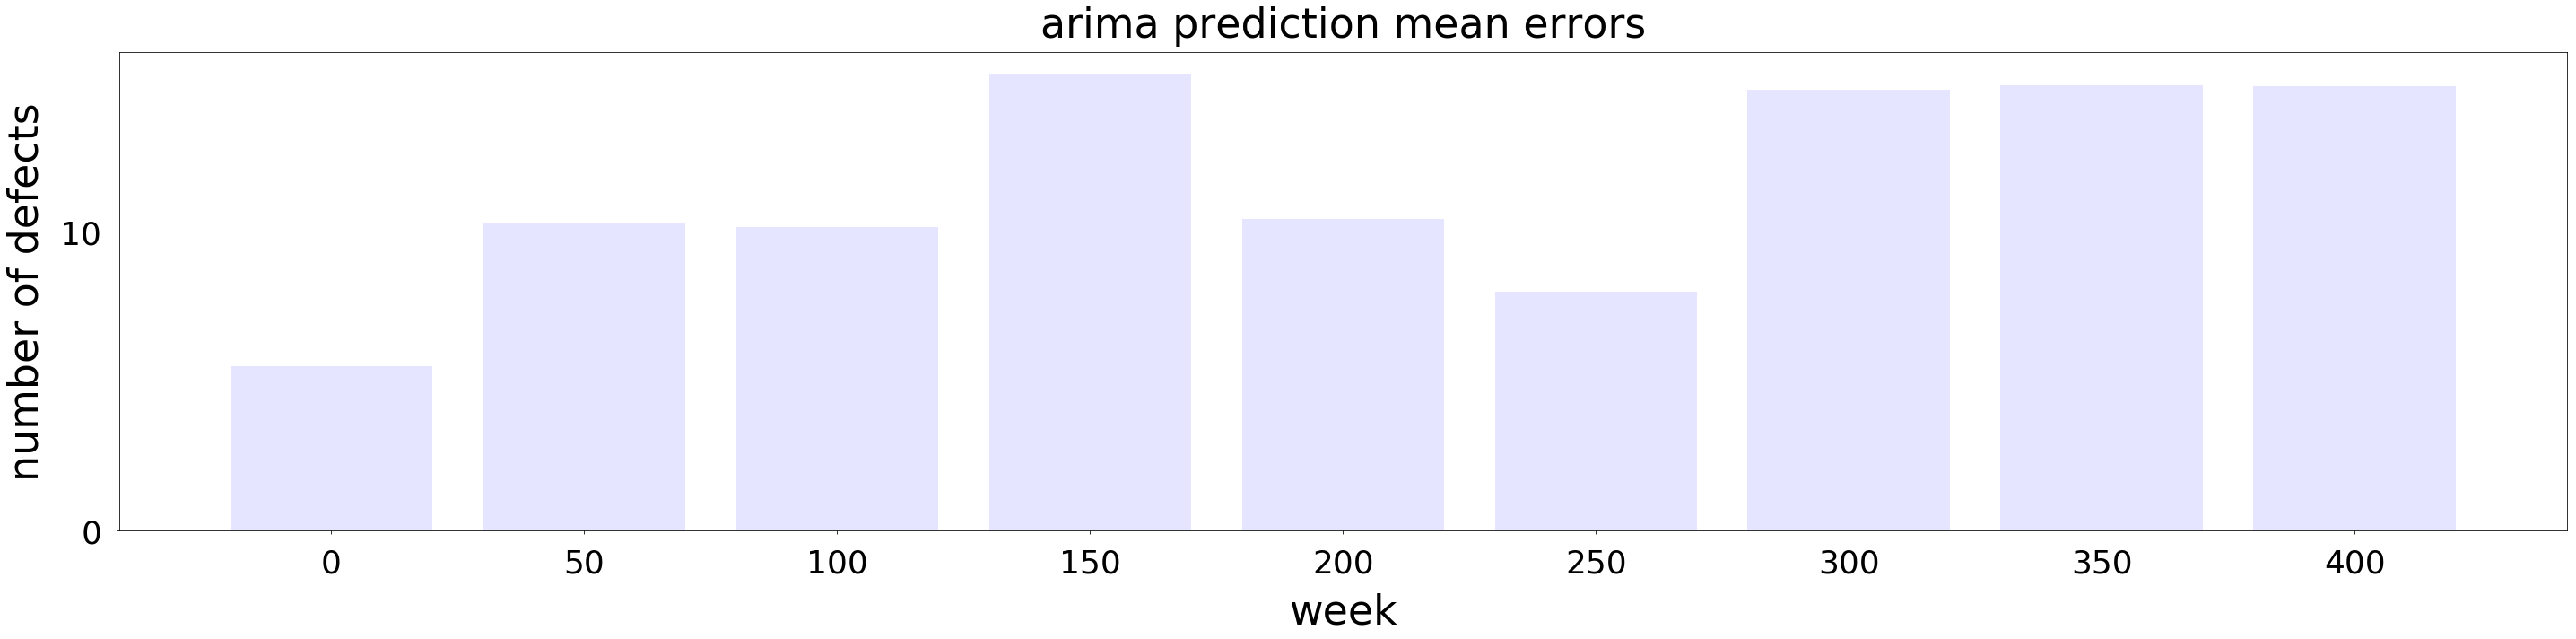

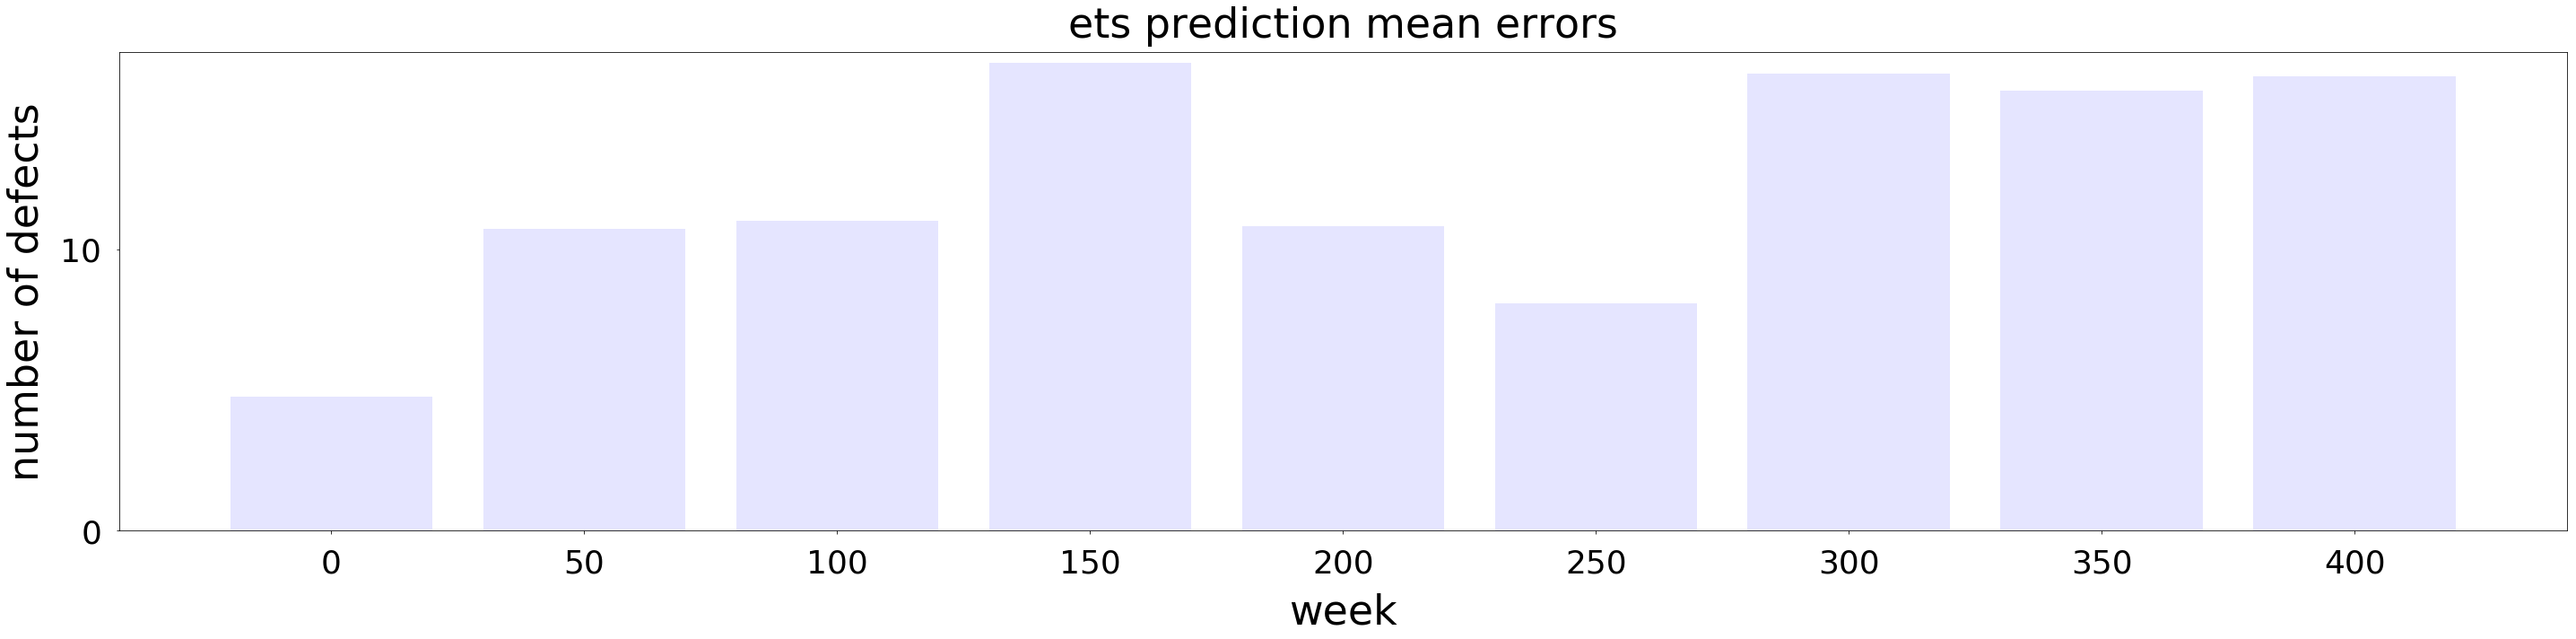

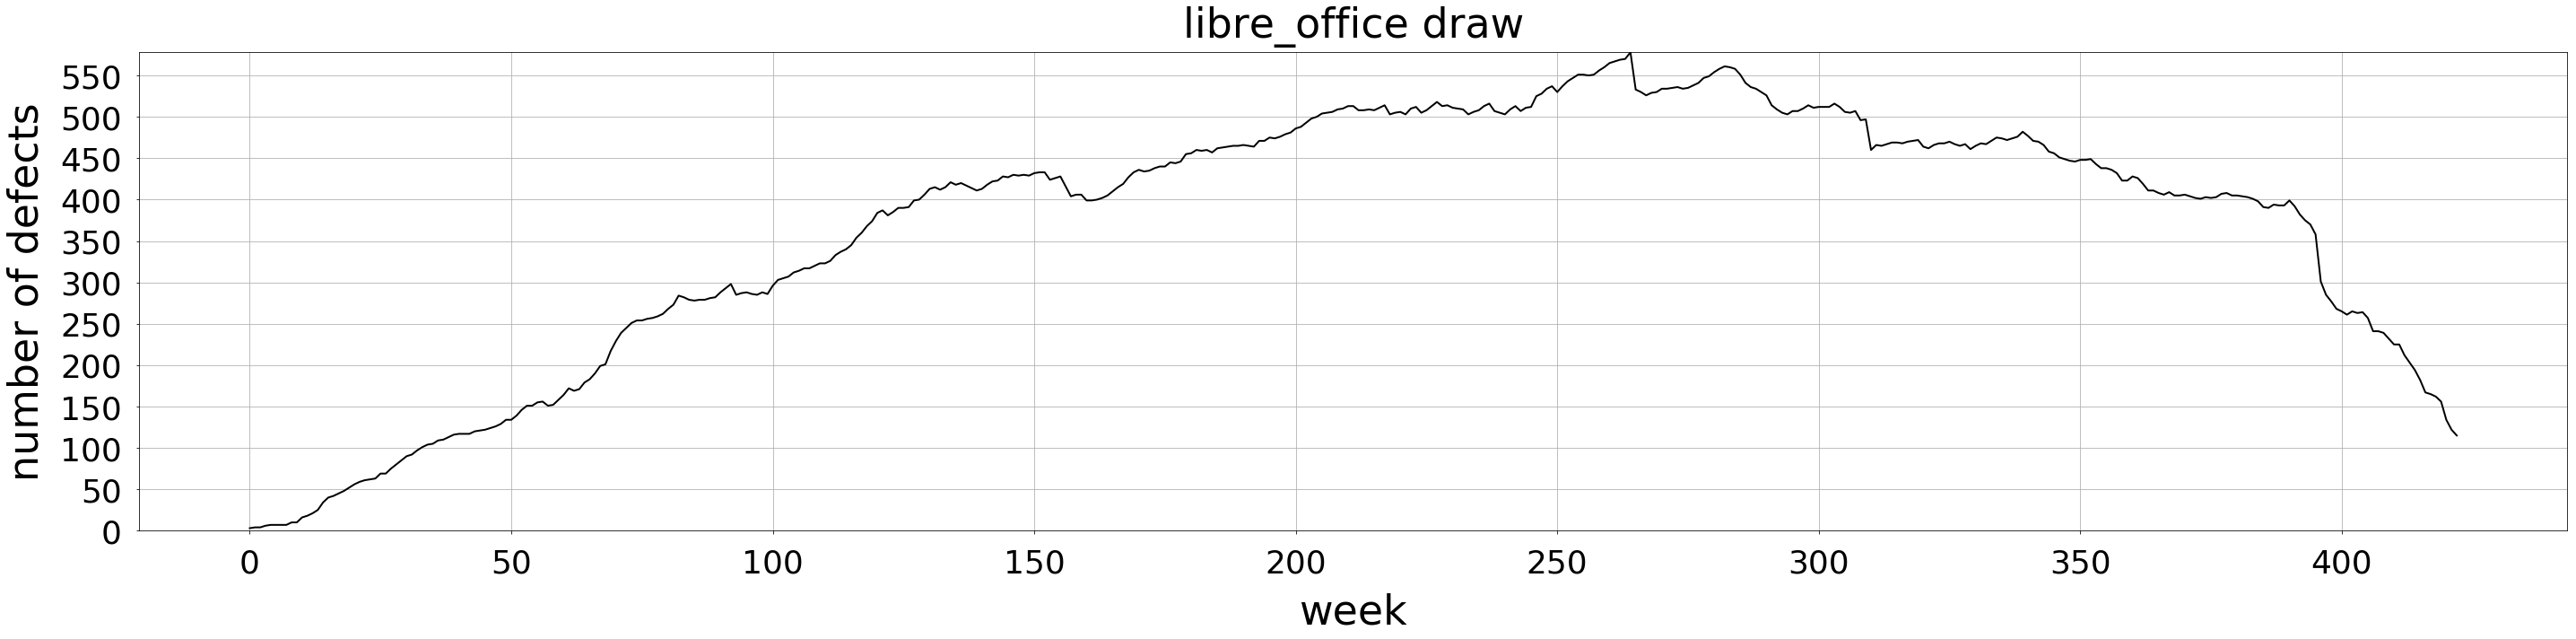

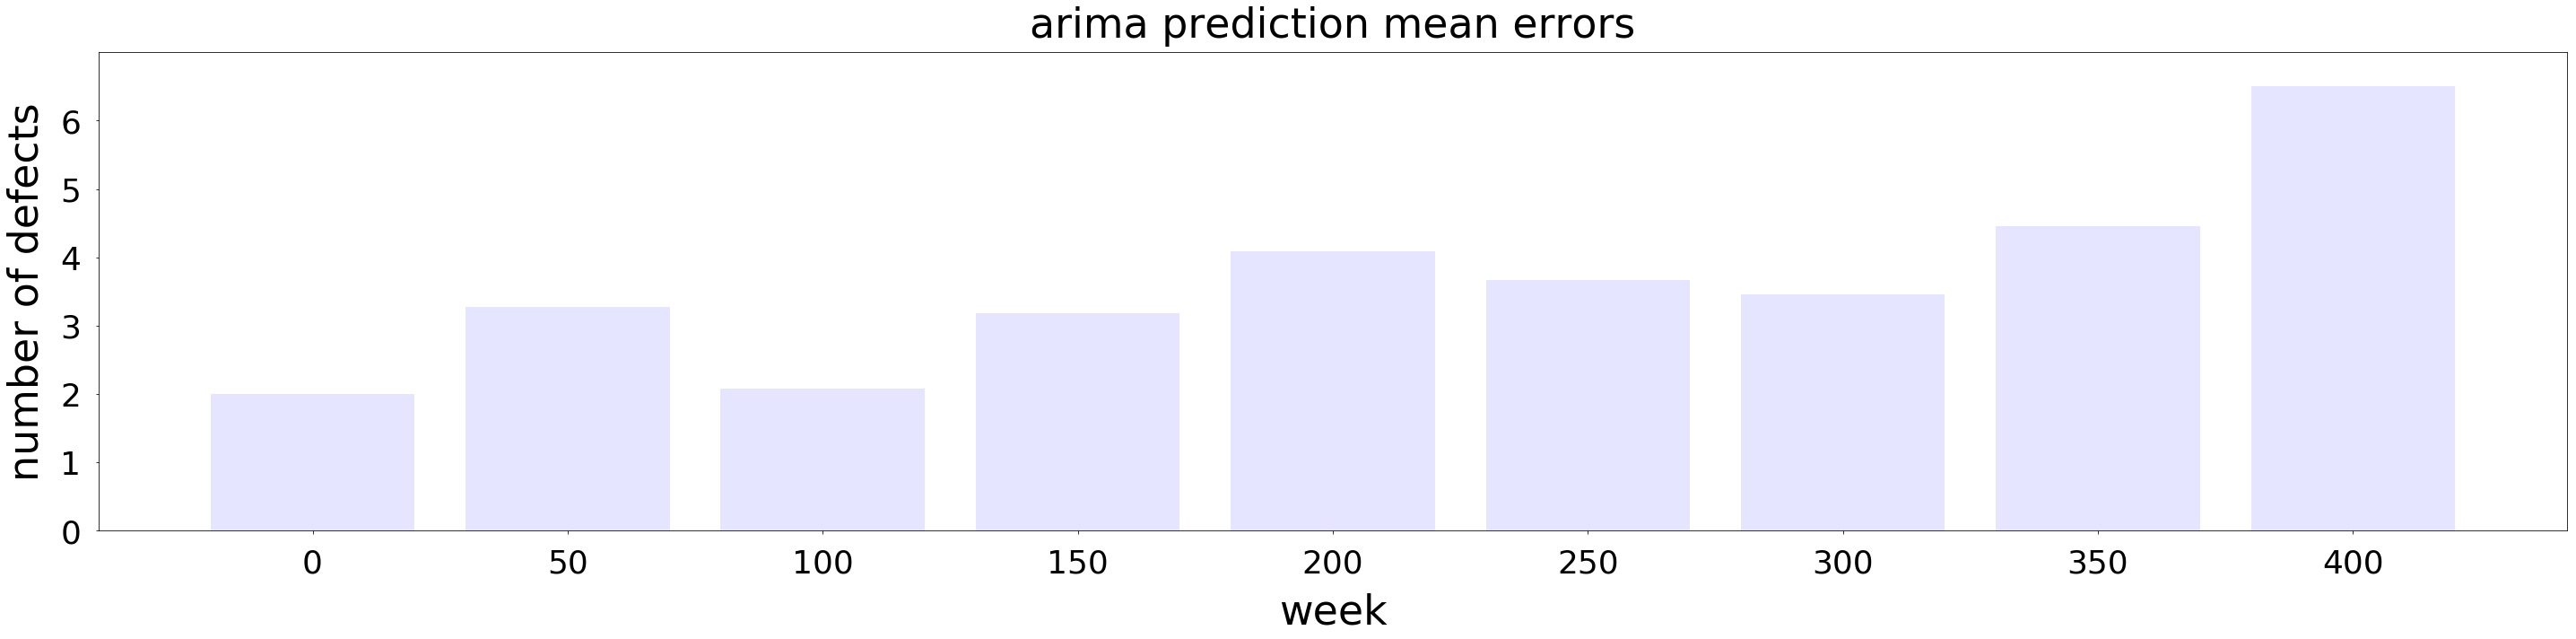

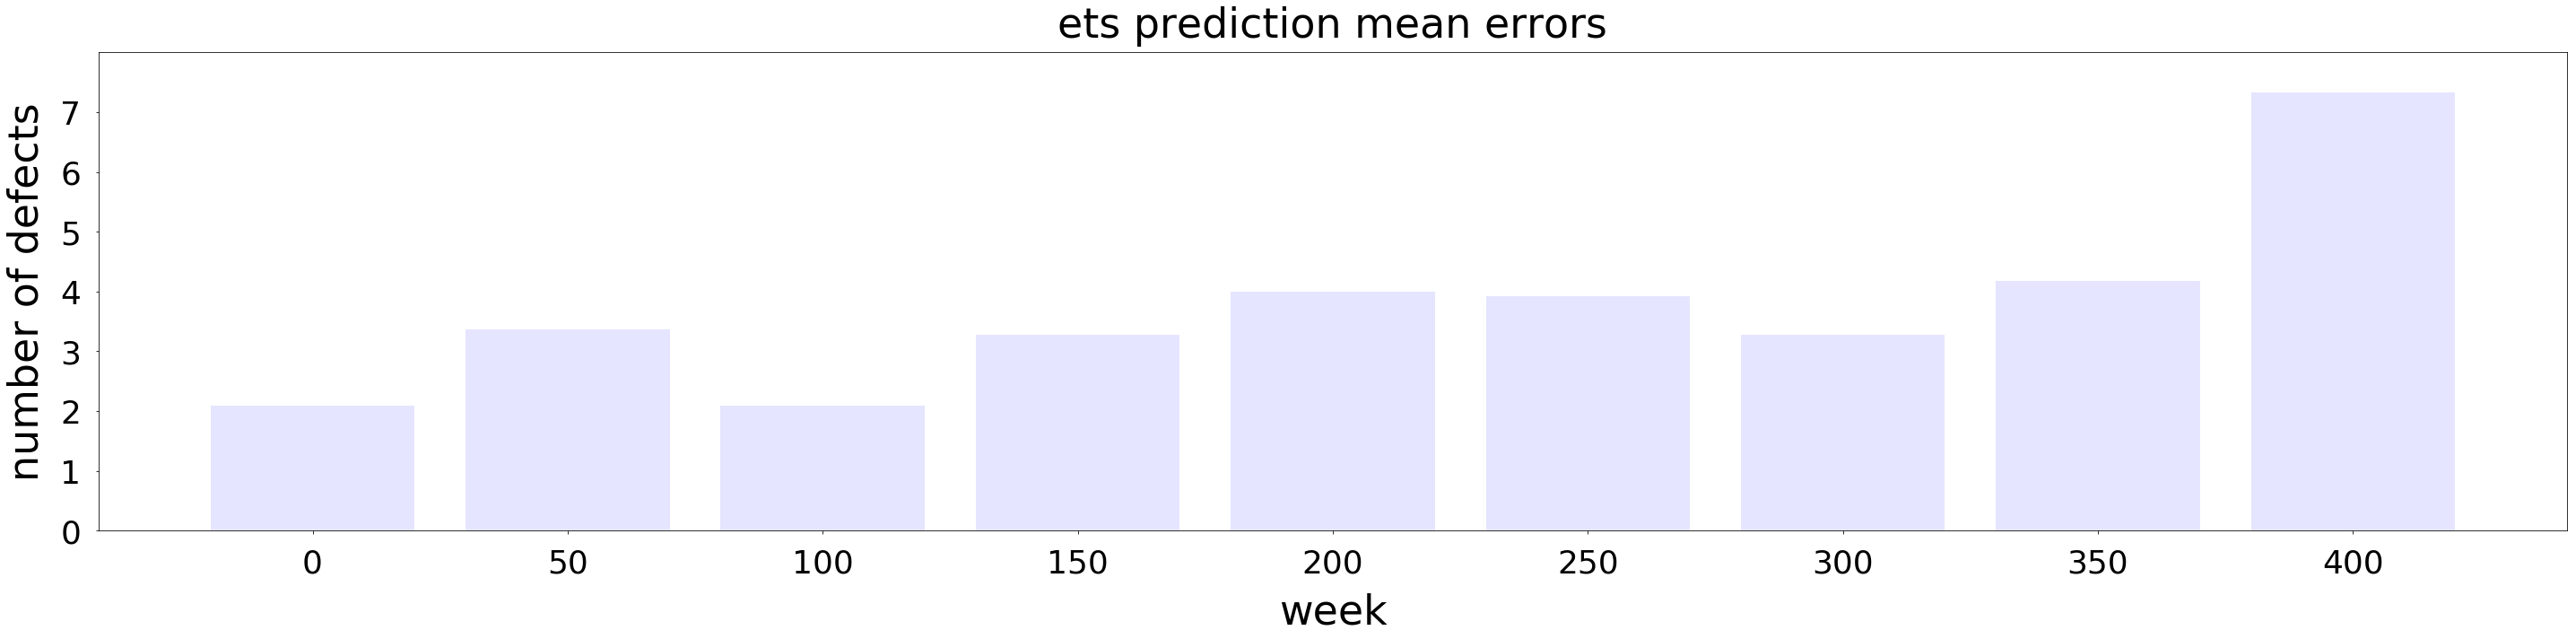

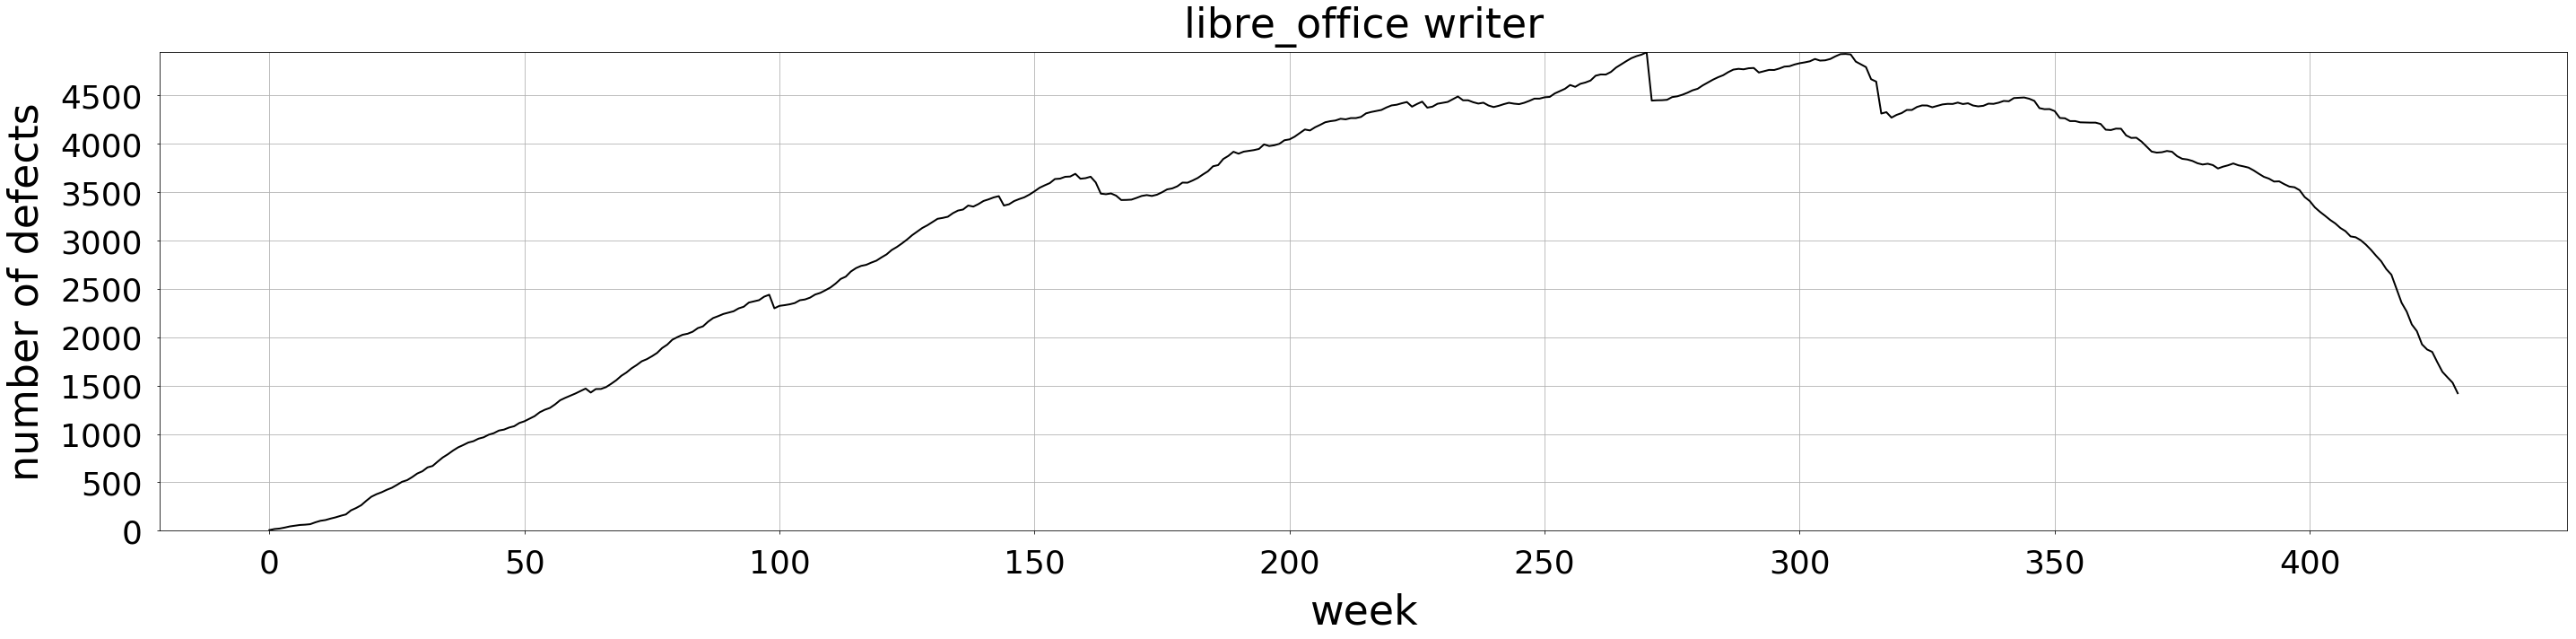

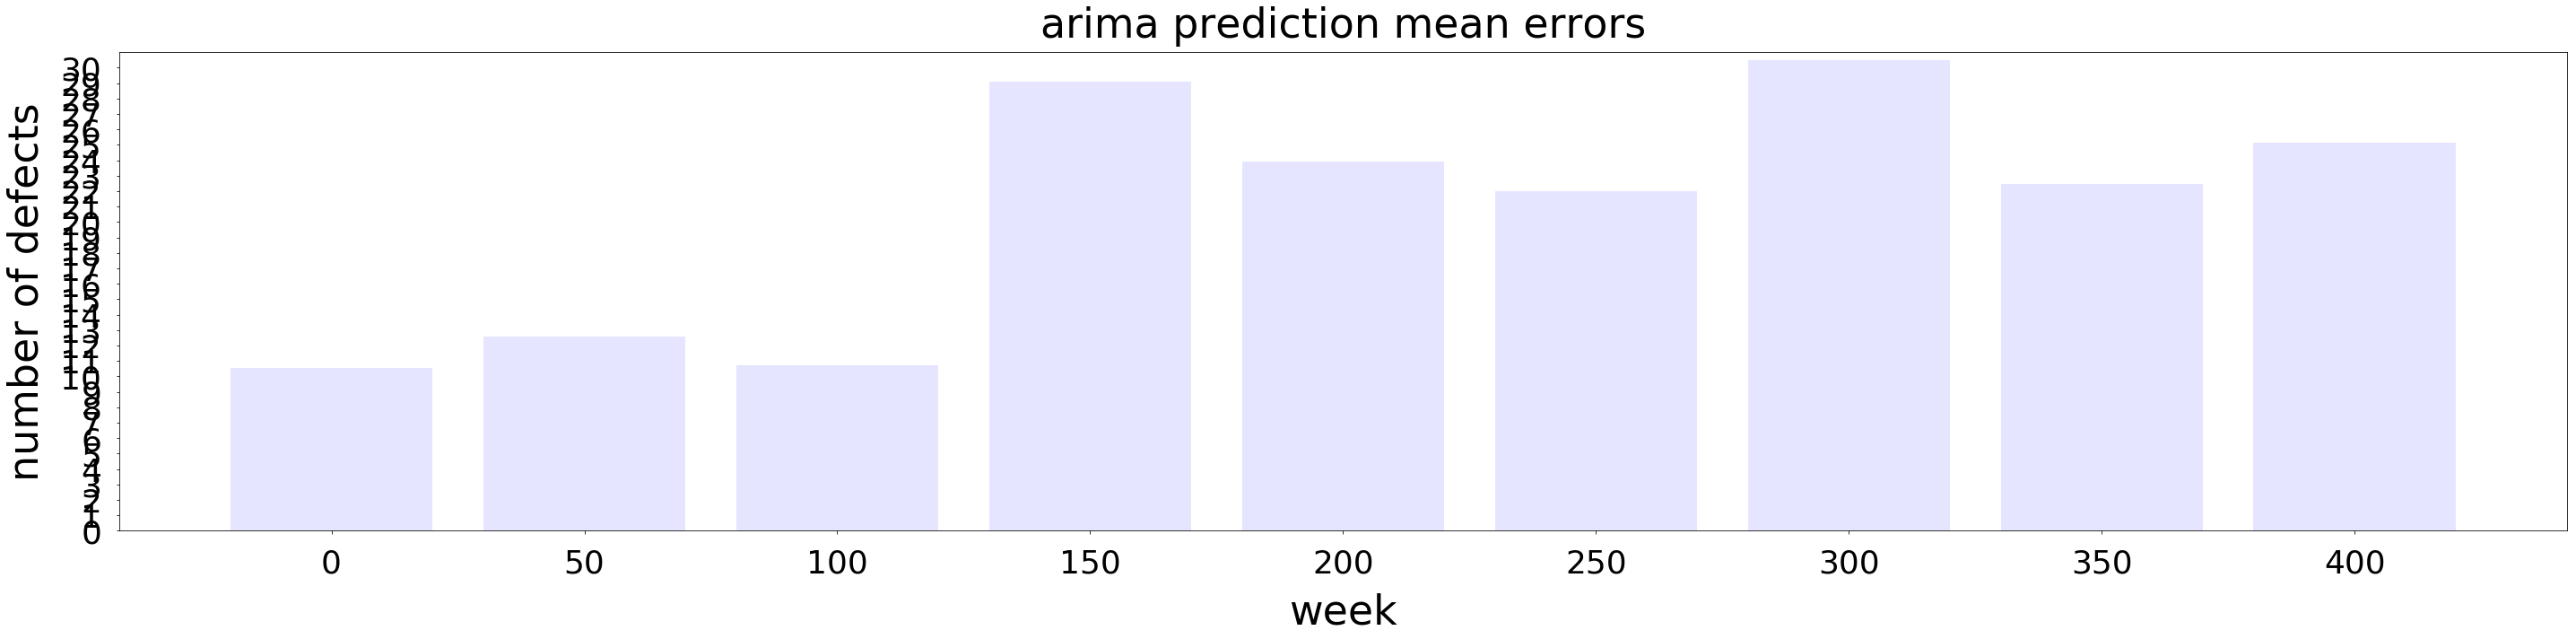

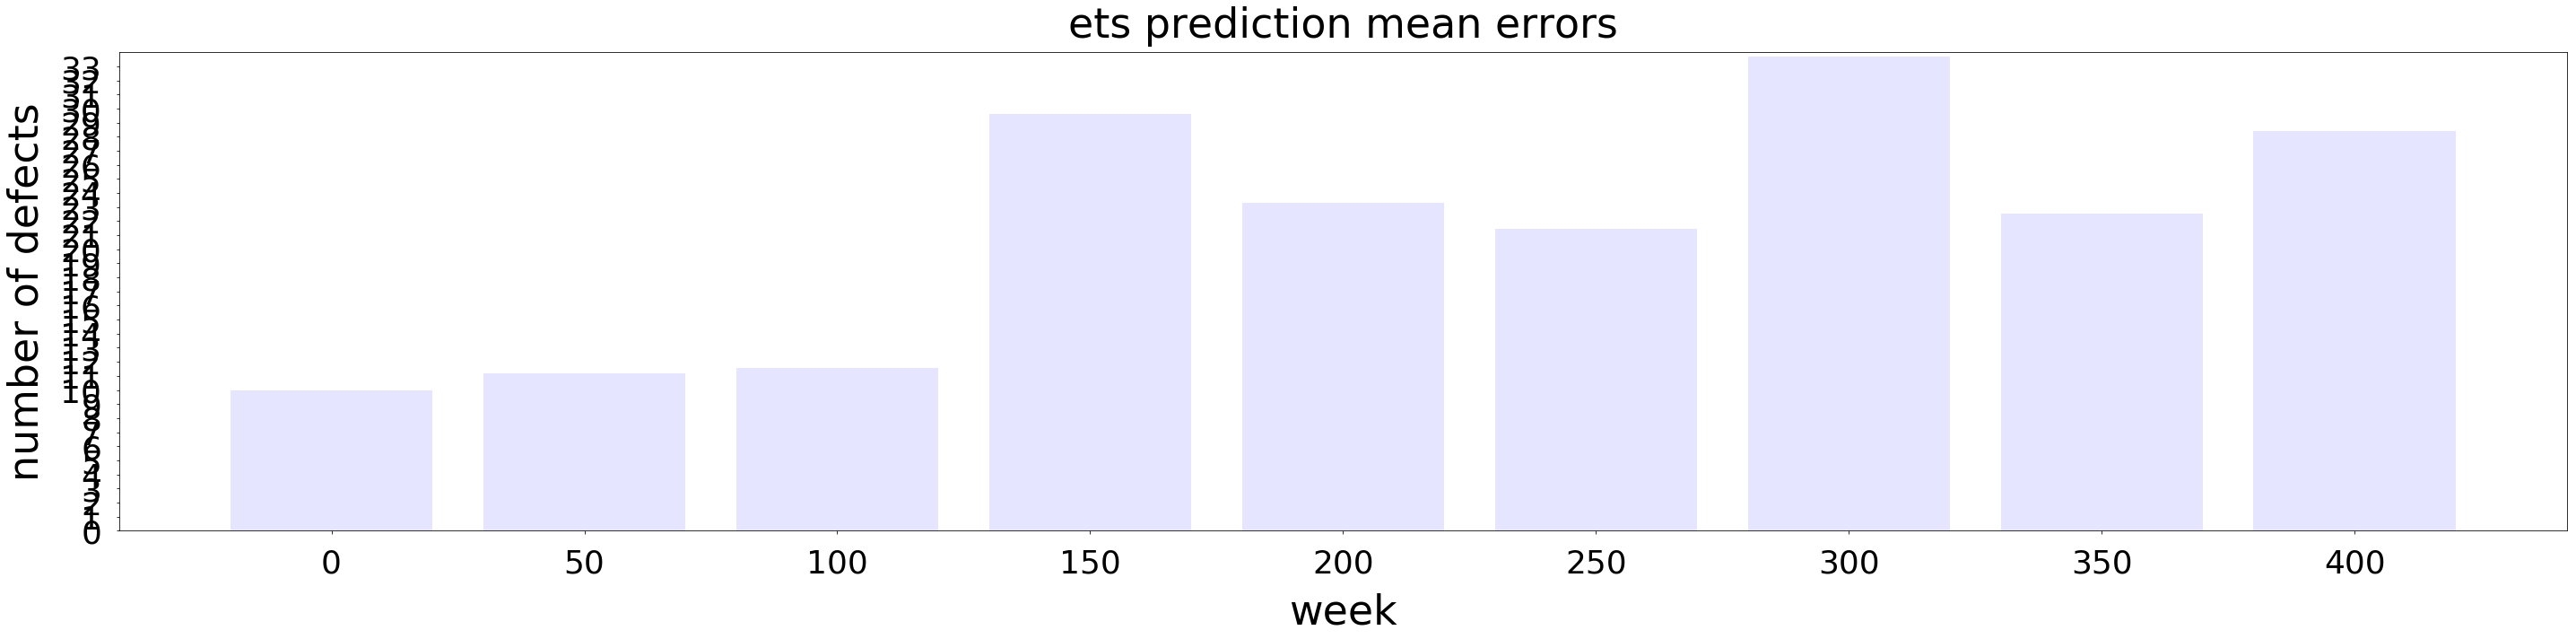

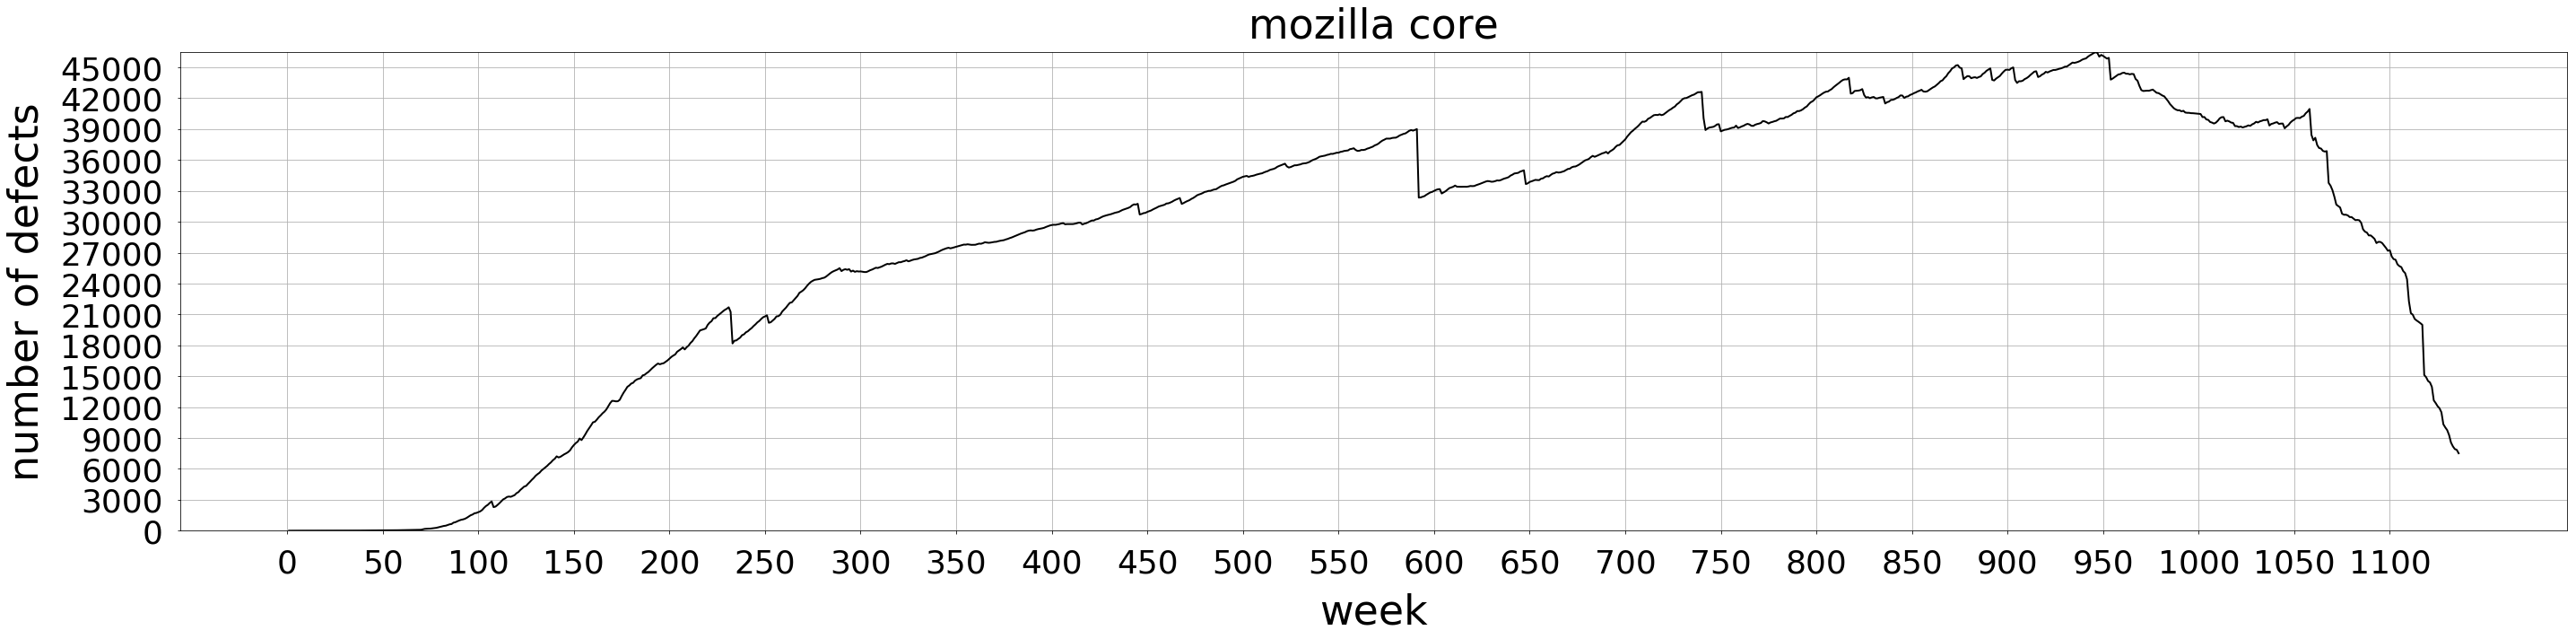

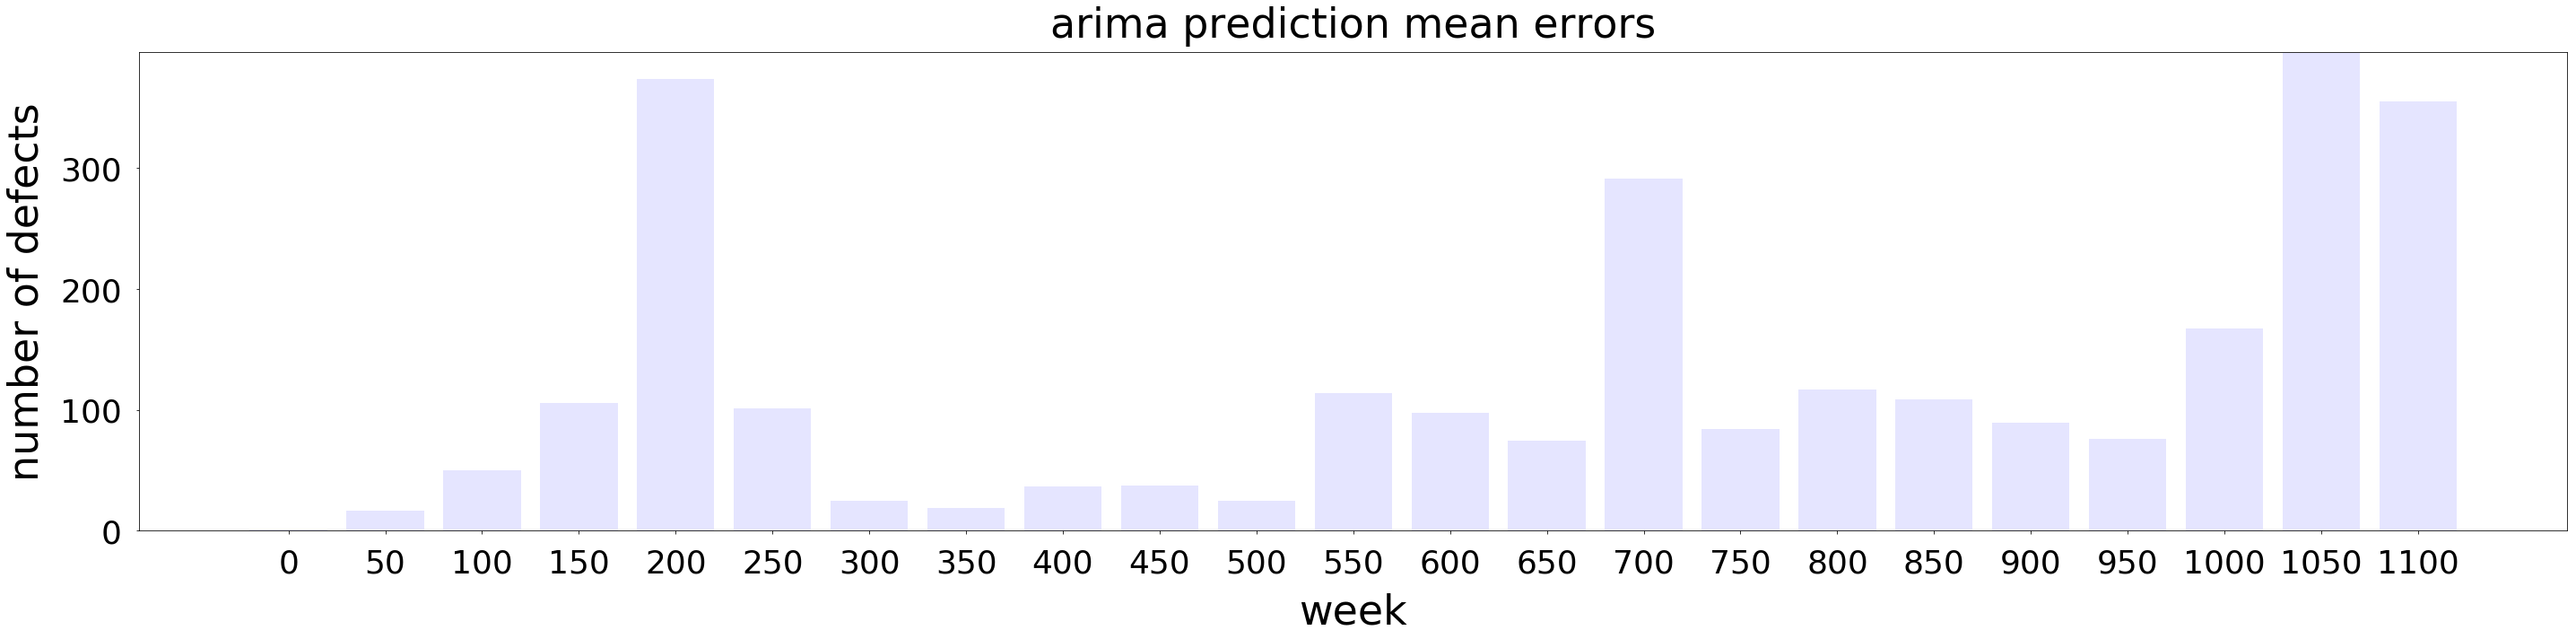

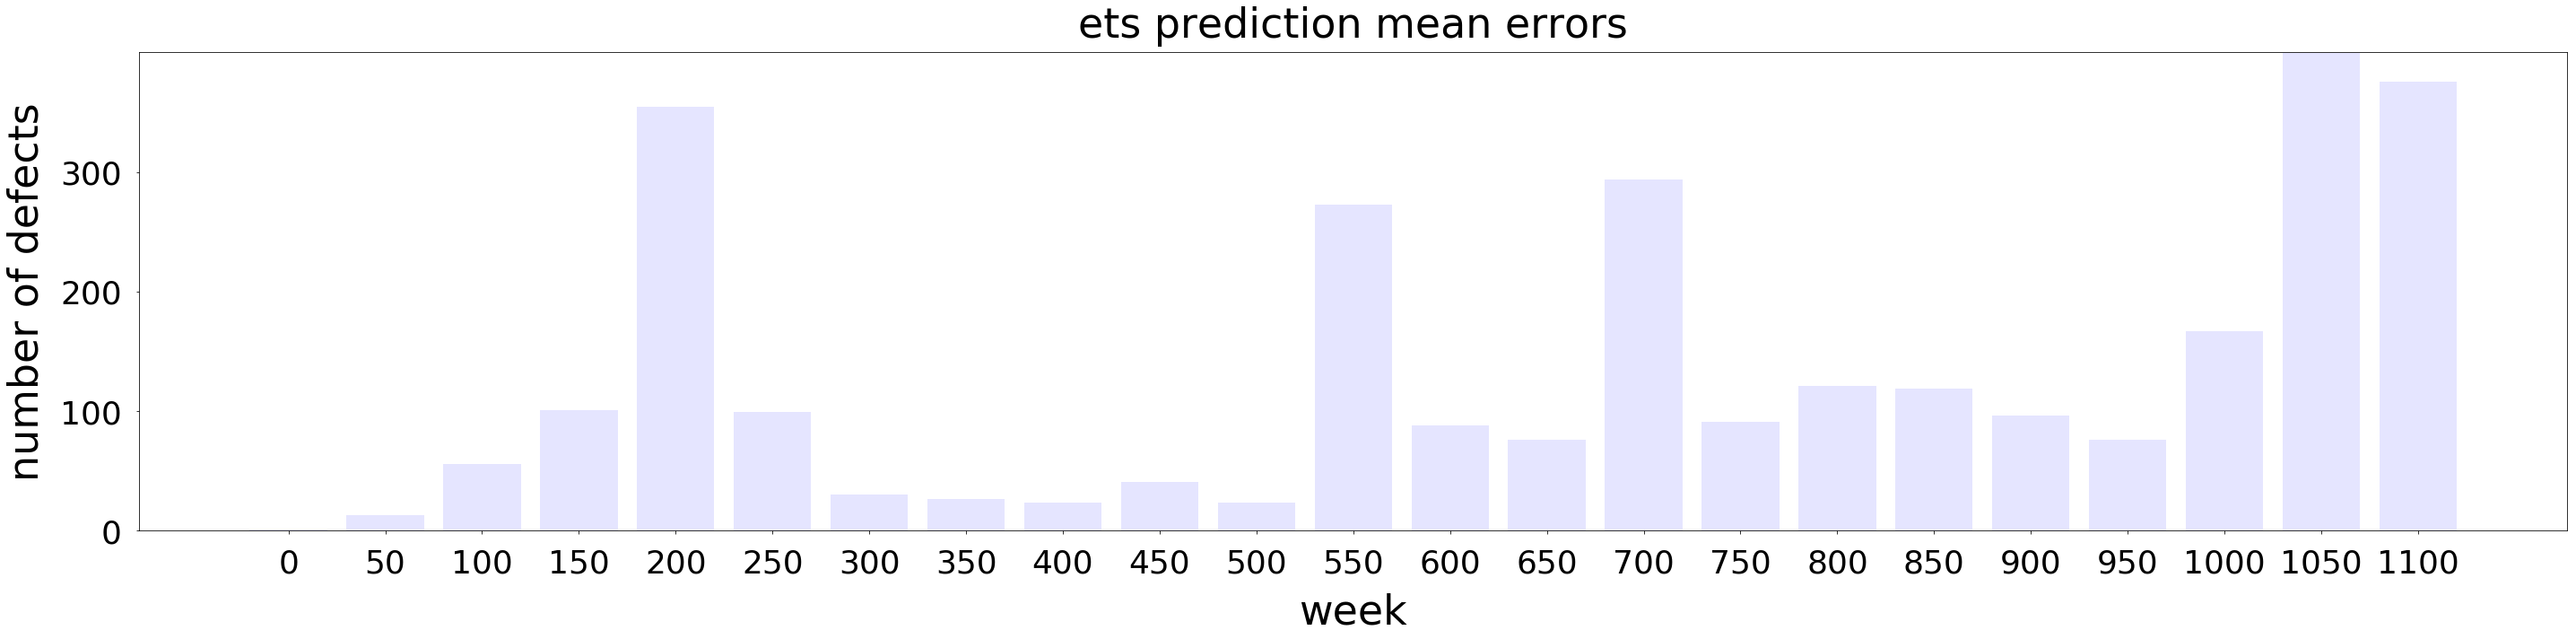

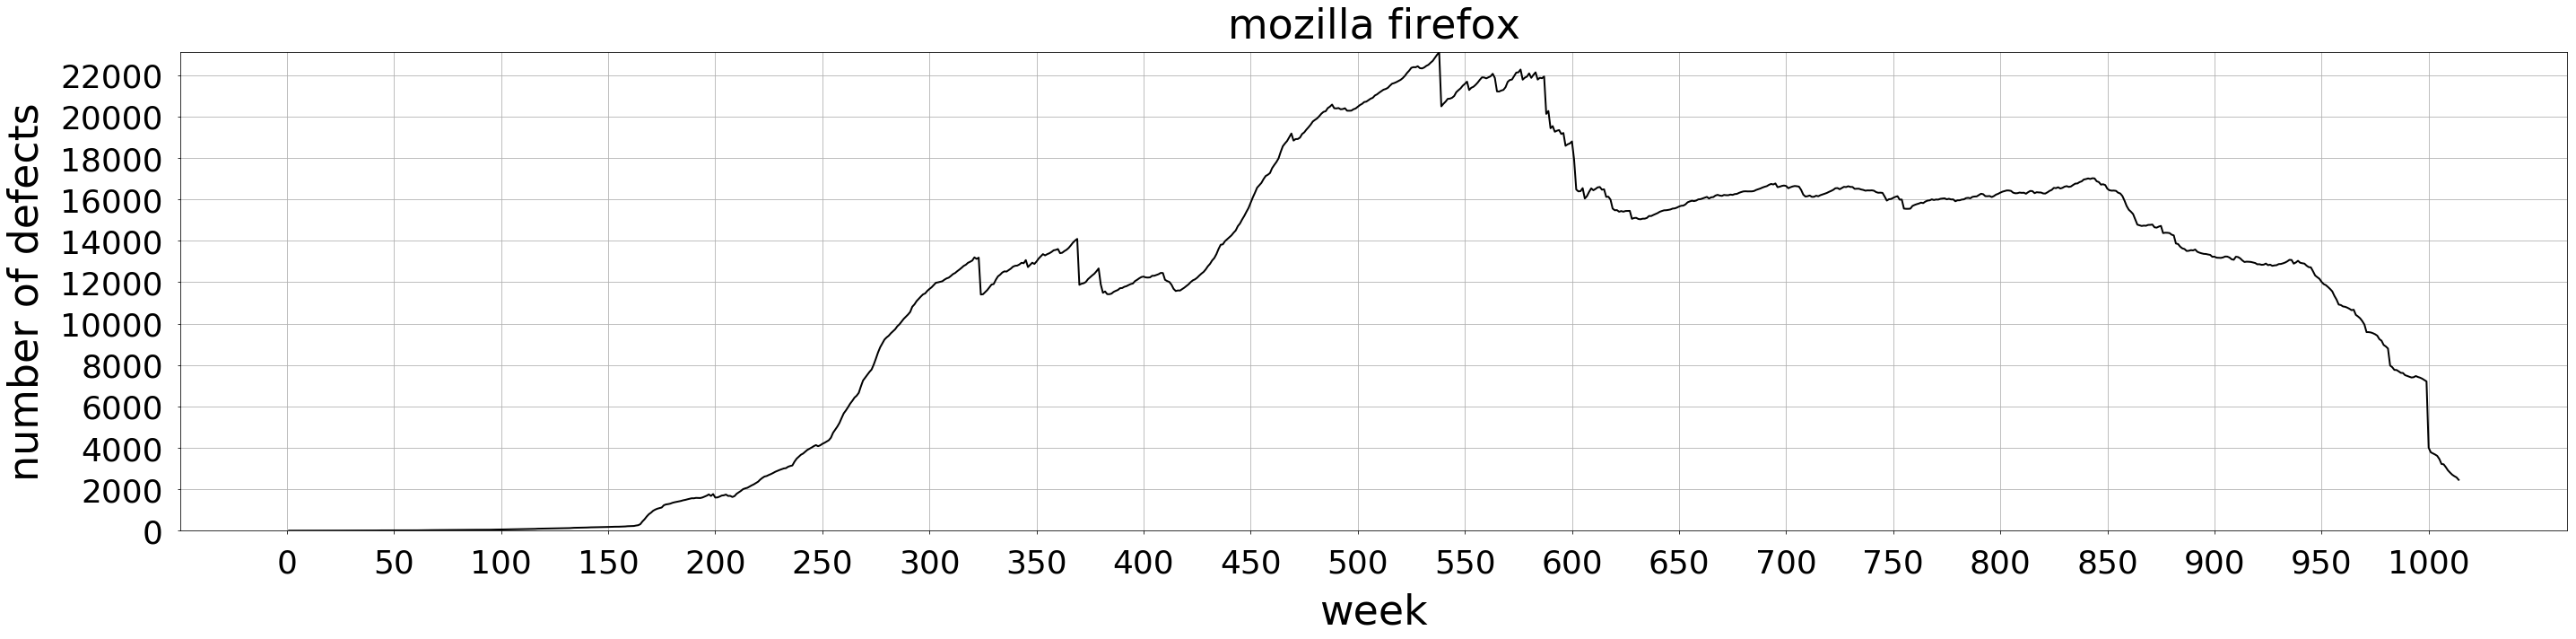

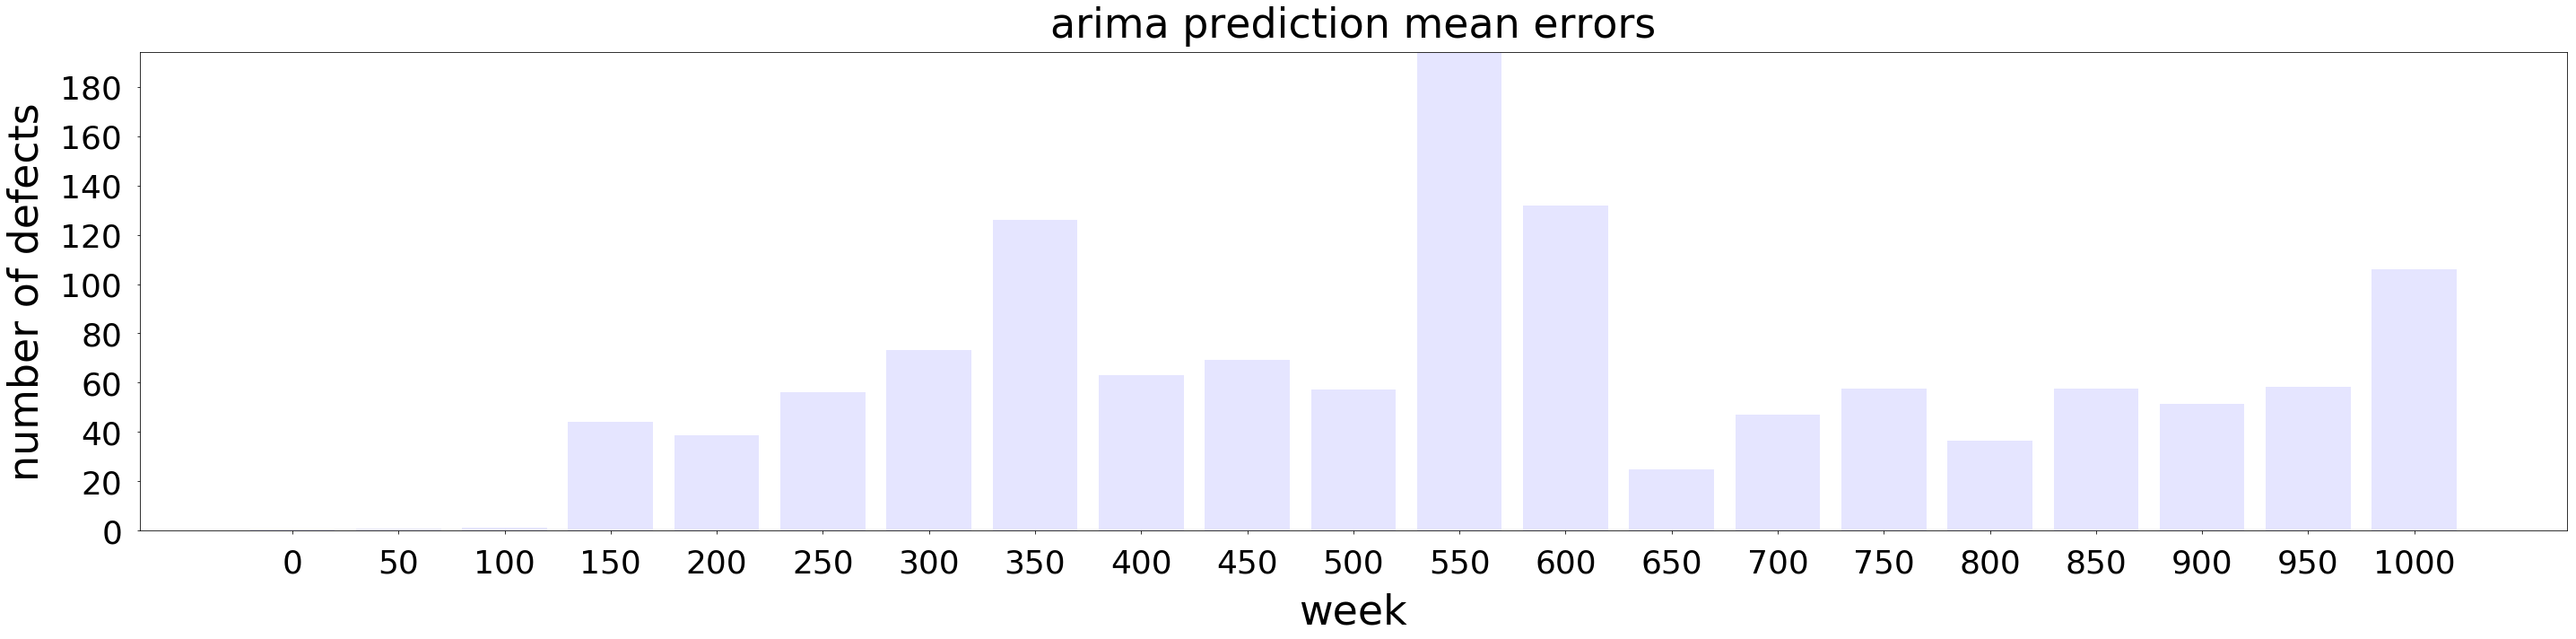

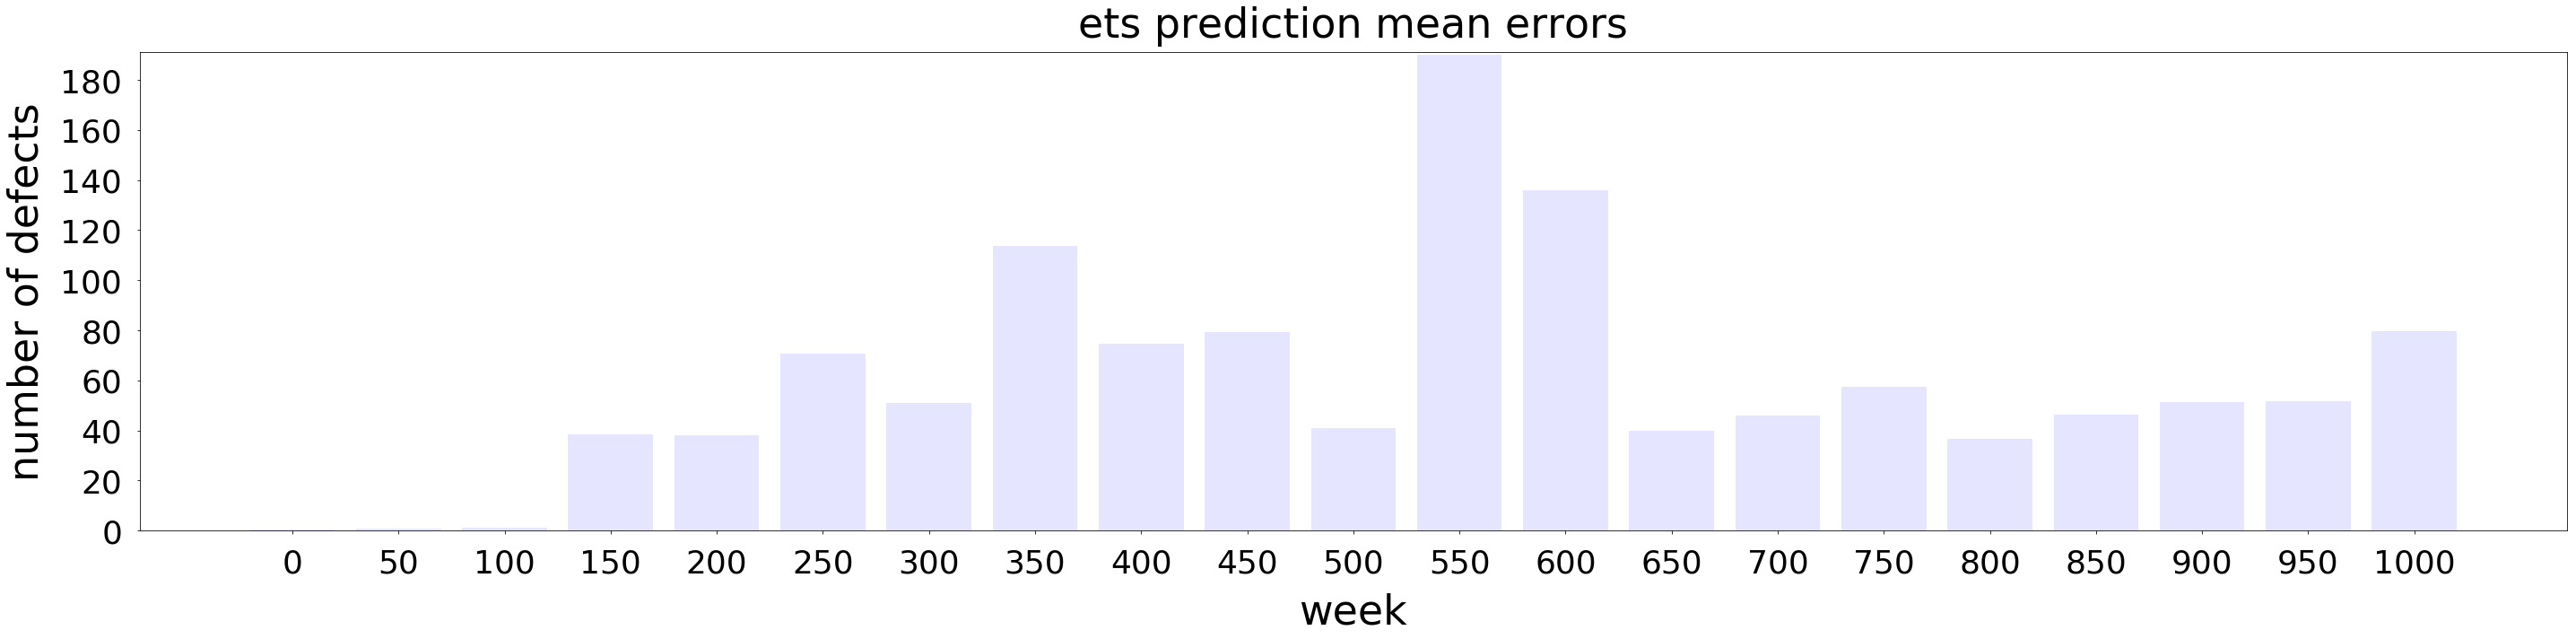

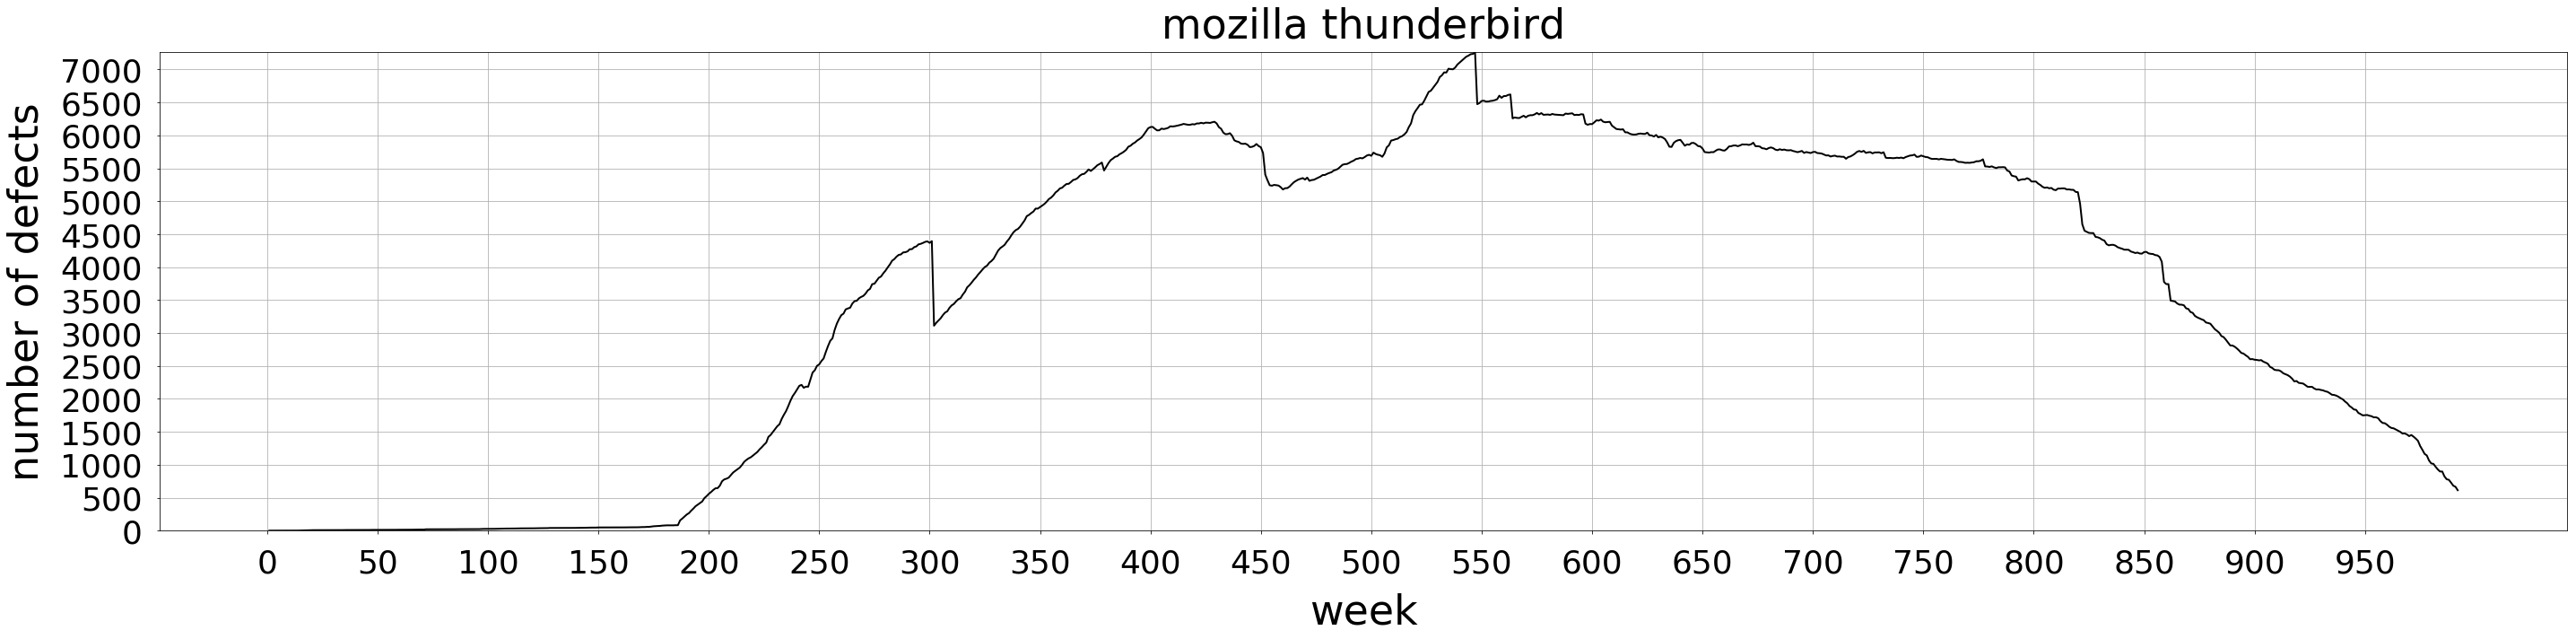

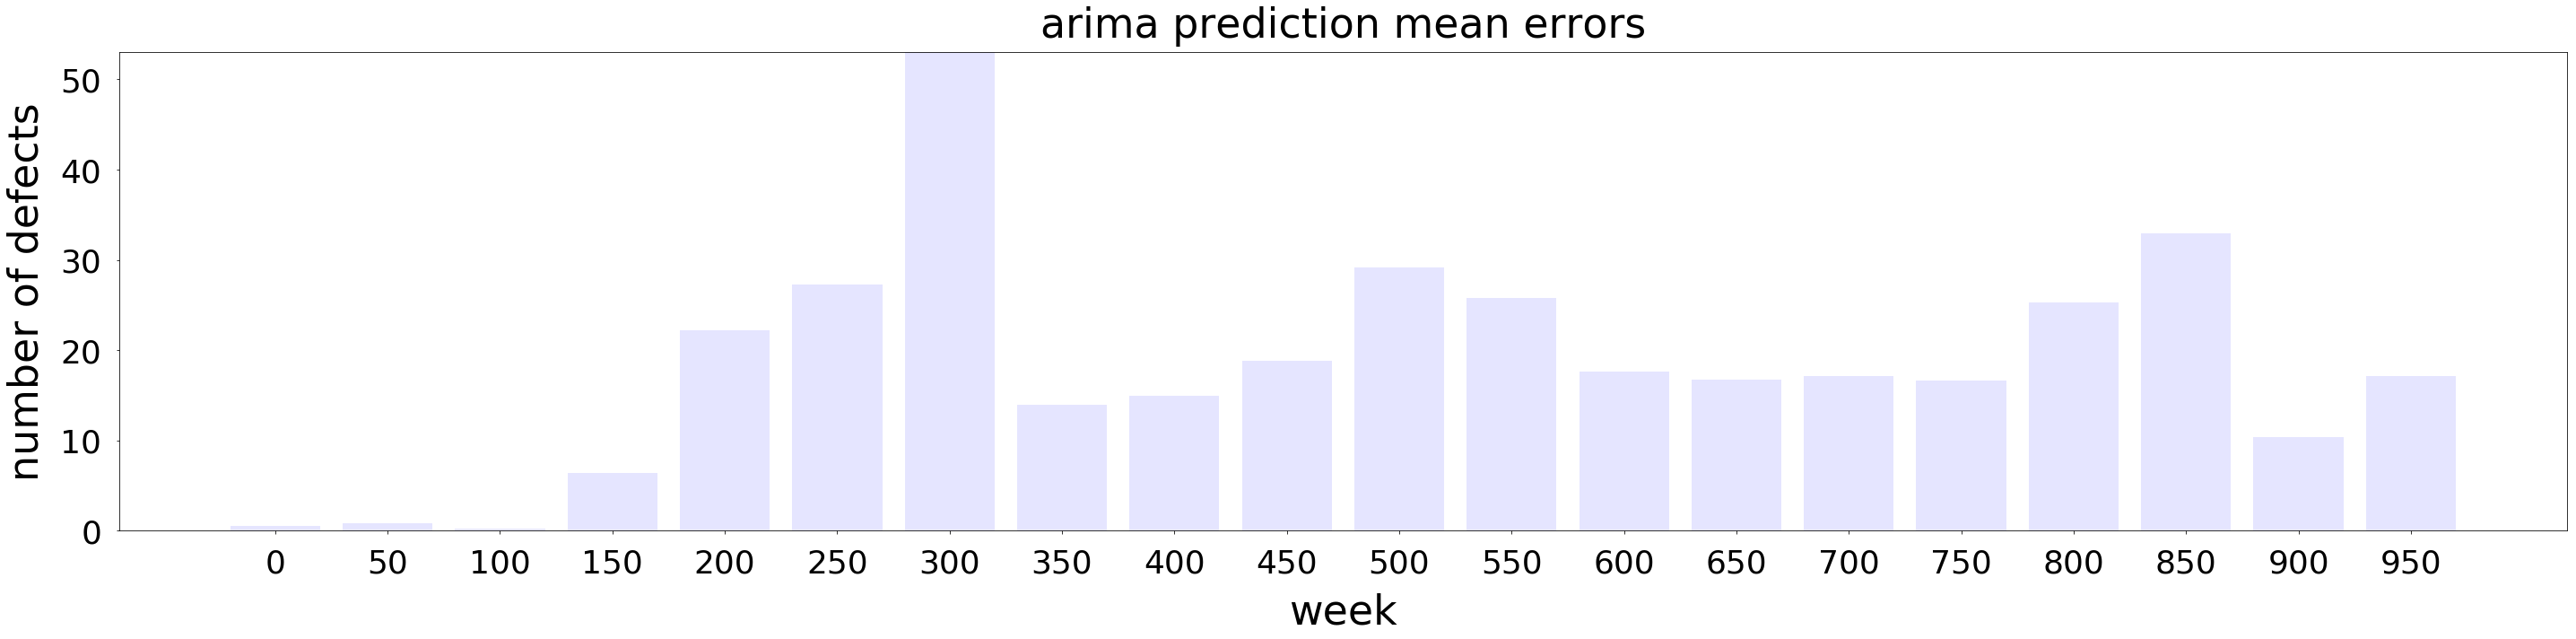

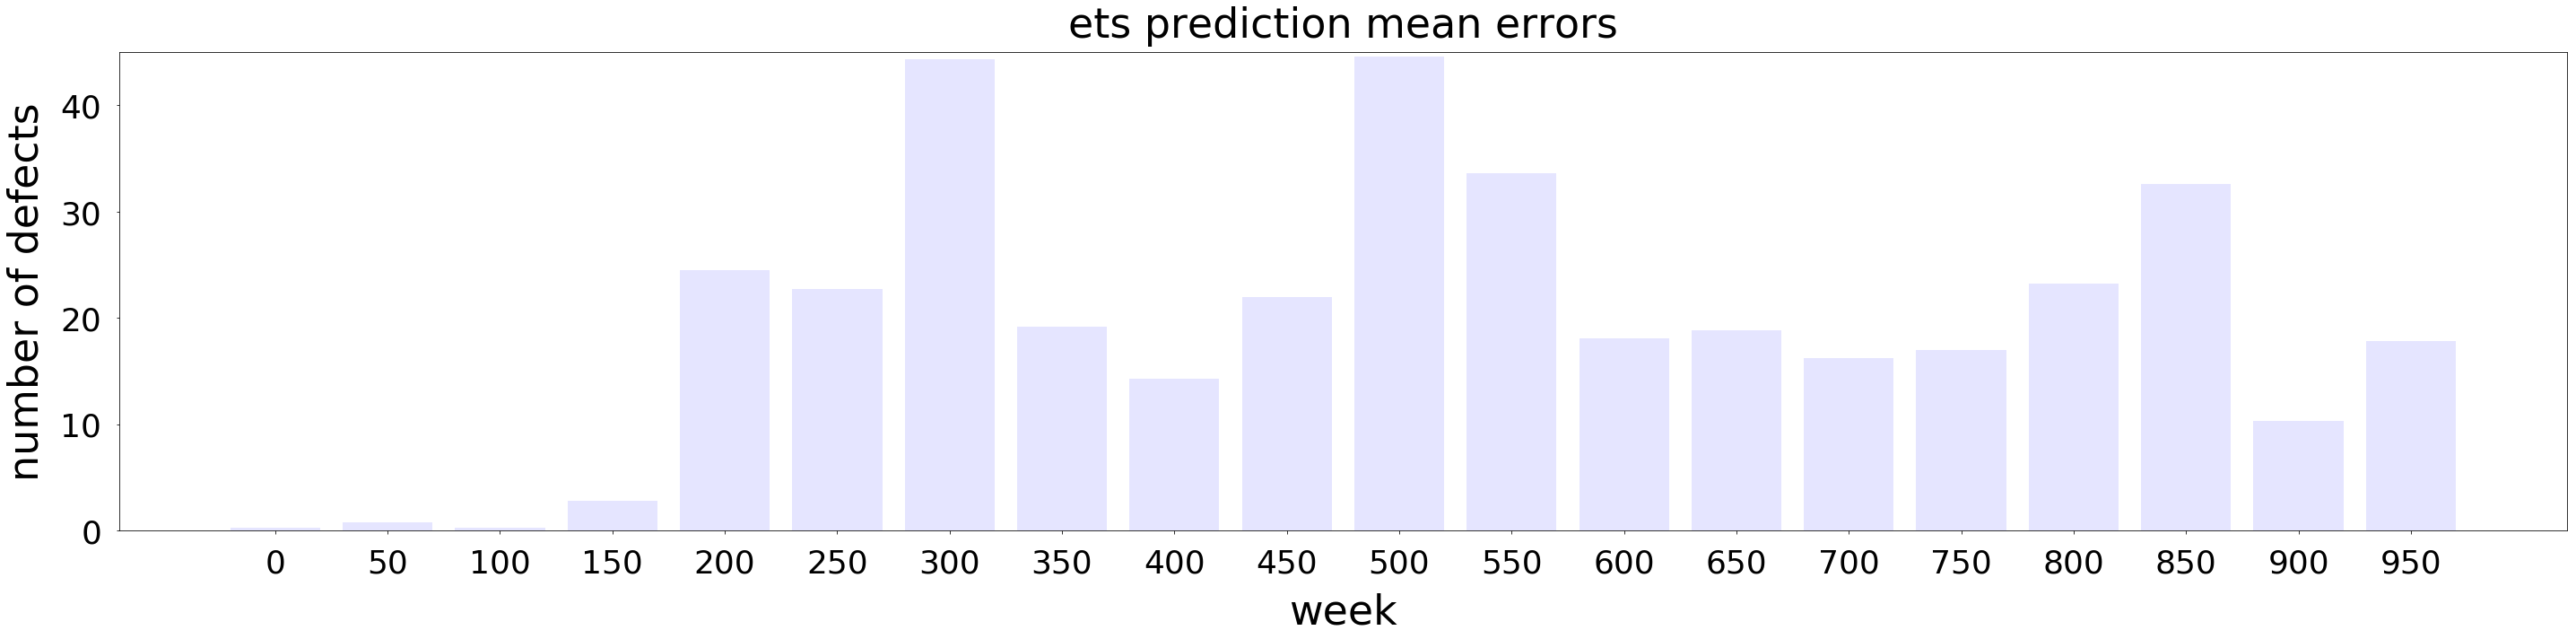

In [394]:
plot_defect_backlog(open_office_writer, y_intervals=1000)
plot_prediction_errors(open_office_writer, y_intervals=100)

plot_defect_backlog(kernel_file_system,  y_intervals=50)
plot_prediction_errors(kernel_file_system,  y_intervals=1)

plot_defect_backlog(eclipse_data_tools, y_intervals=100)
plot_prediction_errors(eclipse_data_tools, y_intervals=10)

plot_defect_backlog(eclipse_birt, y_intervals=500)
plot_prediction_errors(eclipse_birt, y_intervals=10)

plot_defect_backlog(apache_ant,  y_intervals=500)
plot_prediction_errors(apache_ant,  y_intervals=100)

plot_defect_backlog(apache_apache2, y_intervals=250)
plot_prediction_errors(apache_apache2, y_intervals=10)

plot_defect_backlog(eclipse_pde,  y_intervals=100)
plot_prediction_errors(eclipse_pde,  y_intervals=1)

plot_defect_backlog(eclipse_platform, y_intervals=1000)
plot_prediction_errors(eclipse_platform, y_intervals=10)

plot_defect_backlog(libre_office_calc, y_intervals=250)
plot_prediction_errors(libre_office_calc, y_intervals=10)

plot_defect_backlog(libre_office_draw, y_intervals=50)
plot_prediction_errors(libre_office_draw, y_intervals=1)

plot_defect_backlog(libre_office_writer,  y_intervals=500)
plot_prediction_errors(libre_office_writer,  y_intervals=10)


plot_defect_backlog(mozilla_core, y_intervals=3000)
plot_prediction_errors(mozilla_core, y_intervals=100)

plot_defect_backlog(mozilla_firefox,  y_intervals=2000)
plot_prediction_errors(mozilla_firefox,  y_intervals=20)

plot_defect_backlog(mozilla_thunderbird,  y_intervals=500)
plot_prediction_errors(mozilla_thunderbird,  y_intervals=10)


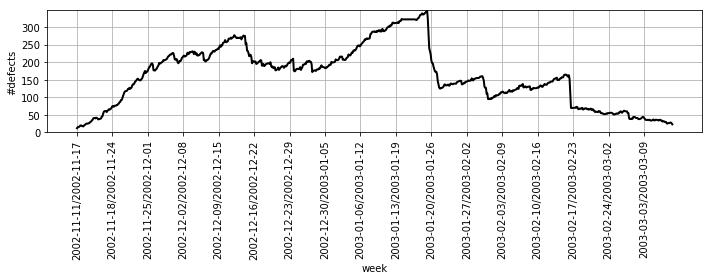

In [29]:
fig = plot_project_sequence(backlog.backlog_all, figsize=(10, 4), 
                           ytick_interval=50, axis_x_dates=True)
plt.tight_layout()
#plt.savefig('./test.pdf')
plt.show()
plt.close()